## Ant Colony Optimization (ACO) for Traveling Salesman Problem (TSP)

## Imports Description

The notebook imports the following libraries and modules:

- **csv:** Provides functionality to read and write CSV files.
- **matplotlib.pyplot:** Library for creating visualizations and plots in Python.
- **numpy:** Numerical computing library used for mathematical operations.
- **seaborn:** Data visualization library based on Matplotlib, providing high-level interface for drawing attractive statistical graphics.
- **itertools.permutations:** Generates permutations of iterable objects, useful for generating combinations of elements.
- **random:** Provides functions for generating random numbers and selecting random elements.
- **copy.deepcopy:** Utility function for creating deep copies of objects, useful for copying nested data structures.
- **cv2:** OpenCV library for computer vision tasks, including image processing and manipulation.
- **os:** Module for interacting with the operating system, used for file operations such as directory traversal and file path manipulation.
- **math:** Standard Python module providing mathematical functions and constants.

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from itertools import permutations,islice
import random
from copy import deepcopy
import cv2
import os
import math
import copy

## Classes Description

### City Class
- **Attributes:**
  - `name`: Name of the city.
  - `latitude`: Latitude coordinate of the city.
  - `longitude`: Longitude coordinate of the city.
  
- **Methods:**
  - `__init__(self, name, latitude, longitude)`: Initializes a city object with the given name, latitude, and longitude.
  - `__str__(self)`: Returns a string representation of the city object containing its name, latitude, and longitude.

### Ant Class
- **Attributes:**
  - `visitedCities`: List of cities visited by the ant during its tour.
  - `cost`: Total cost of the ant's tour.
  - `fitness`: Fitness value of the ant (if applicable).
  
- **Methods:**
  - `__init__(self, cities)`: Initializes an ant object with the given list of cities.
  - `__str__(self)`: Returns a string representation of the ant object containing the names of cities visited during its tour.

In [5]:
class City:

    def __init__(self,name,latitude,longitude):
        self.name= name
        self.latitude = latitude
        self.longitude = longitude
    

    def __str__(self):
        CityStr = "City = "+ self.name+ ", latitude = "+ str(self.latitude)+ ", longitude = "+ str(self.longitude)
        return CityStr
    
class ant:

    def __init__(self, cities):
        self.visitedCites = cities
        self.cost= 0
        self.fitness = 0

    def __str__(self):
        antStr =",".join(str(city.name) for city in self.visitedCites)
        return antStr   

The bellow class implements an Ant Colony Optimization (ACO) algorithm to solve the Traveling Salesman Problem (TSP). Here's a breakdown of the functionalities:

- **Class Definition (`antColony`):** Defines the `antColony` class encapsulating ACO functionalities.
- **Data Loading:** Loads city data from a CSV file.
- **Distance Computation:** Computes Euclidean distance between cities.
- **Cost Matrix Initialization:** Computes cost matrix representing distances between cities.
- **Pheromone Matrix Initialization:** Initializes pheromone matrix.
- **Ant Selection:** Selects ants based on pheromone levels and heuristic information.
- **Ant Tour Construction:** Constructs ant tours based on pheromone trails and heuristics.
- **Pheromone Update:** Updates pheromone levels based on ant tours and evaporation.
- **Algorithm Execution:** Runs ACO algorithm to find optimal tour.
- **Visualization Functions:** Provides functions to visualize ant tours.


In [130]:
class antColony:

    def __init__(self):
        """
        Initializes the ant colony with default values.
        """
        self.numCities= 0
        self.cities= []
        self.totalDistance = 0
        self.costMatrix= {}
        self.pheromonesMatrix = {}
        self.propbabilityMatrix ={}
        self.activeAnts=[]
        self.bestAnt=None
        self.antsNum=0

    def loadCitiesFromCsv(self,filePath):
        """
        Load cities from a CSV file containing name, longitude, and latitude data.
        
        Parameters:
            filePath (str): Path to the CSV file.

        Returns:
            None
        """
        with open(filePath, 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for row in reader:
                name, longitude, latitude = row
                # print(row)
                city = City(name, float(longitude), float(latitude))
                self.cities.append(city)
                self.numCities= self.numCities+1 

    def computeDistance(self,city1,city2):
        """
        Computes the Euclidean distance between two cities.

        Parameters:
            city1 (City): First city.
            city2 (City): Second city.

        Returns:
            float: Euclidean distance between the two cities.
        """
        return ((city1.latitude - city2.latitude)**2 + (city1.longitude - city2.longitude)**2)**0.5

    def costMatrixCompute(self):
        """
        Computes the cost matrix representing distances between cities.
        
        Returns:
            None
        """
        for city1 in self.cities:
            self.costMatrix[city1.name]={}
            for city2 in self.cities:
                self.costMatrix[city1.name][city2.name] = self.computeDistance(city1, city2)
        # print(self.costMatrix)                    
    
    def initializePhormoneMatrix(self):
        """
        Initializes the pheromone matrix with default values.
        
        Returns:
            None
        """
        self.pheromonesMatrix = copy.deepcopy(self.costMatrix)
        for city1 in self.pheromonesMatrix.keys():
            for city2 in self.pheromonesMatrix[city1].keys():
                self.pheromonesMatrix[city1][city2] = 1
        # print(self.pheromonesMatrix)

    def generateDetlaPhermones(self):
        """
        Generates the delta pheromones matrix for pheromone update.
        
        Returns:
            dict: Delta pheromones matrix.
        """
        deltaPheromonesMatrix = copy.deepcopy(self.costMatrix)
        for city1 in self.pheromonesMatrix.keys():
            for city2 in self.pheromonesMatrix[city1].keys():
                deltaPheromonesMatrix[city1][city2] = 0
        return deltaPheromonesMatrix    

    # def propbabilityCompute(self,alpha,beta):
    #     pass
    
    def getNextCity(self, lastcity, listOfNextCities,alpha,beta):
        """
        Selects the next city for an ant based on pheromone levels and heuristic information.
        
        Parameters:
            lastcity (City): Last visited city.
            listOfNextCities (list): List of unvisited cities.
            alpha (float): Pheromone influence parameter.
            beta (float): Heuristic influence parameter.
        
        Returns:
            tuple: Selected city and updated list of unvisited cities.
        """
        probabilityOfNextCities= [((self.pheromonesMatrix[lastcity.name][city.name])**alpha)*((1/self.costMatrix[lastcity.name][city.name])**beta) for city in listOfNextCities]
        # print(probabilityOfNextCities)
        # print([self.costMatrix[lastcity.name][city.name]**beta for city in listOfNextCities])
        # print(listOfNextCities)
        total_probability = sum(probabilityOfNextCities)
        # print(total_probability)
        probabilityOfNextCities = [prob / total_probability for prob in probabilityOfNextCities]
        # print(probabilityOfNextCities)
        sorted_citie_propabilities = sorted(zip(probabilityOfNextCities, listOfNextCities), key=lambda pair: pair[0])
        probabilityOfNextCities, listOfNextCities = zip(*sorted_citie_propabilities)
        listOfNextCities = list(listOfNextCities)
        # print(probabilityOfNextCities)
        cumProbabilityOfNextCities = np.cumsum(np.array(probabilityOfNextCities))
        # print(cumProbabilityOfNextCities)
        random_number = np.random.rand()
        selected_city_index = np.searchsorted(cumProbabilityOfNextCities, random_number)
        selected_city = listOfNextCities.pop(selected_city_index)
        return selected_city,listOfNextCities

    def calculateAntCost(self,anAnt):
        """
        Calculates the total cost of a given ant's tour.
        
        Parameters:
            anAnt (ant): Ant object representing the tour.
        
        Returns:
            float: Total cost of the ant's tour.
        """
        antCost=0
        for i in range(len(anAnt.visitedCites)-1):
            antCost += self.costMatrix[anAnt.visitedCites[i].name][anAnt.visitedCites[i+1].name]
        antCost +=  self.costMatrix[anAnt.visitedCites[-1].name][anAnt.visitedCites[0].name] 
        return antCost 
 
    def selectAnt(self,alpha,beta):
        """
        Selects an ant to construct a tour based on pheromone levels and heuristic information.
        
        Parameters:
            alpha (float): Pheromone influence parameter.
            beta (float): Heuristic influence parameter.
        
        Returns:
            ant: Selected ant object representing the tour.
        """   
        unvisitiedCities =copy.deepcopy(self.cities)
        theAnt=ant([unvisitiedCities.pop(random.randint(0, len(unvisitiedCities) - 1))])
        while len(unvisitiedCities) != 0:
            nextCity,unvisitiedCities=self.getNextCity(theAnt.visitedCites[-1],unvisitiedCities,alpha,beta)
            theAnt.visitedCites.append(nextCity)
            theAnt.cost = self.calculateAntCost(theAnt)
        # print([ city.name for city in theAnt.visitedCites])    
        return(theAnt)    
            

    

    def generateAntColony(self,numOfants,alpha,beta):
        """
        Generates a colony of ants for constructing tours.
        
        Parameters:
            numOfants (int): Number of ants in the colony.
            alpha (float): Pheromone influence parameter.
            beta (float): Heuristic influence parameter.
        
        Returns:
            None
        """
        self.activeAnts=[]
        for i in range(numOfants):
            self.activeAnts.append(self.selectAnt(alpha,beta))
        # print(self.activeAnts)        

    def phormoneUpdate(self,rho):
        """
        Updates pheromone levels based on ant tours and evaporation.
        
        Parameters:
            rho (float): Pheromone evaporation rate.
        
        Returns:
            None
        """
        deltaPheromonesMatrix = self.generateDetlaPhermones()
        for ant in self.activeAnts:
            for i in range(len(ant.visitedCites)-1):
                deltaPheromonesMatrix[ant.visitedCites[i].name][ant.visitedCites[i+1].name] += 1/ant.cost
        for city1 in self.cities:
            for city2 in self.cities:
                self.pheromonesMatrix[city1.name][city2.name]=(1-rho)*self.pheromonesMatrix[city1.name][city2.name] + deltaPheromonesMatrix[city1.name][city2.name]  
        # print(self.pheromonesMatrix)

    def runAnts(self,path,numOfGenerations=50,colonySize=15,alpha=0.5,beta=0.5,rho=0.5):
        """
        Runs the ant colony optimization algorithm to find the optimal tour.
        
        Parameters:
            path (str): Path to the CSV file containing city data.
            numOfGenerations (int): Number of generations (default: 50).
            colonySize (int): Number of ants in the colony (default: 15).
            alpha (float): Pheromone influence parameter (default: 0.5).
            beta (float): Heuristic influence parameter (default: 0.5).
            rho (float): Pheromone evaporation rate (default: 0.5).
        
        Returns:
            ant: Best ant object representing the optimal tour.
            list: History of best ants in each generation.
        """
        history=[]
        self.loadCitiesFromCsv(path)
        self.costMatrixCompute()
        self.initializePhormoneMatrix()
        self.generateAntColony(colonySize,alpha,beta)
        self.phormoneUpdate(rho)
        bestAnt = min(self.activeAnts, key=lambda obj: obj.cost)
        history.append(bestAnt)
        for i in range(numOfGenerations-1):
            self.generateAntColony(colonySize,alpha,beta)
            currbestAnt = min(self.activeAnts, key=lambda obj: obj.cost)
            history.append(currbestAnt)
            self.phormoneUpdate(rho)
            # print(currbestAnt.cost)
            if currbestAnt.cost < bestAnt.cost:
                bestAnt=currbestAnt
        # print(self.bestAnt.cost)    
        return bestAnt,history  


    @classmethod
    def plotPath(cls,visitedCityies,fitness):
        """
        Plots the path of an ant's tour and displays fitness information.
        
        Parameters:
            visitedCityies (list): List of cities visited by the ant.
            fitness (float): Fitness (total cost) of the tour.
        
        Returns:
            None
        """
        x=[]
        y=[]
        for city in visitedCityies:
            x.append(city.latitude) 
            y.append(city.longitude)
        x.append(x[0])
        y.append(y[0])    
        plt.figure(figsize=(10,10))
        plt.text(-50, -10, 'Cost(%s)'%(fitness), fontsize = 10)
        plt.text(-60, -15, 'Cities(%s)'%([city.name for city in visitedCityies]), fontsize = 10)
        plt.plot(x,y,marker='o',markerfacecolor='r')   


    @classmethod
    def imgGen(cls, visitedCities,fitness):
        """
        Generates an image of an ant's tour and includes fitness information.
        
        Parameters:
            visitedCities (list): List of cities visited by the ant.
            fitness (float): Fitness (total cost) of the tour.
        
        Returns:
            ndarray: Image representing the tour.
        """
        x = [city.latitude for city in visitedCities]
        y = [city.longitude for city in visitedCities]
        x.append(x[0])
        y.append(y[0])

        plt.figure(figsize=(10, 10))
        plt.text(-50, -10, 'Cost(%s)'%(fitness), fontsize = 10)
        plt.text(-60, -15, 'Cities(%s)'%([city.name for city in visitedCities]), fontsize = 10)
        plt.plot(x, y,marker='o',markerfacecolor='r')
        plt.xlim(min(x) - 1, max(x) + 1)
        plt.ylim(min(y) - 1, max(y) + 1)
        plt.axis('off')  # Turn off axis

        # Save the plot as an image file
        plot_filename = 'temp_plot.png'
        plt.savefig(plot_filename, format='png', bbox_inches='tight', pad_inches=0)
        
        plt.close()
        # Read the saved image using OpenCV
        img = cv2.imread(plot_filename)

        # Delete the temporary image file
        os.remove(plot_filename)

        return img      



        
    


In [131]:
algo = antColony()
algo.loadCitiesFromCsv(r"C:\Users\Omar\Downloads\randomSarchOpt\DatasetCSV.csv")
algo.costMatrixCompute()
algo.initializePhormoneMatrix()
print("************")
# algo.selectAnt(1,1)
for i in range(20):
    algo.generateAntColony(4,1,1)
    algo.phormoneUpdate(0.9)

# print(algo.propbabilityMatrixCompute(1,1))
# print("**********")
# np.sum(algo.propbabilityMatrixCompute(1,1),axis=1)

************


In [137]:
path=r"C:\Users\Omar\Downloads\randomSarchOpt\DatasetCSV.csv"
algo=antColony()
bestAnt,hist=algo.runAnts(path,rho=0.7,alpha=1.0,beta=0.65,colonySize=100,numOfGenerations=100)
for ant in hist:
    print(ant.cost)
bestAnt.cost

394.8353638974456
445.8062660821628
473.1336073241203
438.25748729916086
455.4372804427636
421.31844939723726
339.33656366873294
320.9502985151955
352.30230746674965
308.1676963613577
301.3583384037504
332.0989120321855
304.9176535171989
304.9176535171989
292.50579675888645
297.53388080772754
284.3810904080332
317.9729042633802
308.04145373905834
292.50579675888645
308.45063865304047
284.3810904080331
324.5437368633943
304.9881303549301
308.04145373905834
301.3583384037504
284.3810904080331
292.50579675888645
292.50579675888645
306.37918514624954
314.5613094972765
292.50579675888645
292.50579675888645
284.3810904080331
292.50579675888645
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080331
284.38109040803323
284.3810904080332
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080332
284.3810904080332
284.3810904080332
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904080331
284.3810904

284.3810904080331

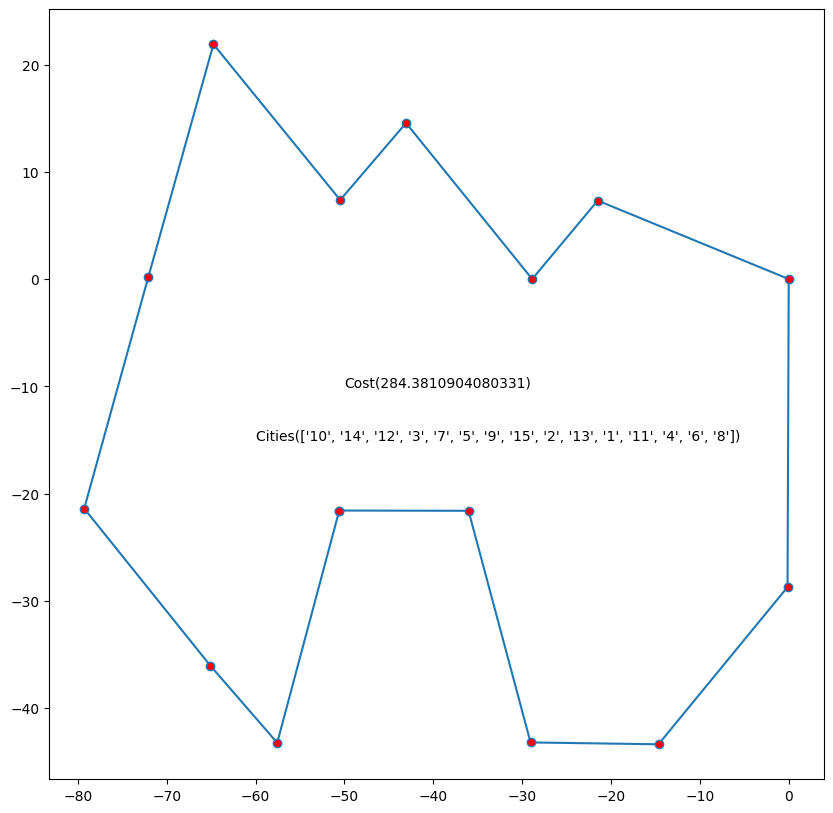

In [138]:
antColony.plotPath(bestAnt.visitedCites,bestAnt.cost) #final output

C:\Users\Omar\AppData\Local\Temp\ipykernel_7684\2769304516.py:138: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


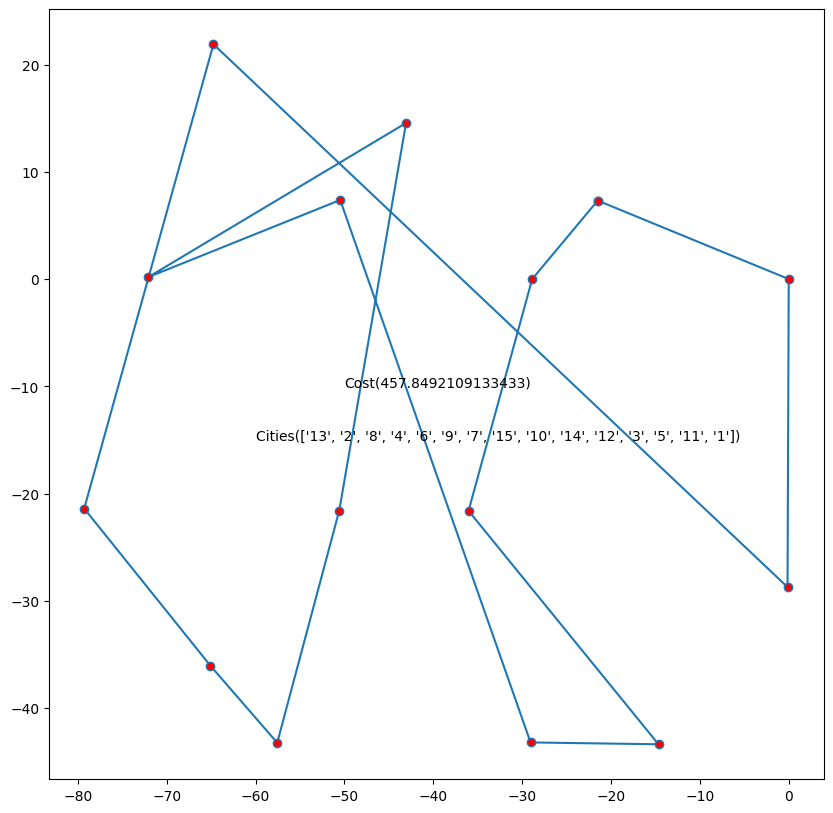

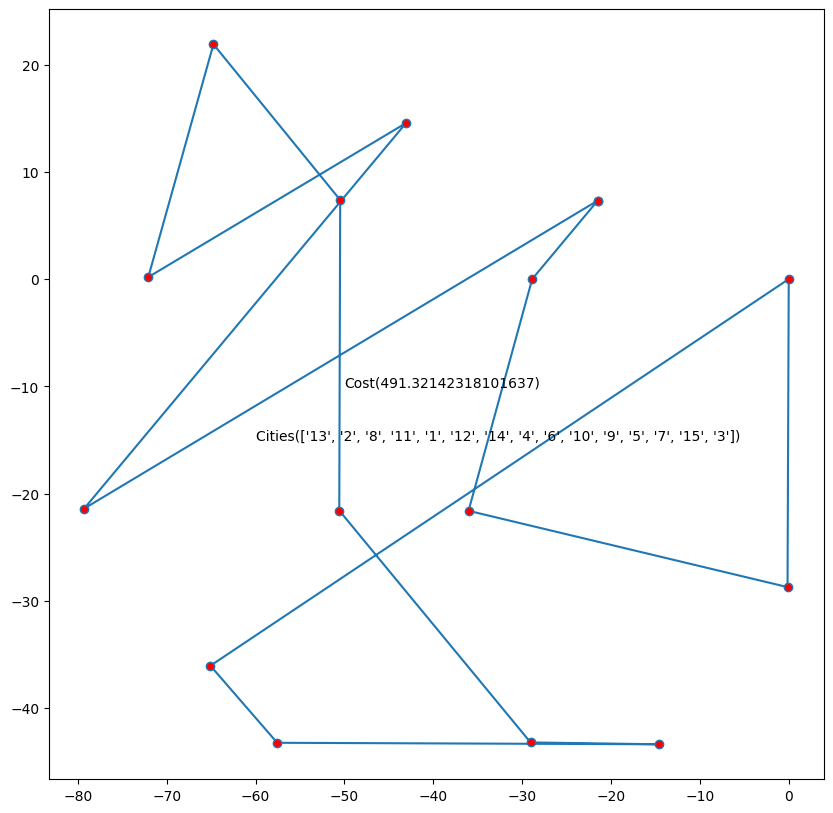

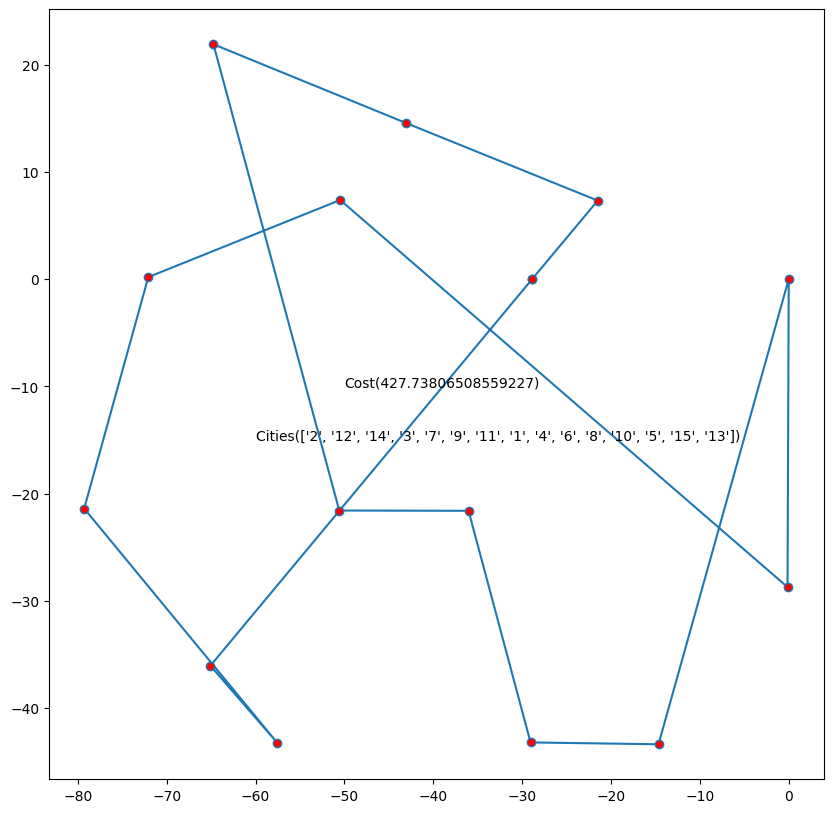

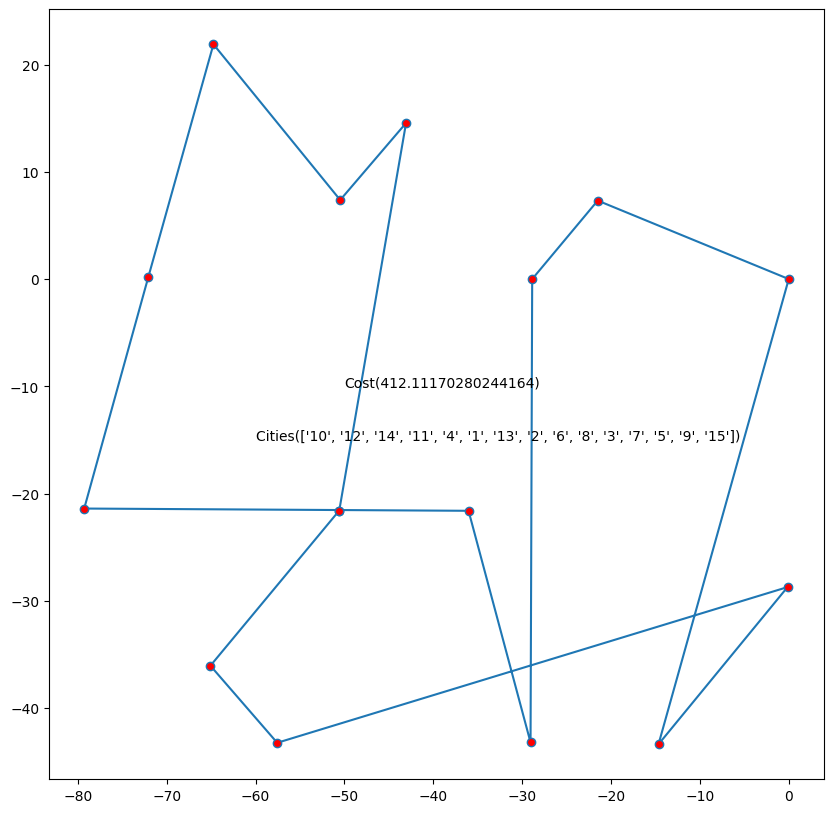

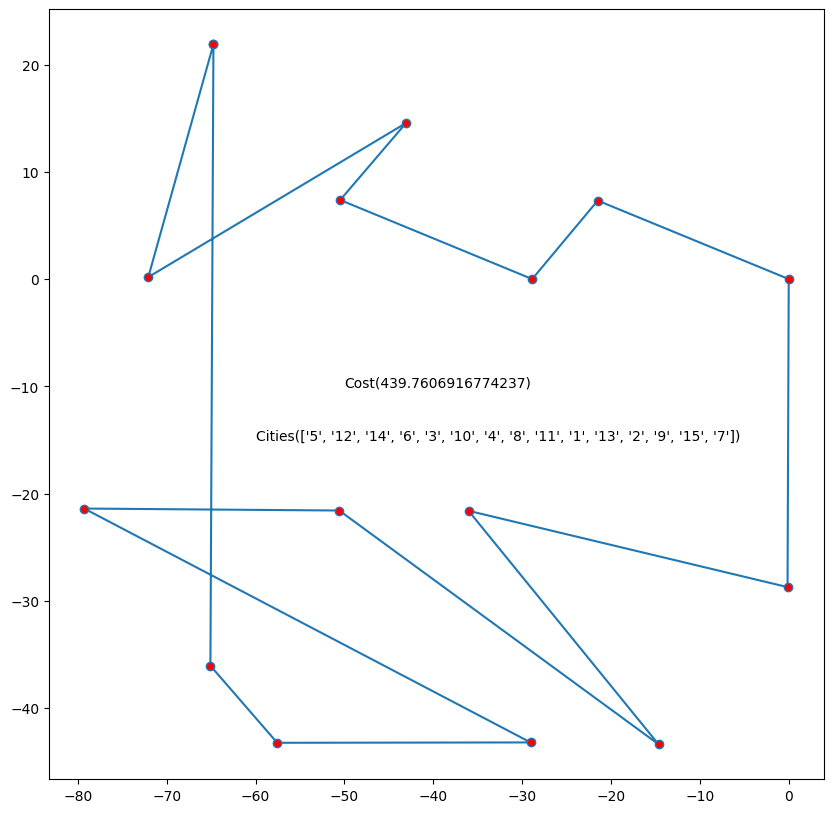

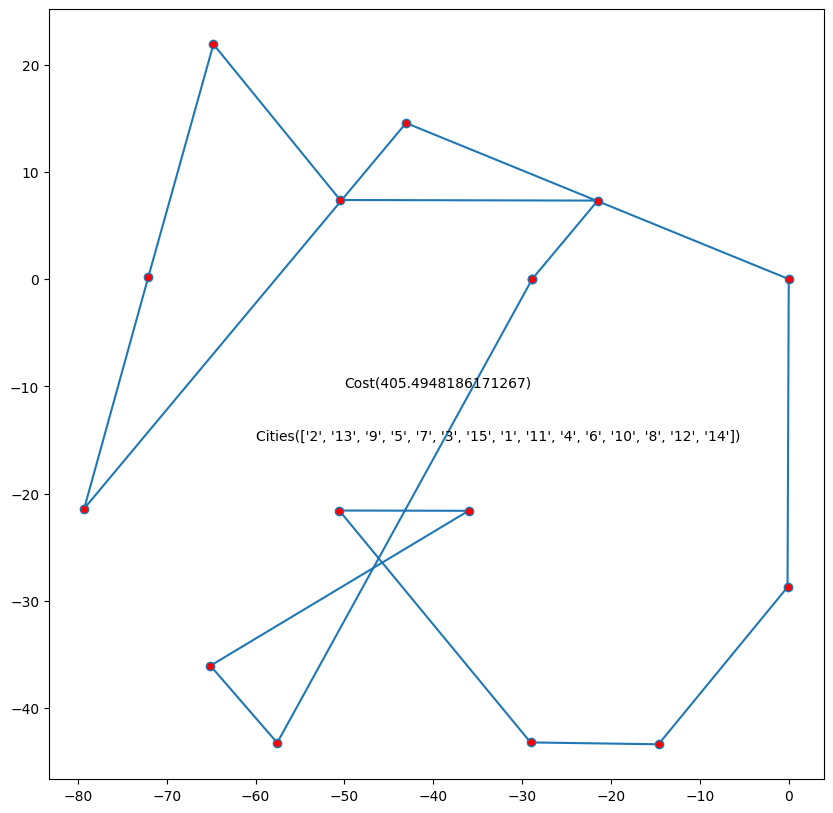

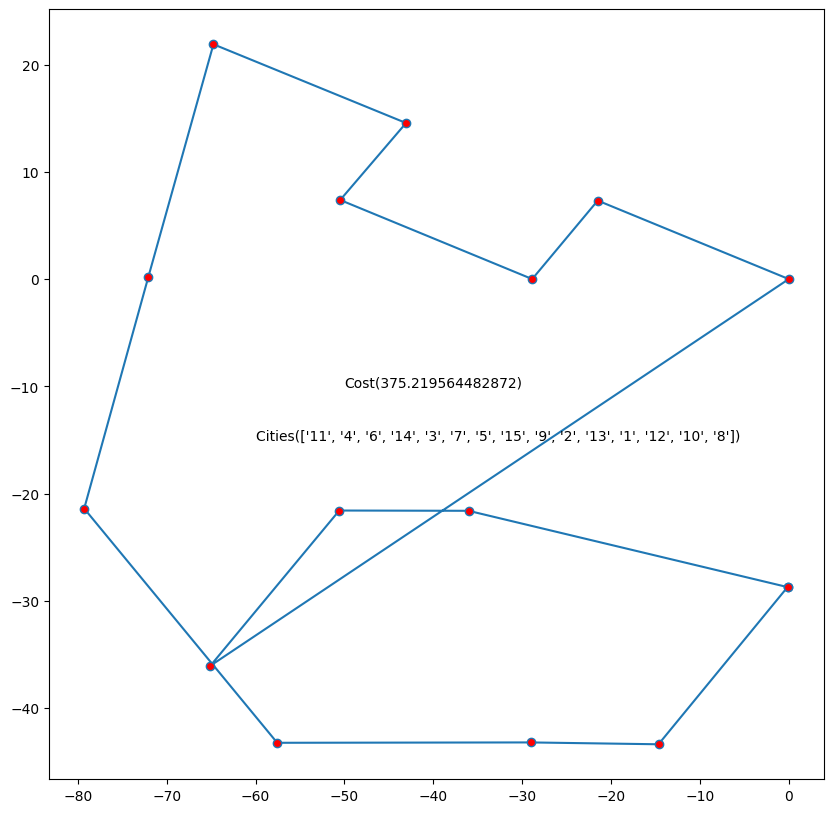

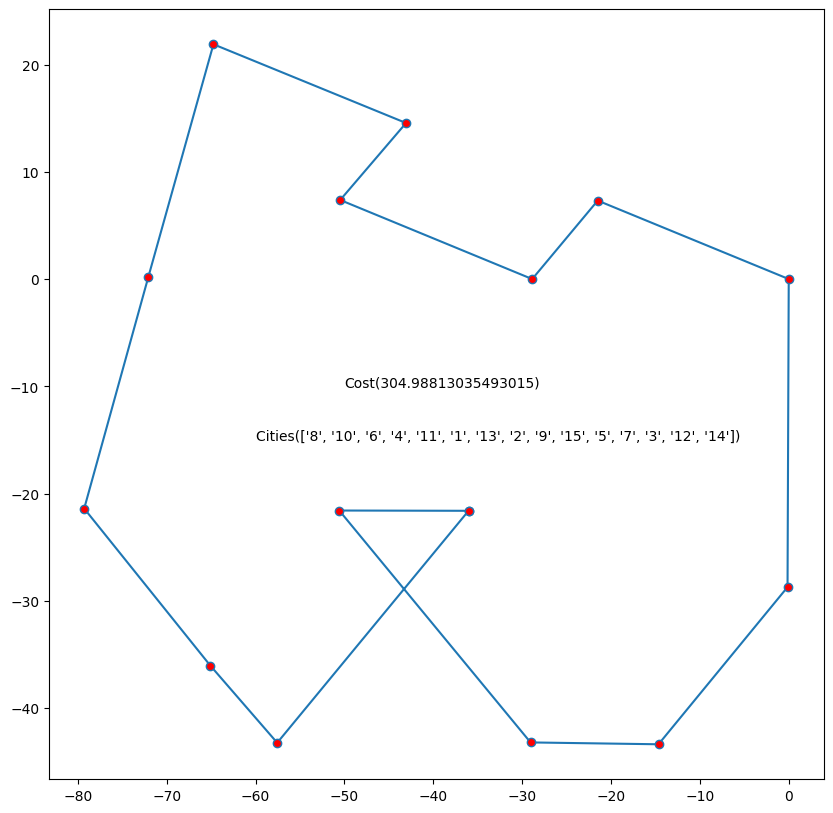

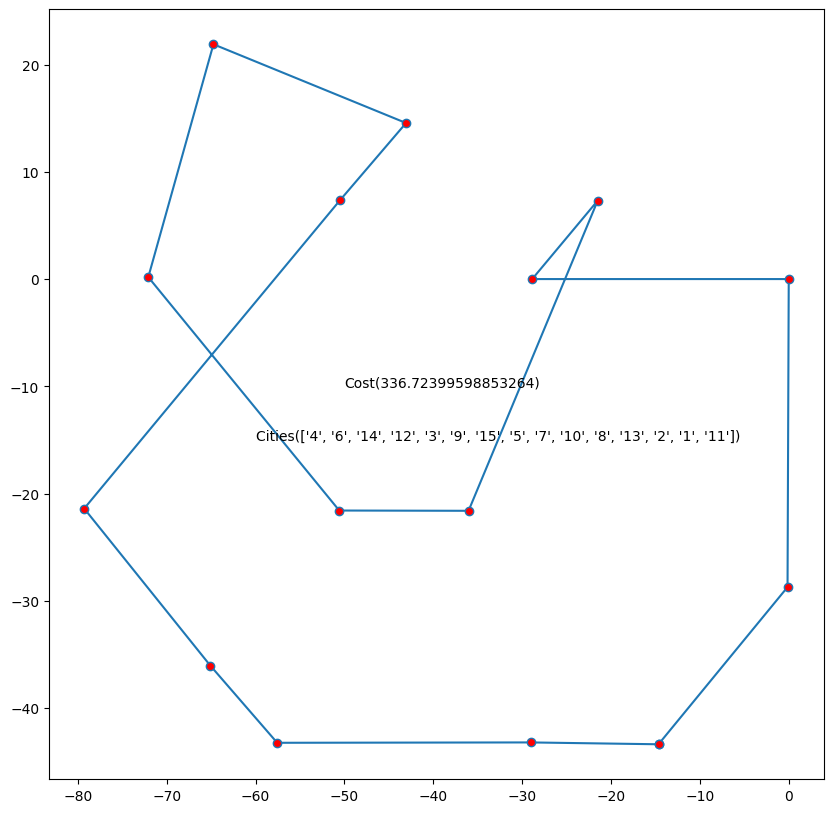

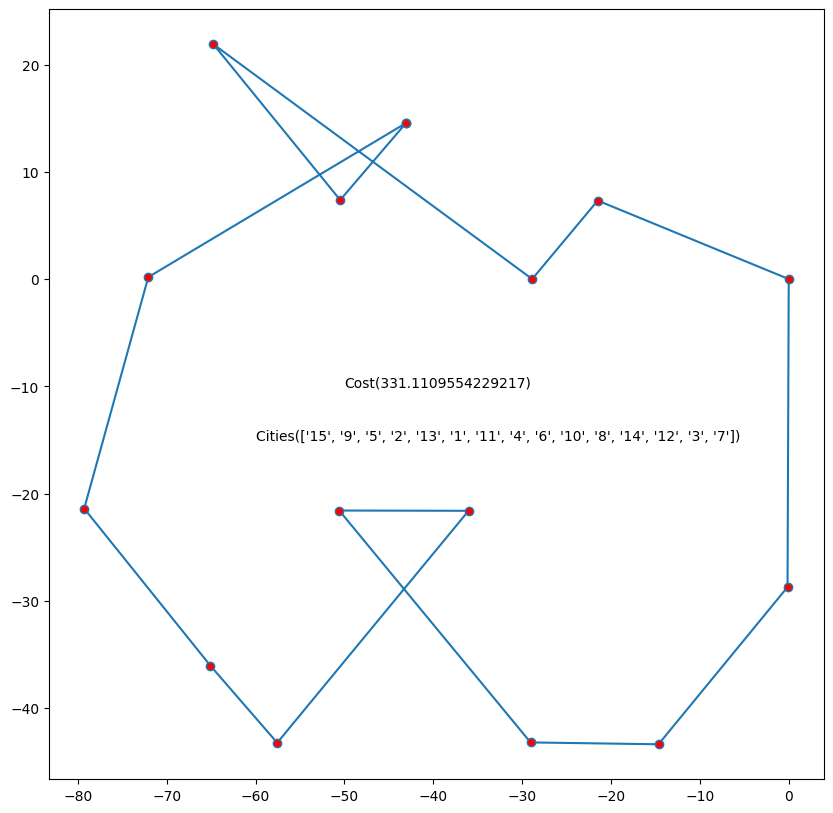

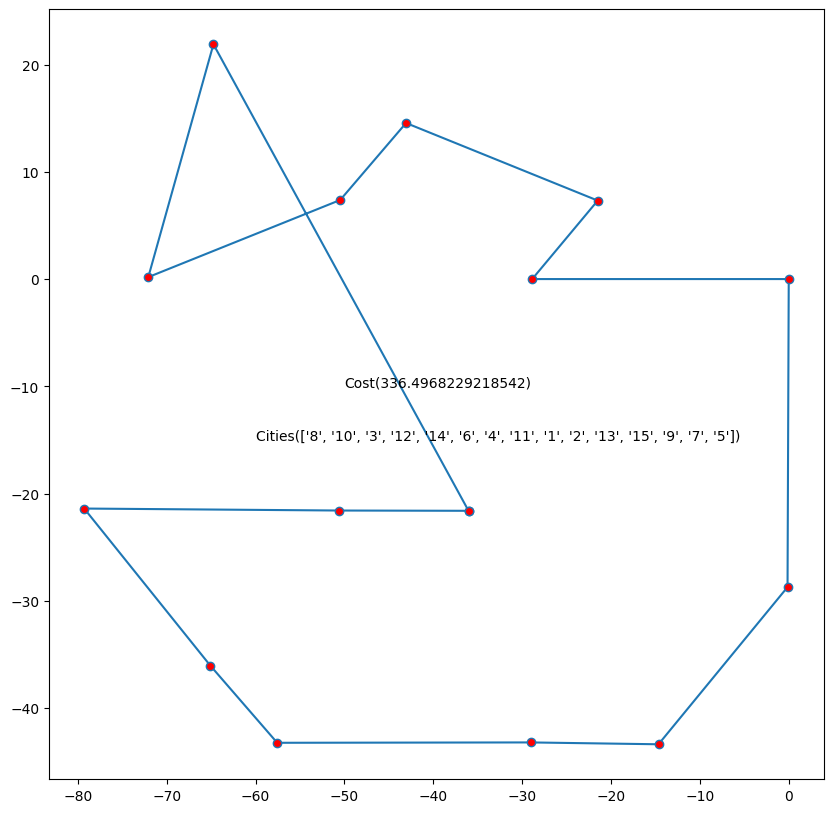

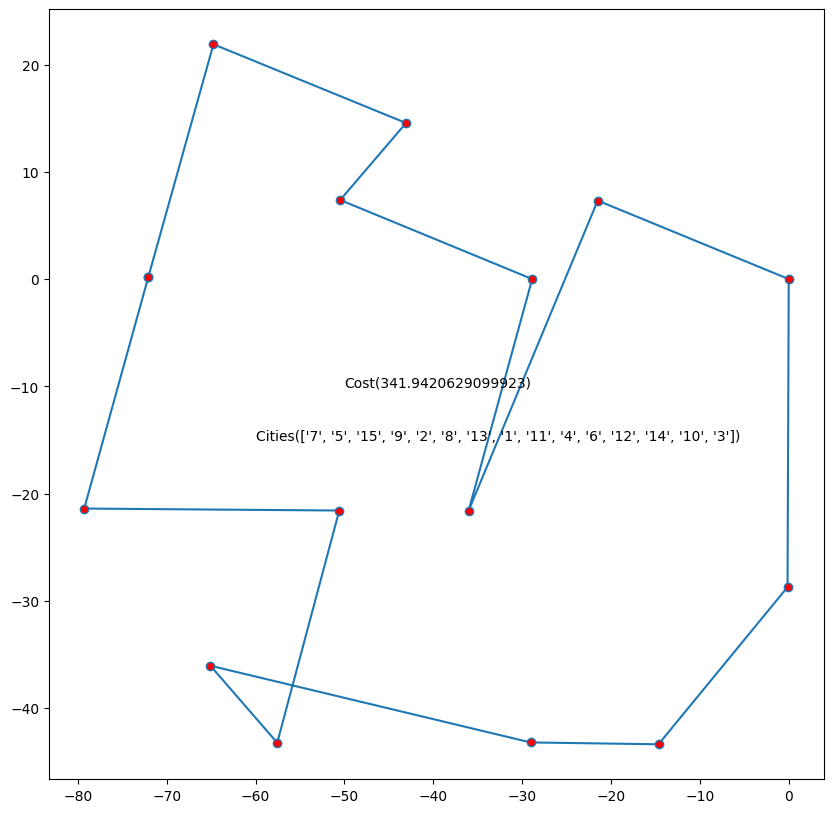

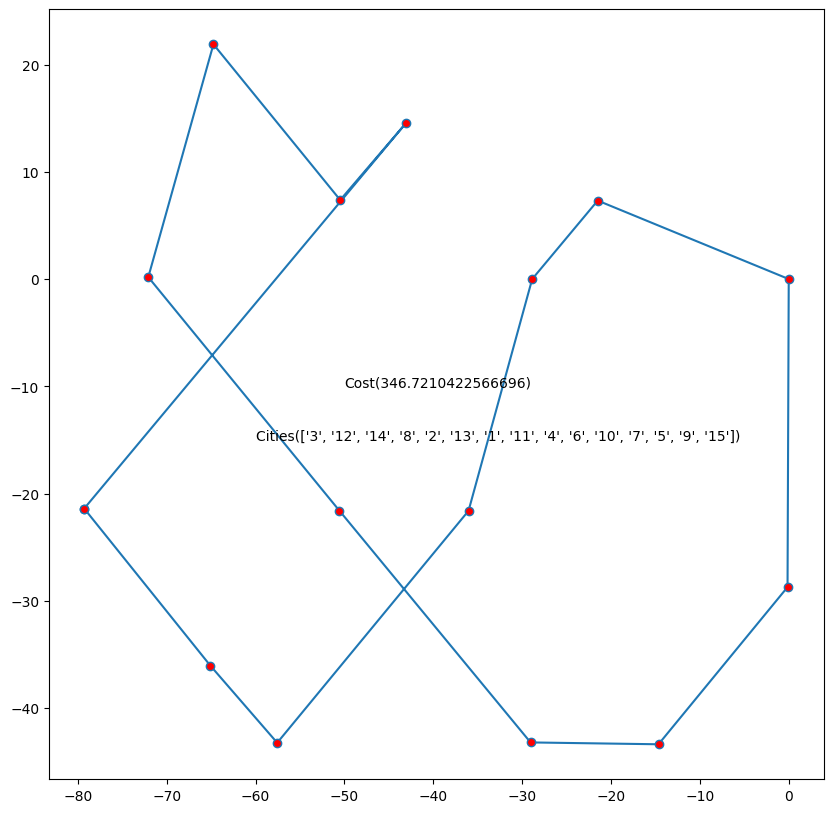

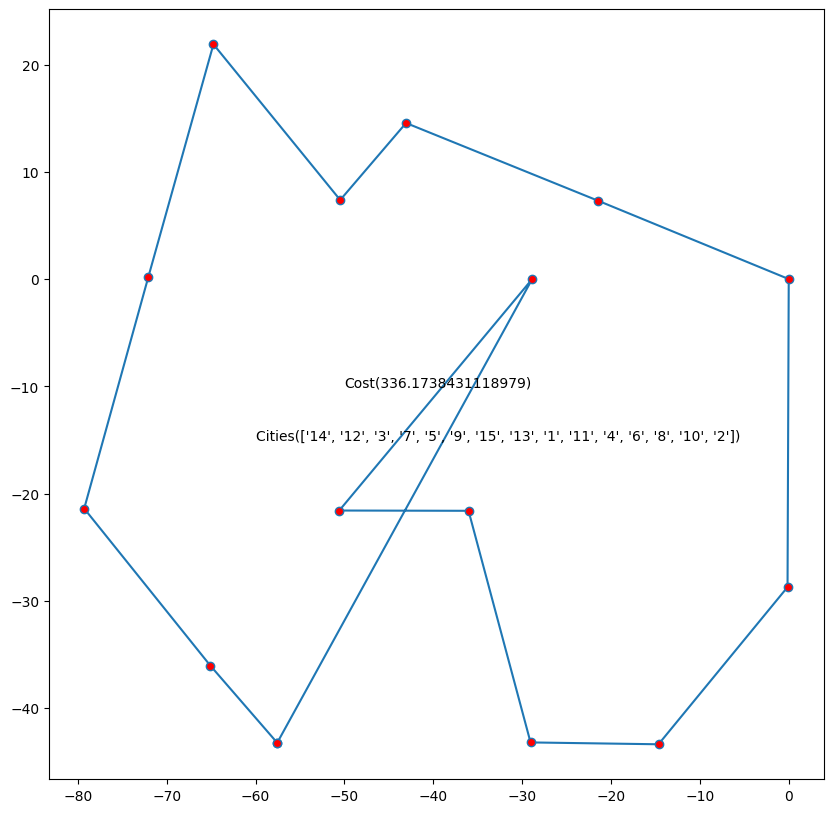

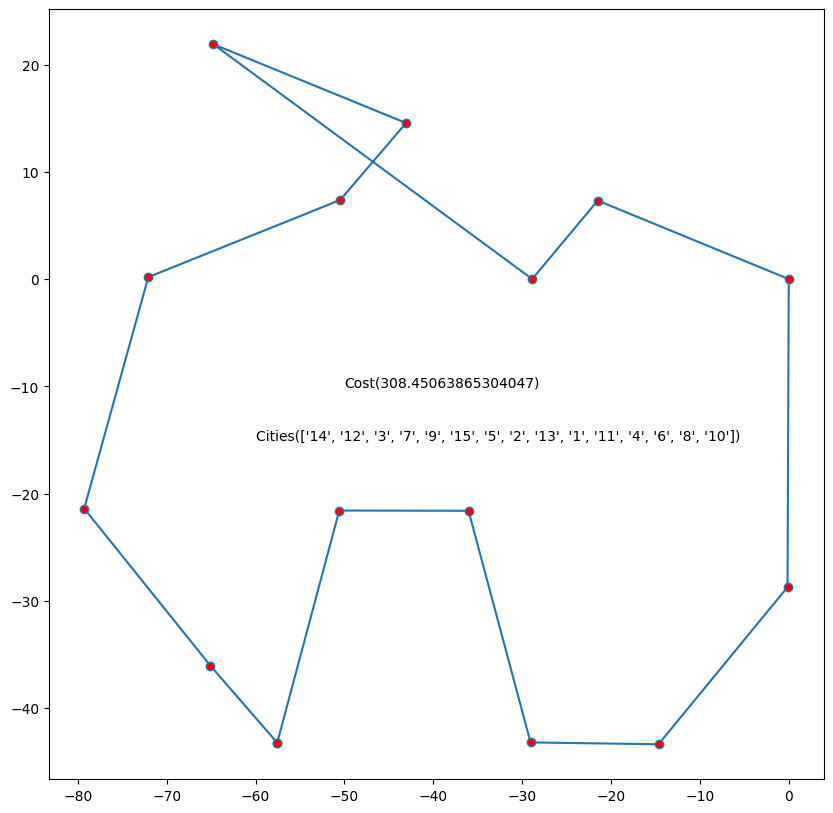

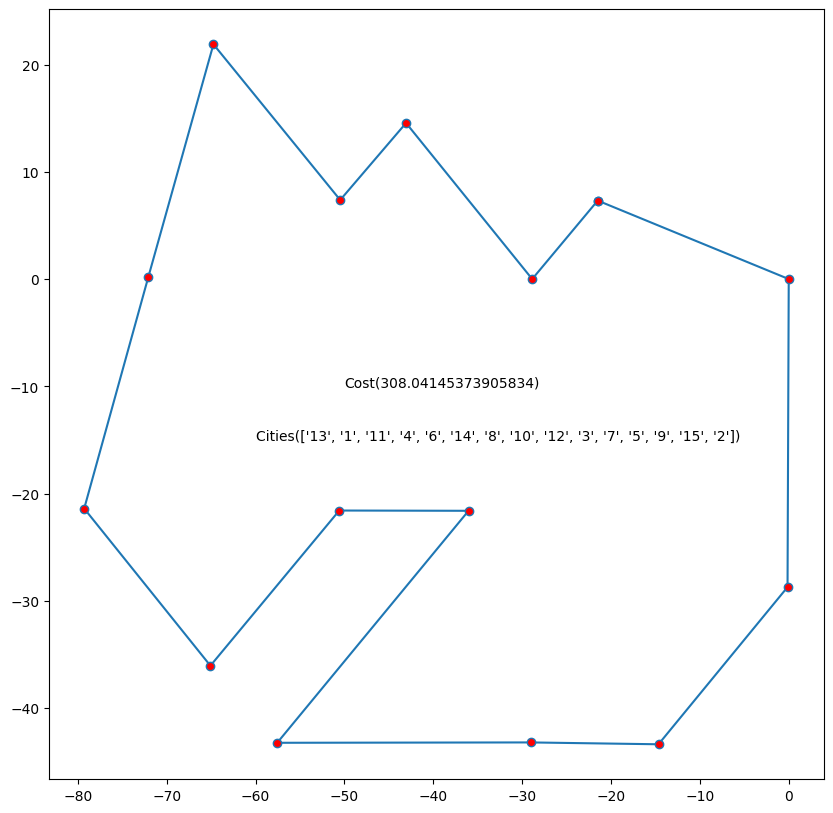

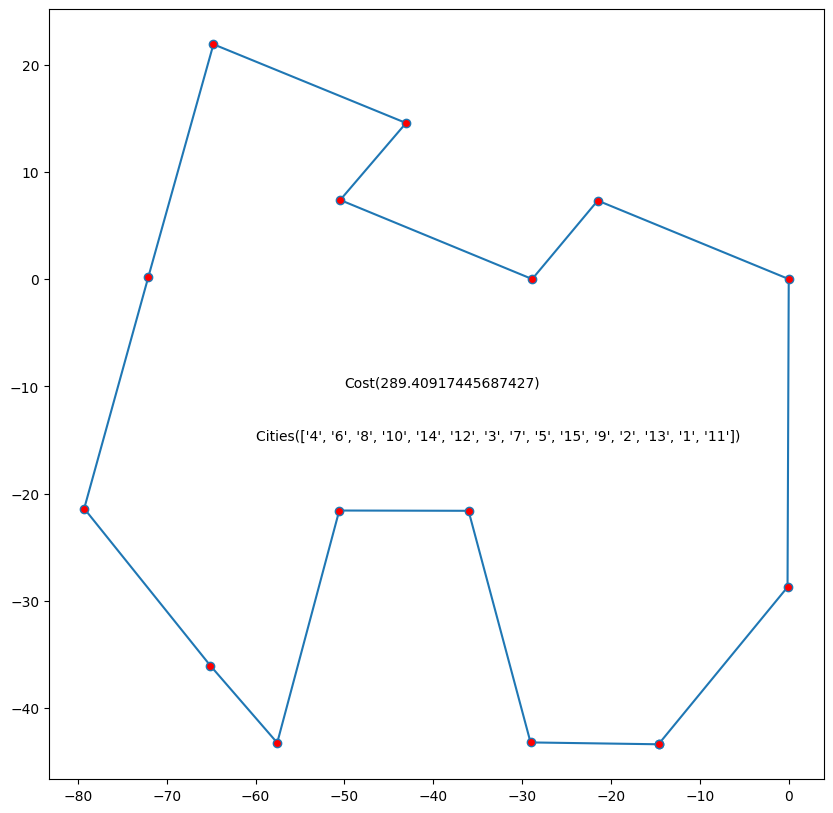

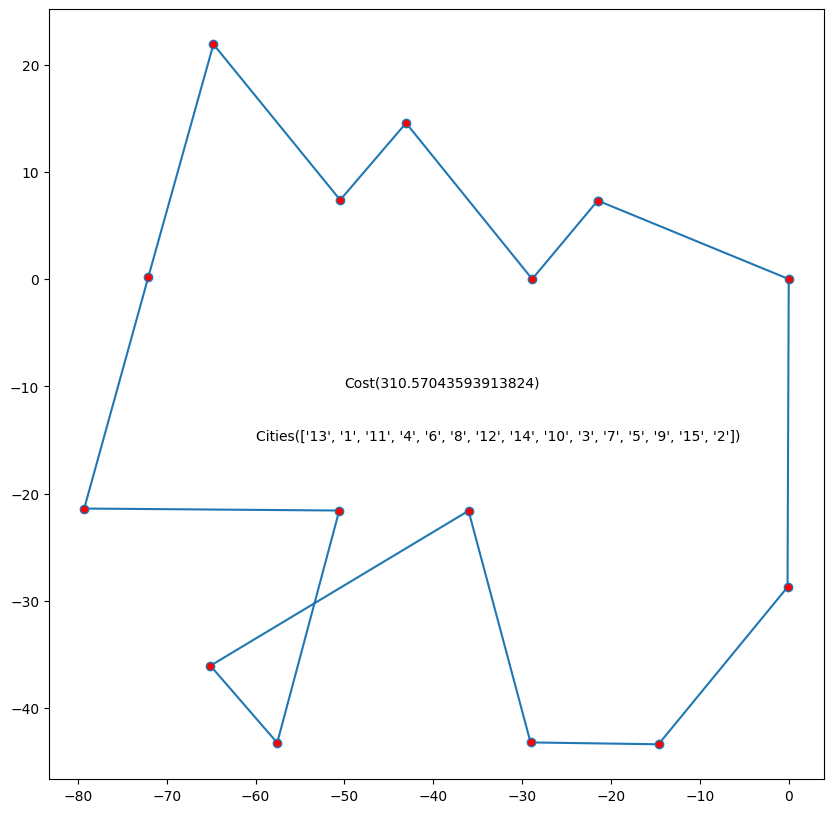

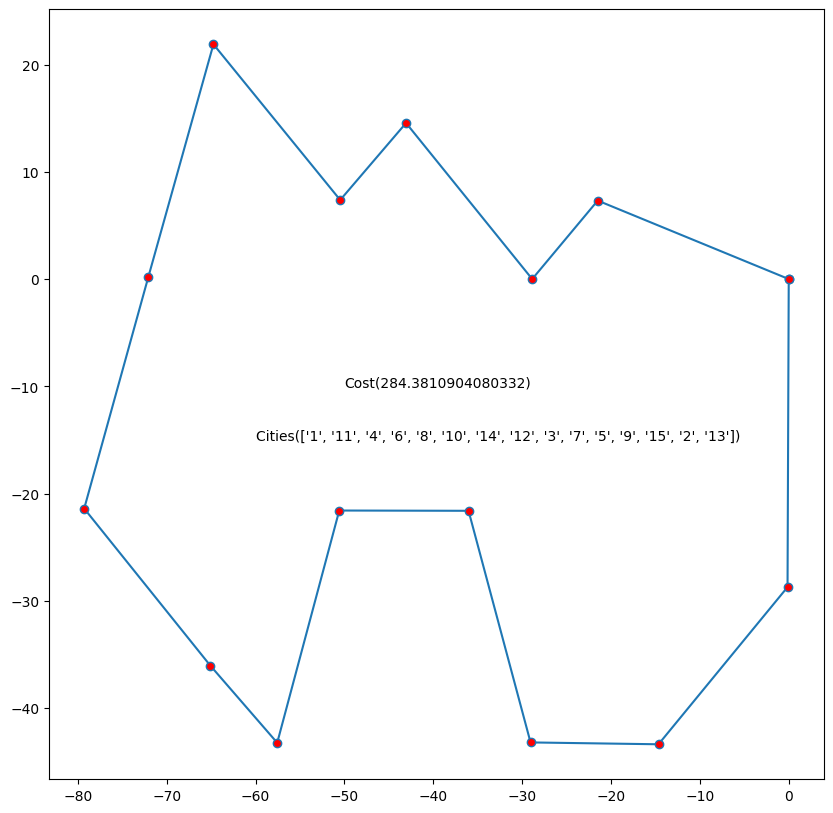

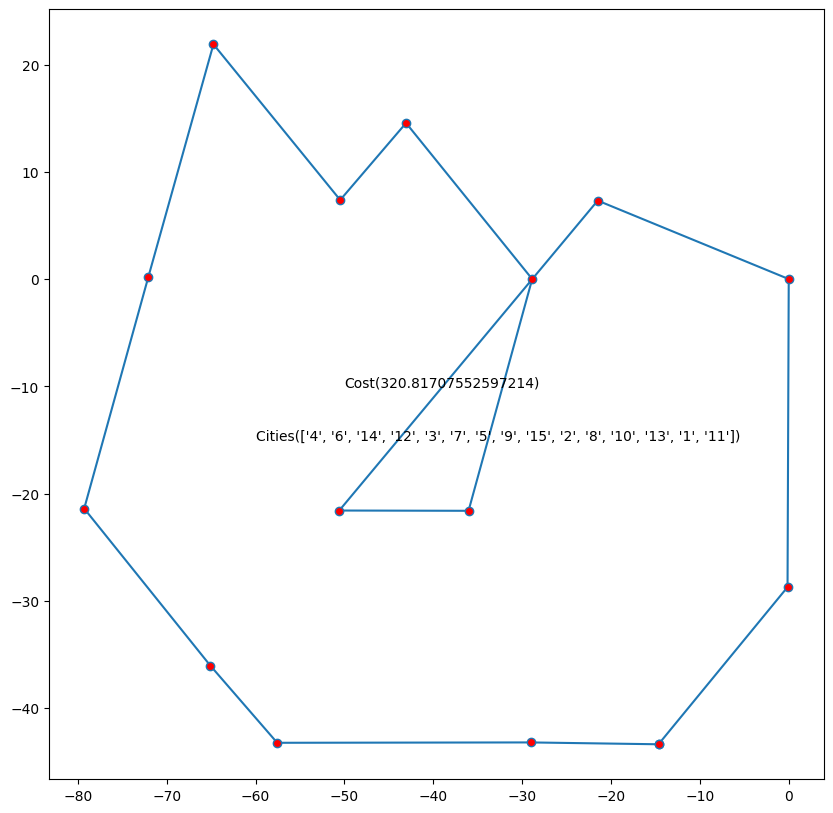

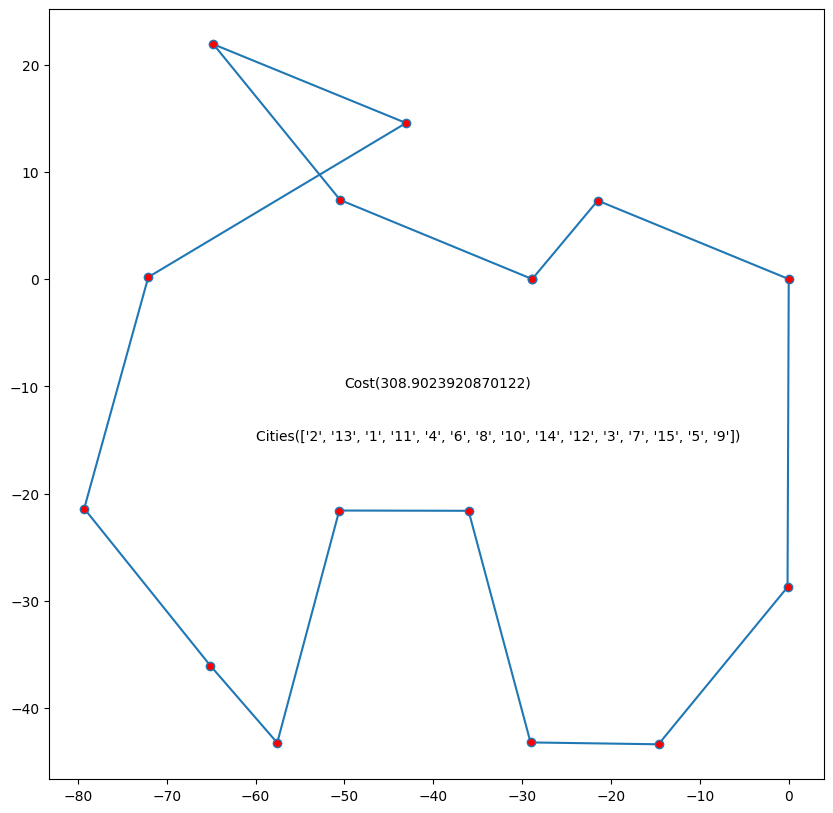

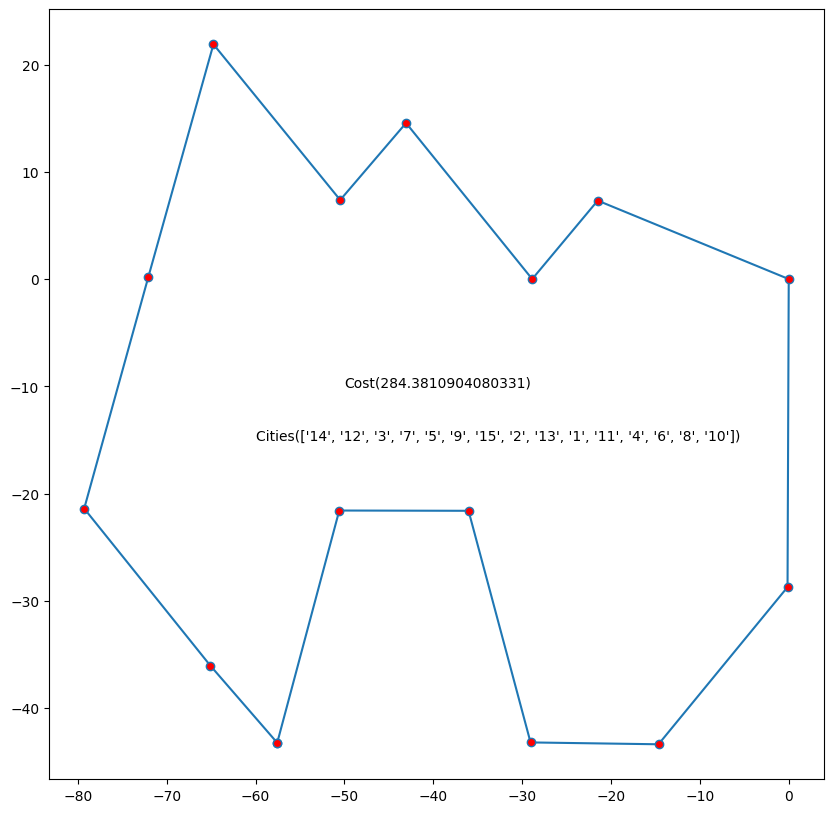

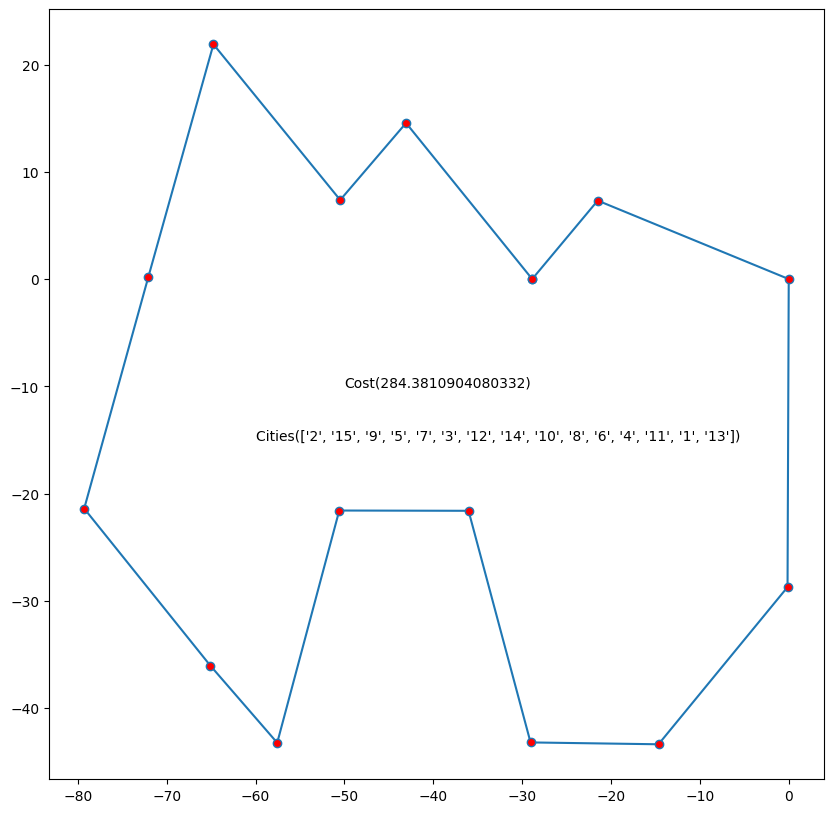

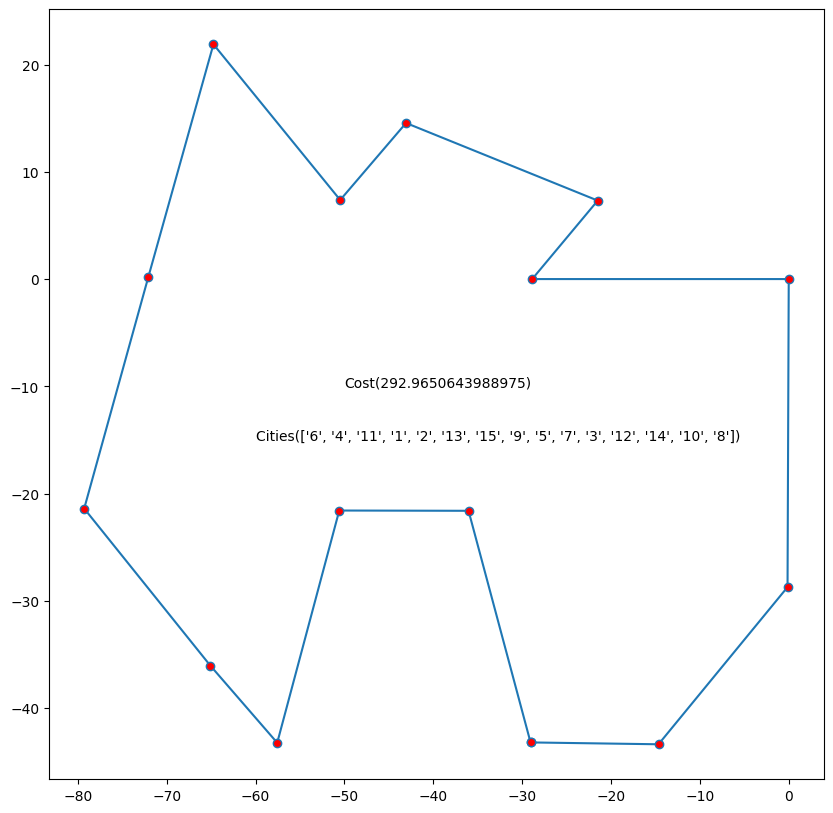

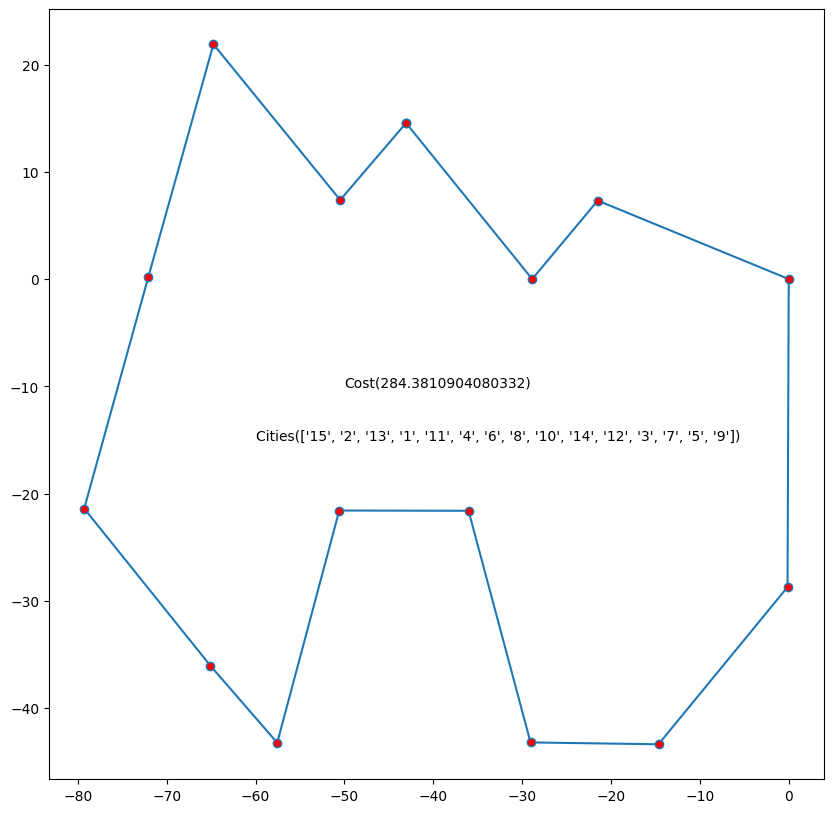

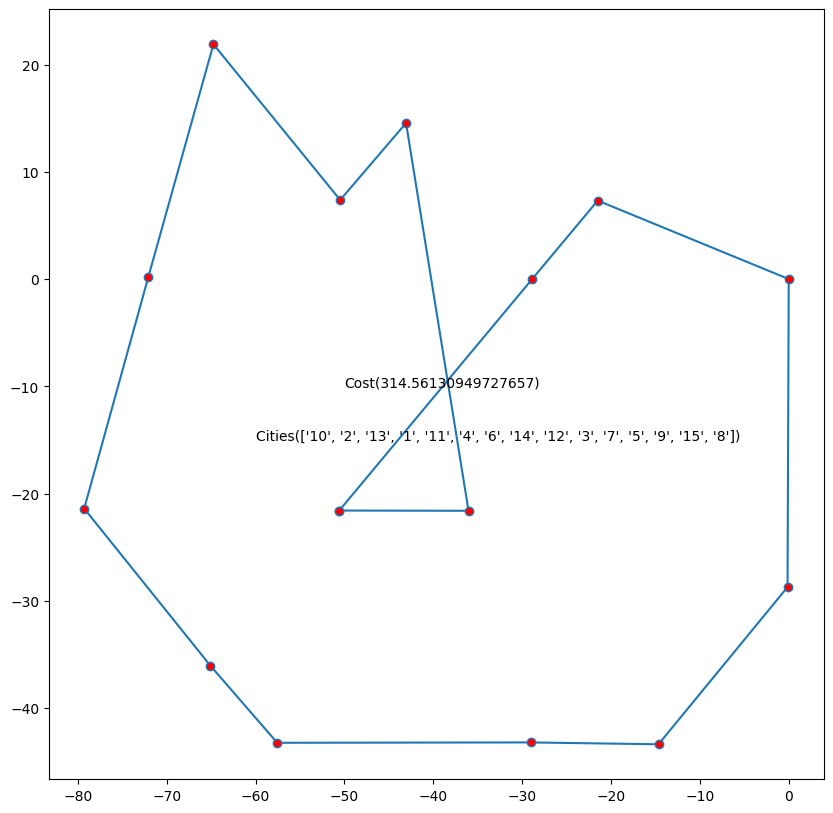

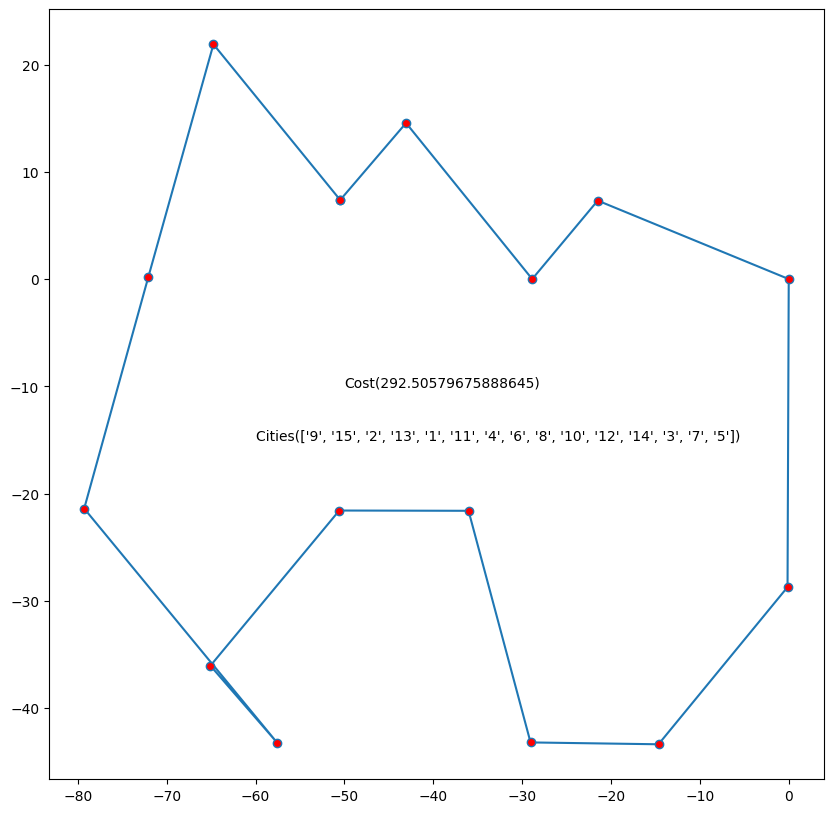

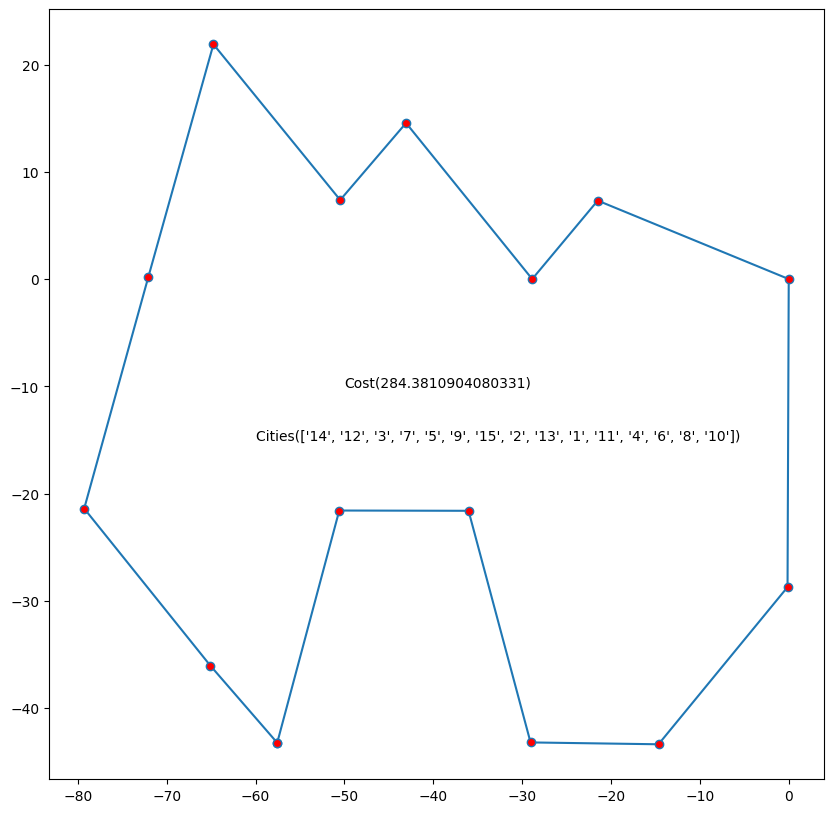

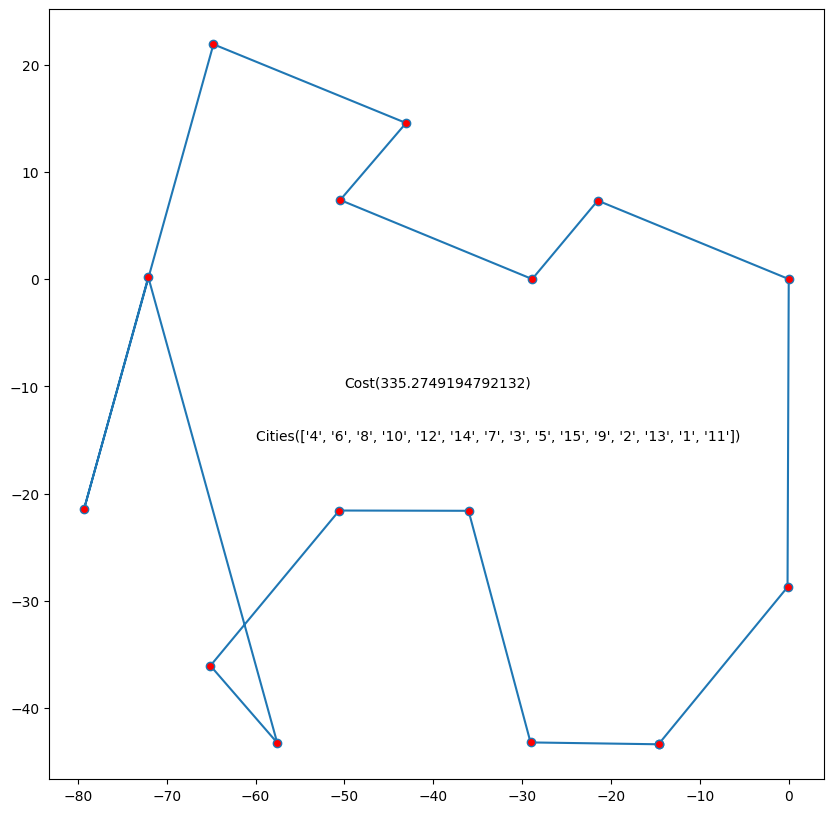

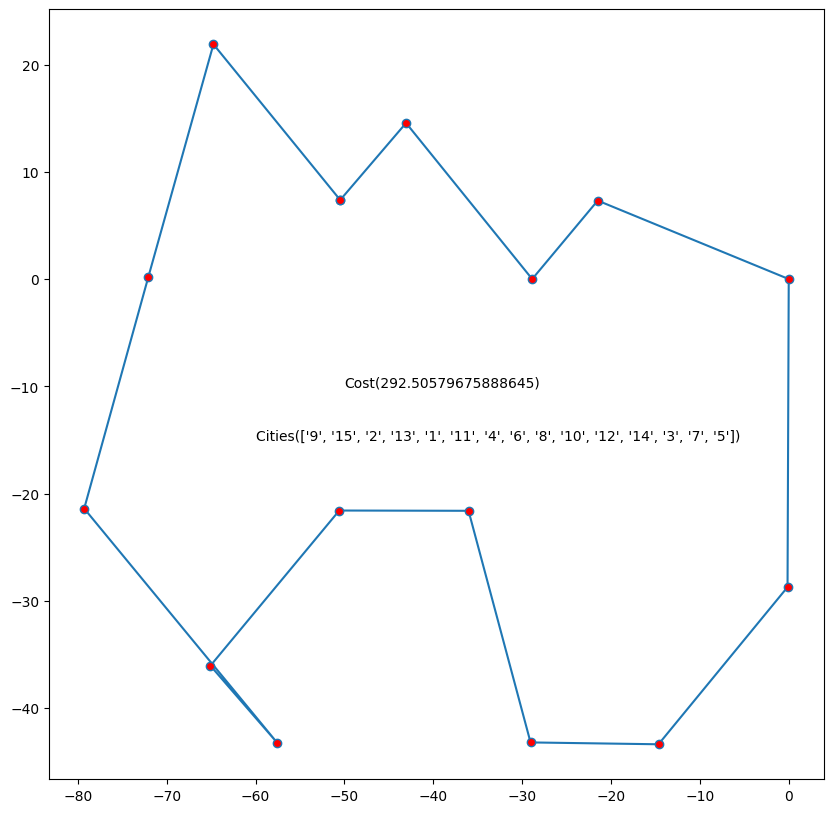

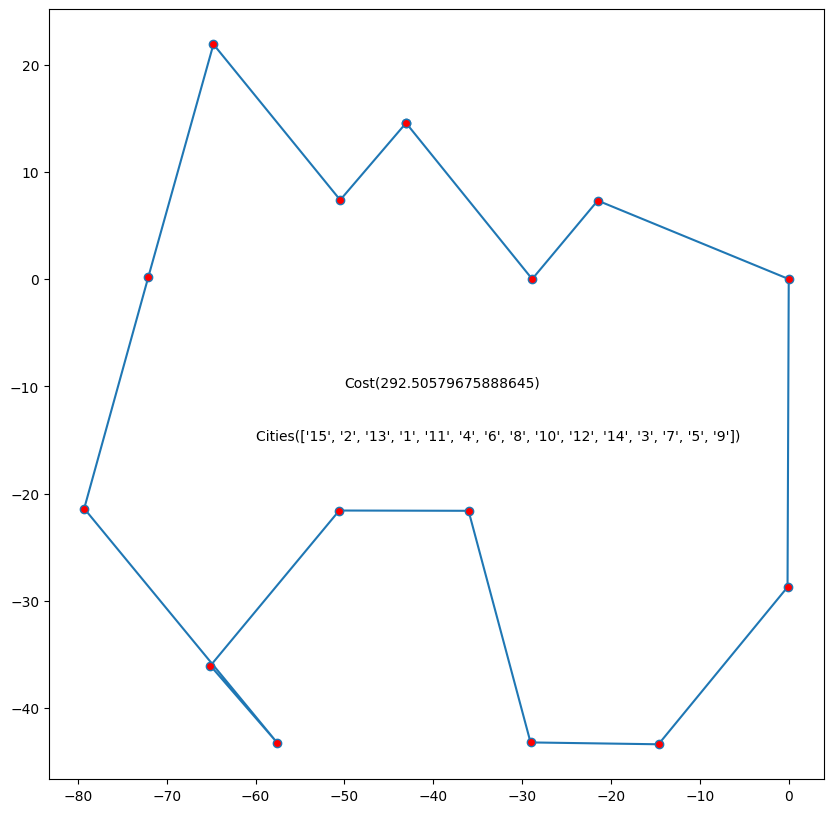

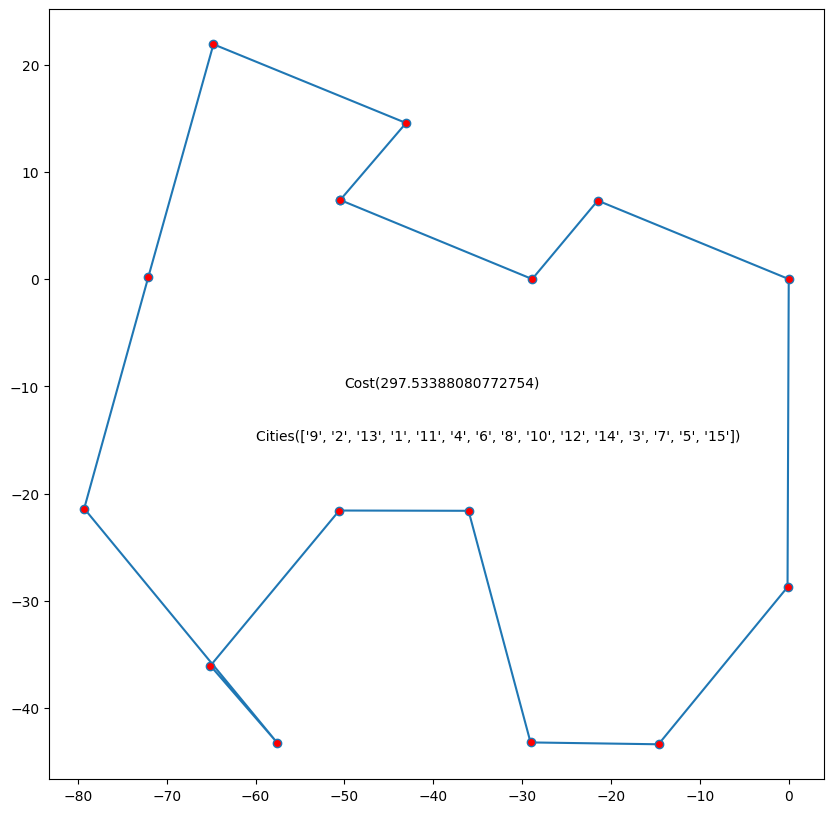

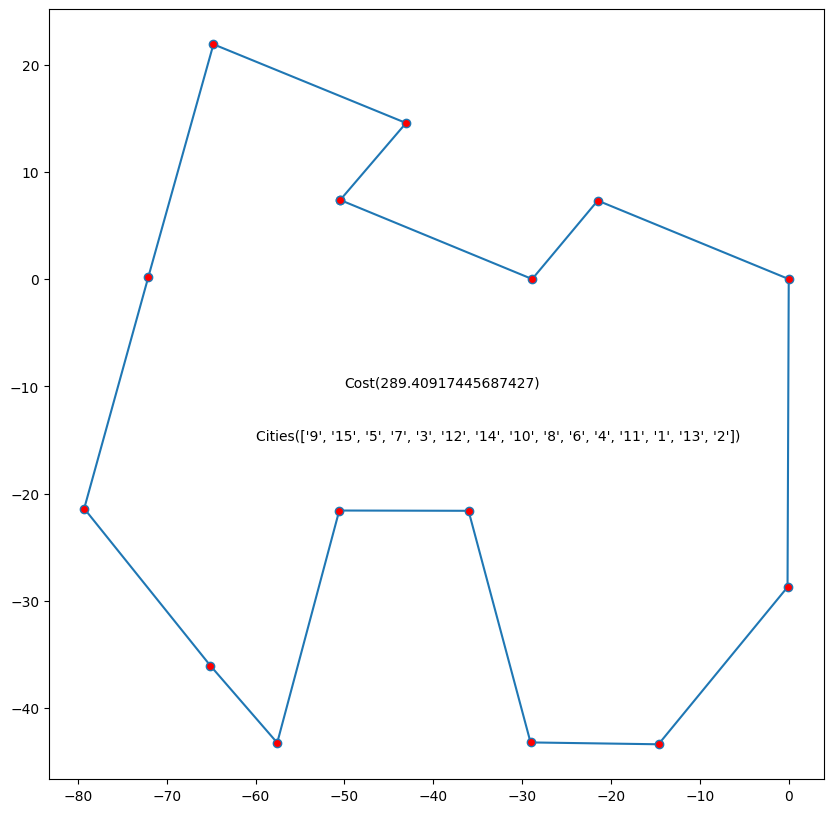

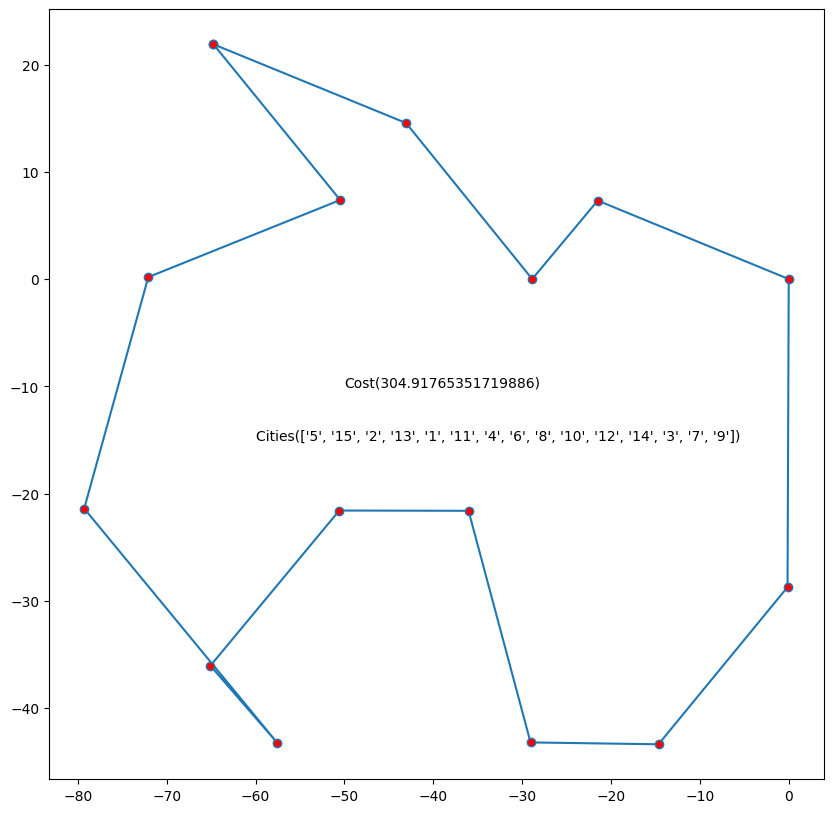

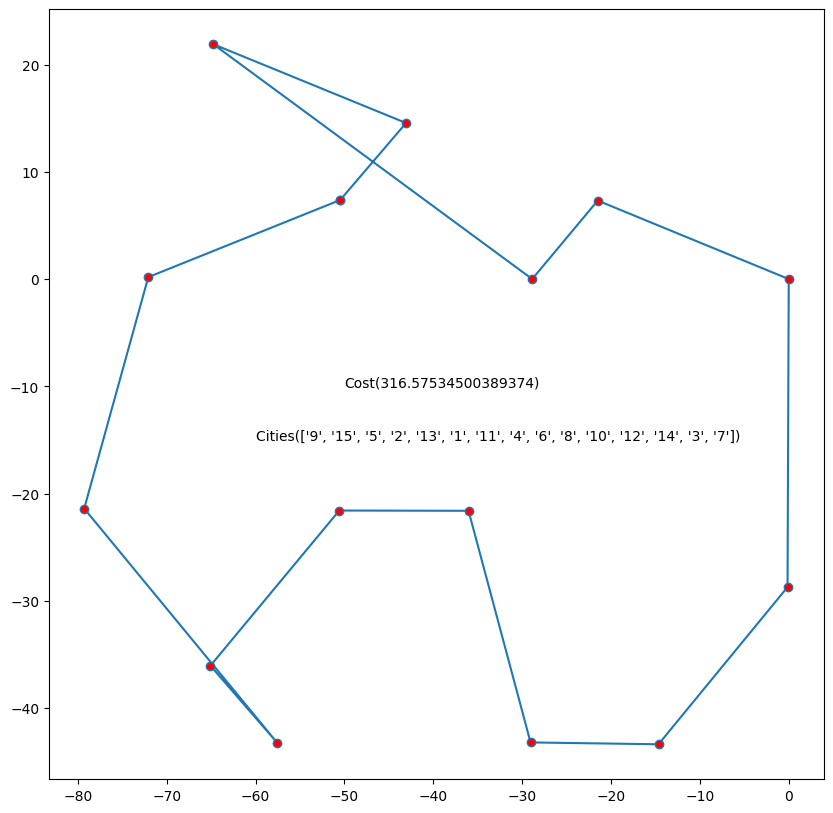

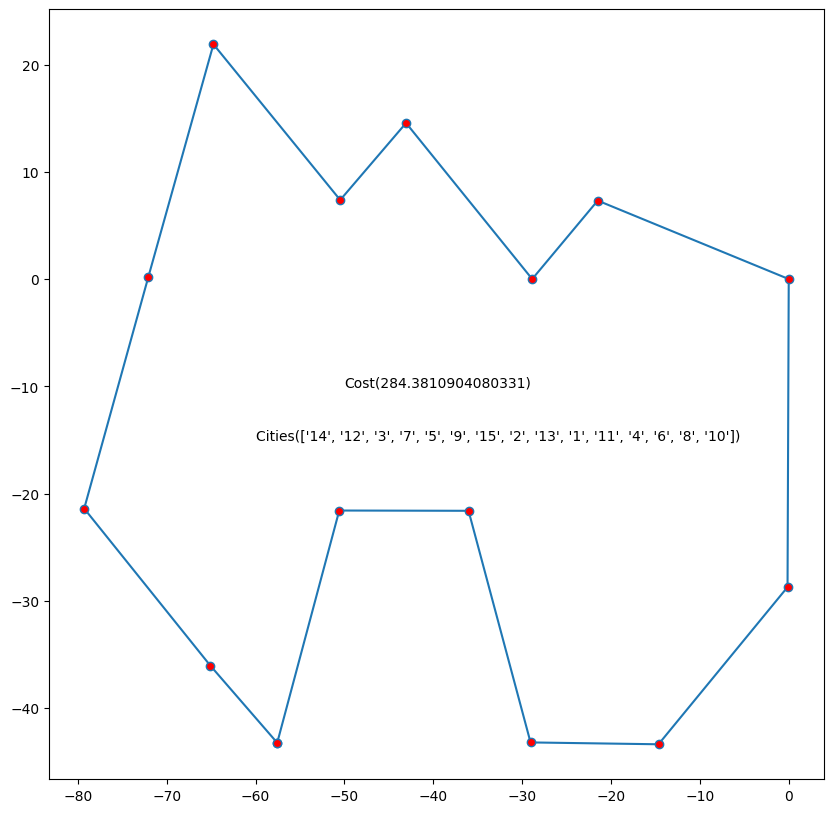

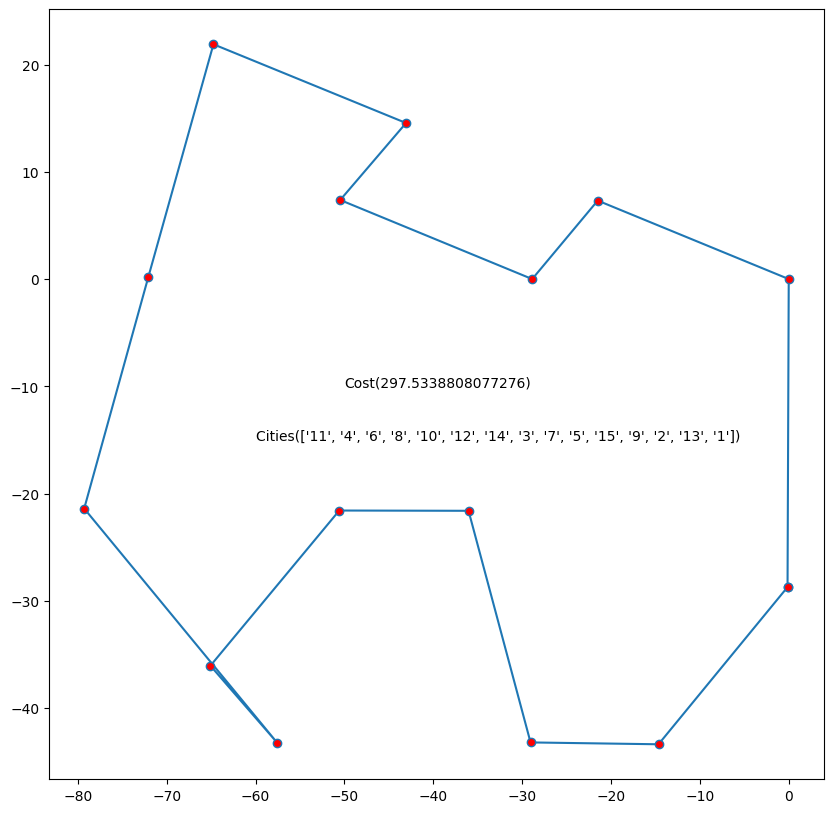

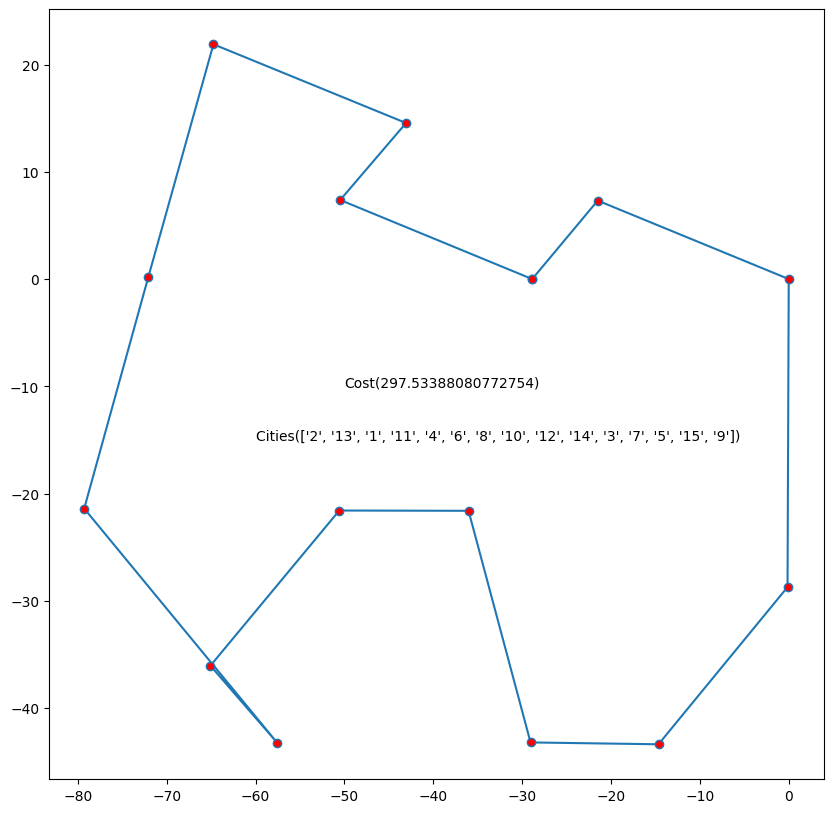

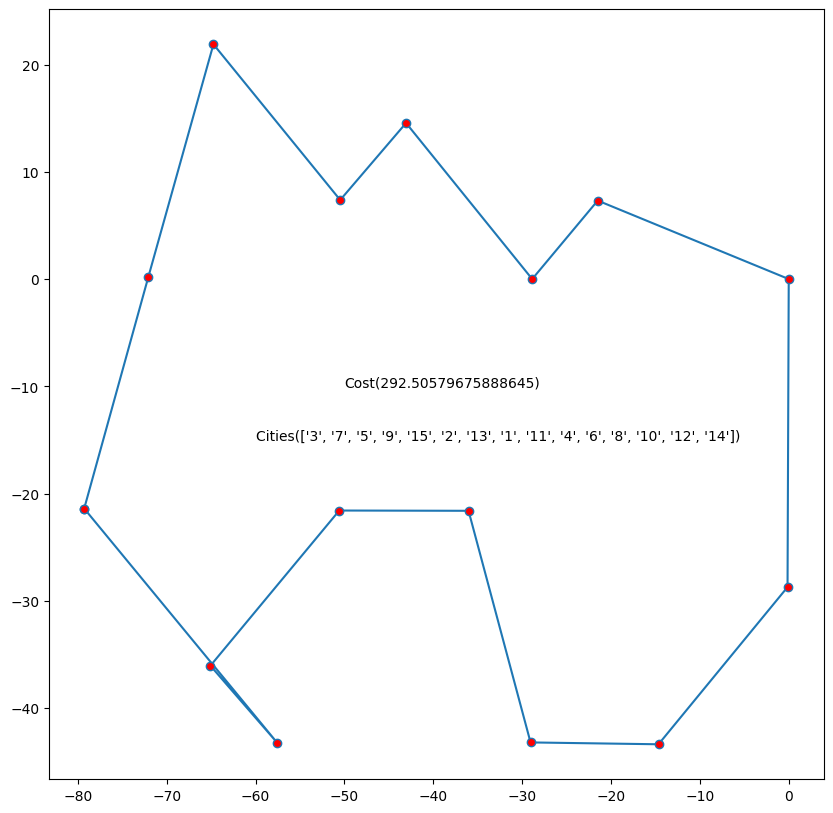

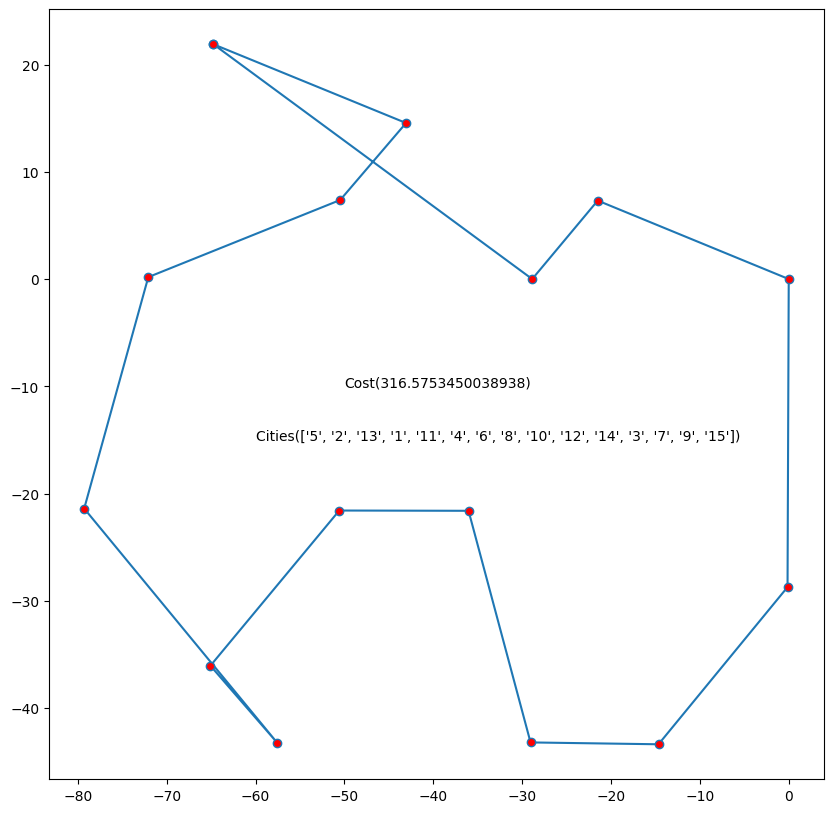

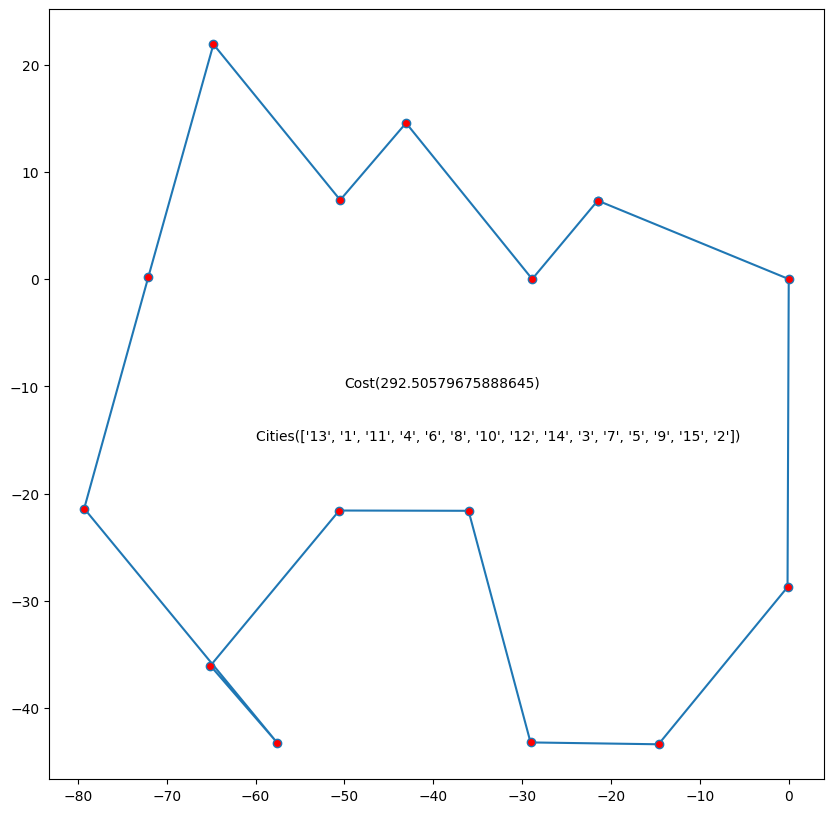

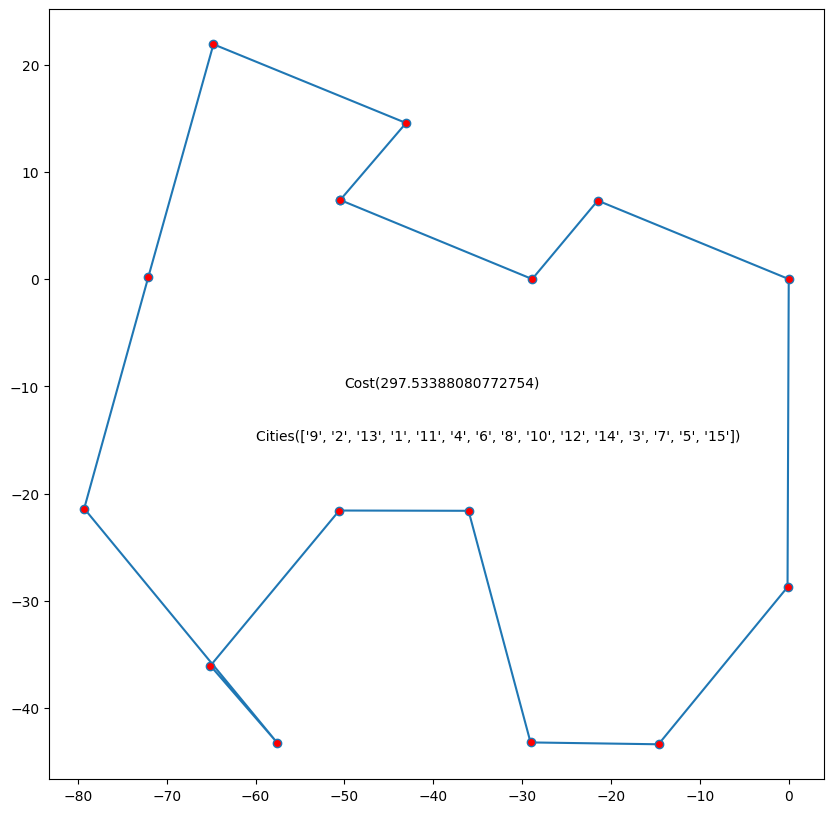

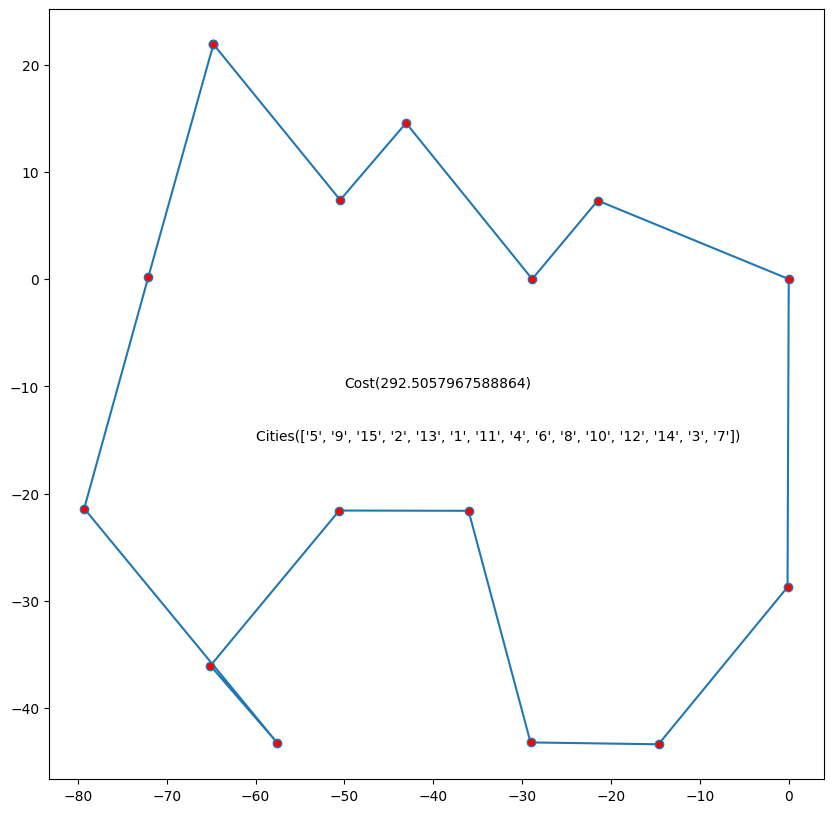

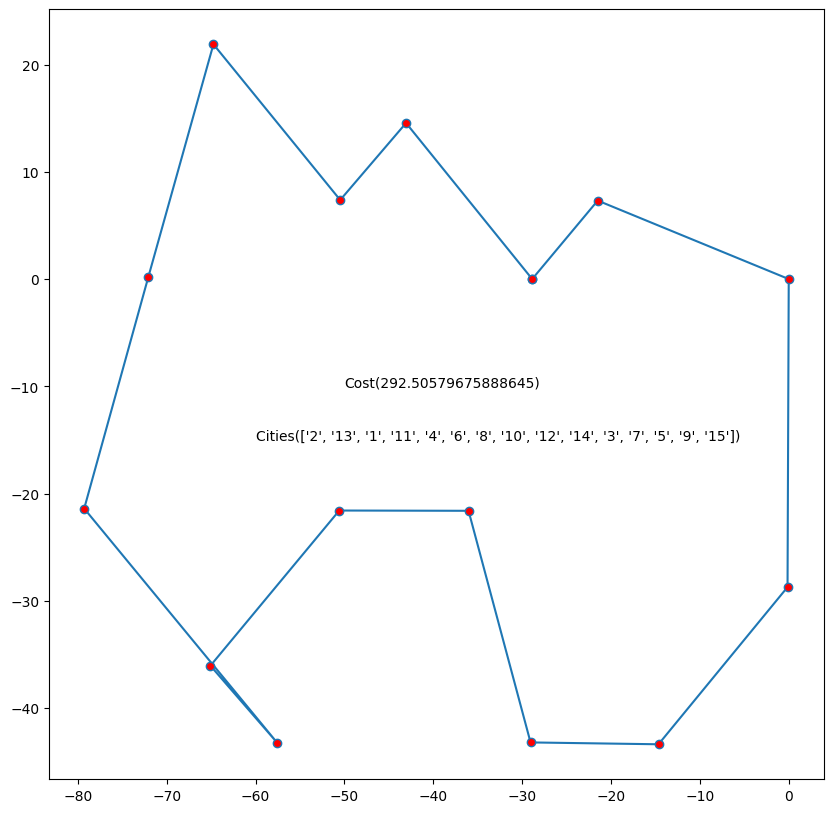

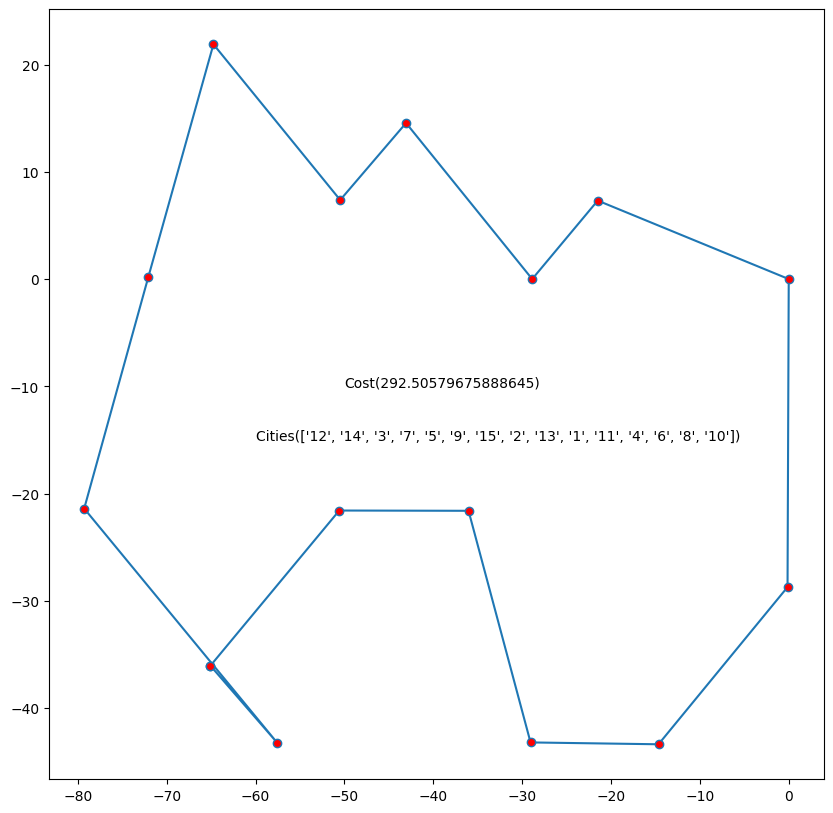

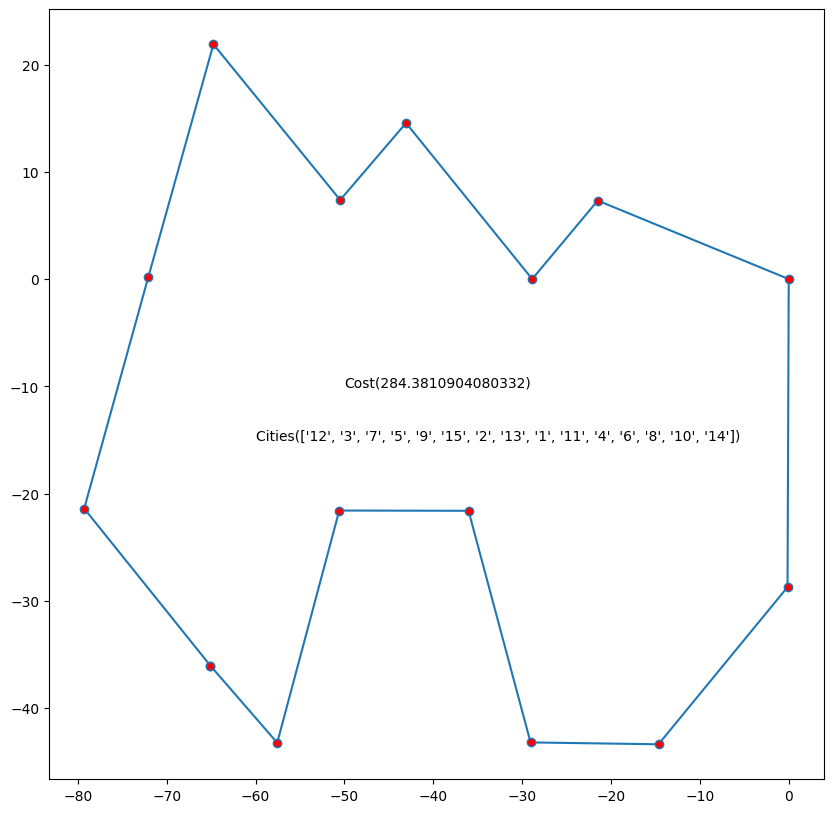

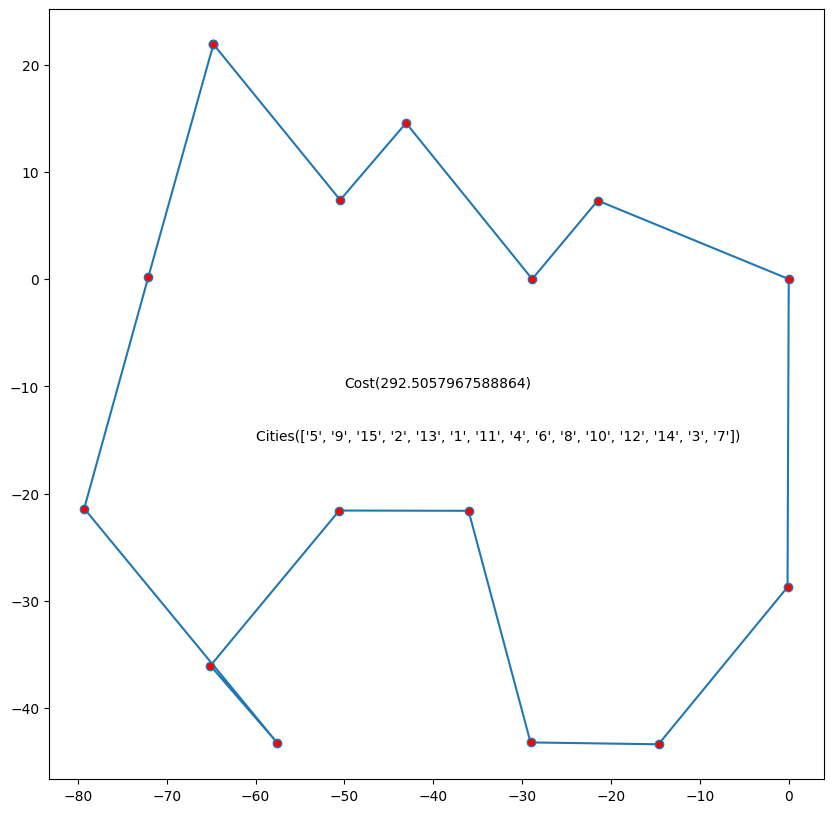

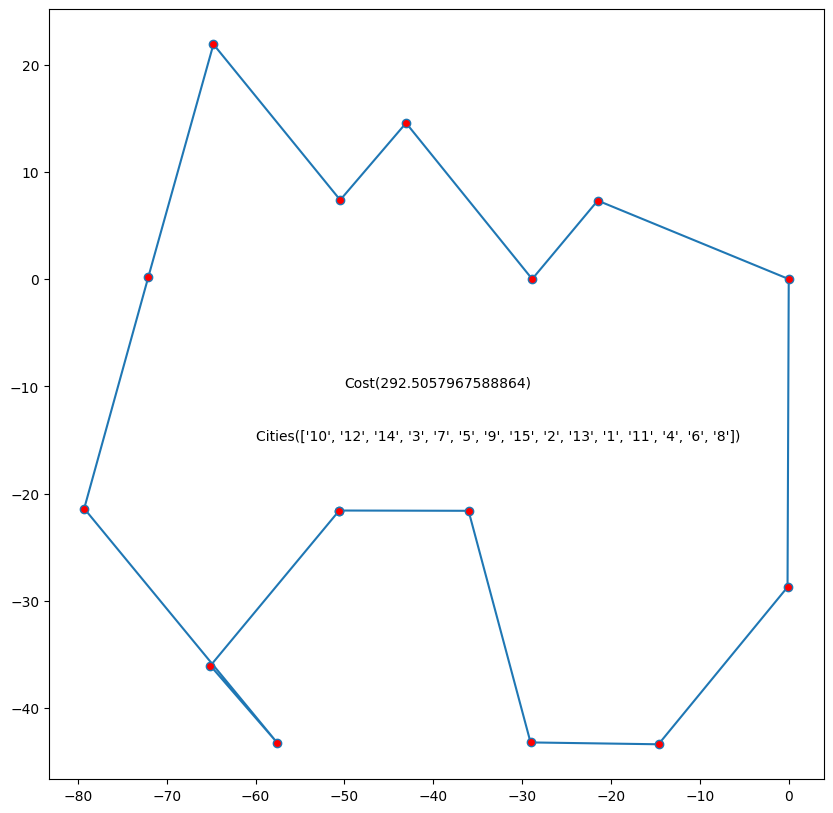

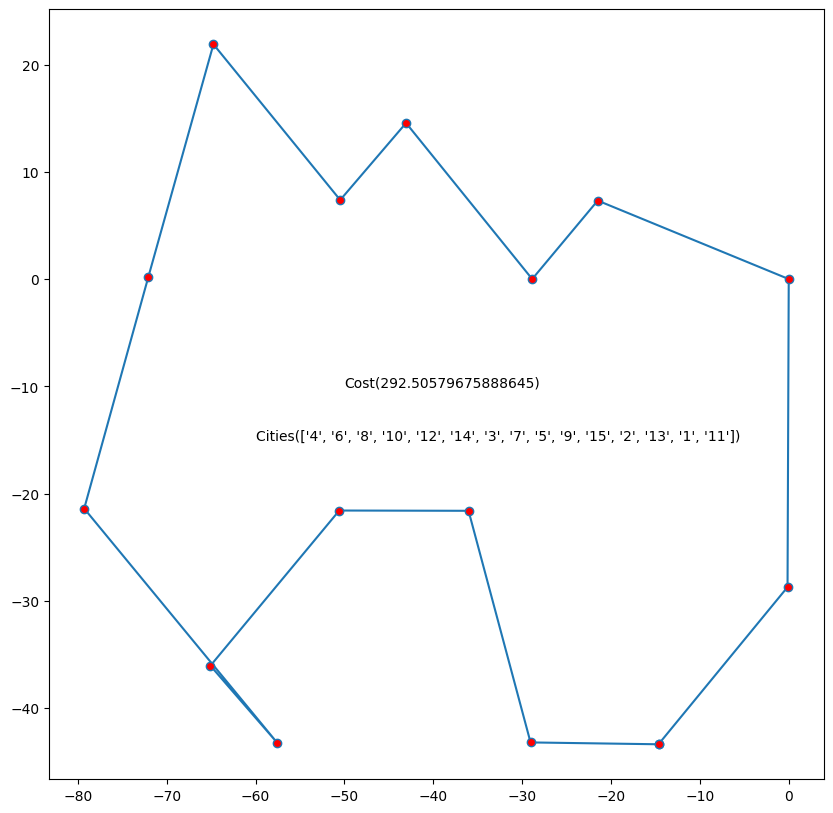

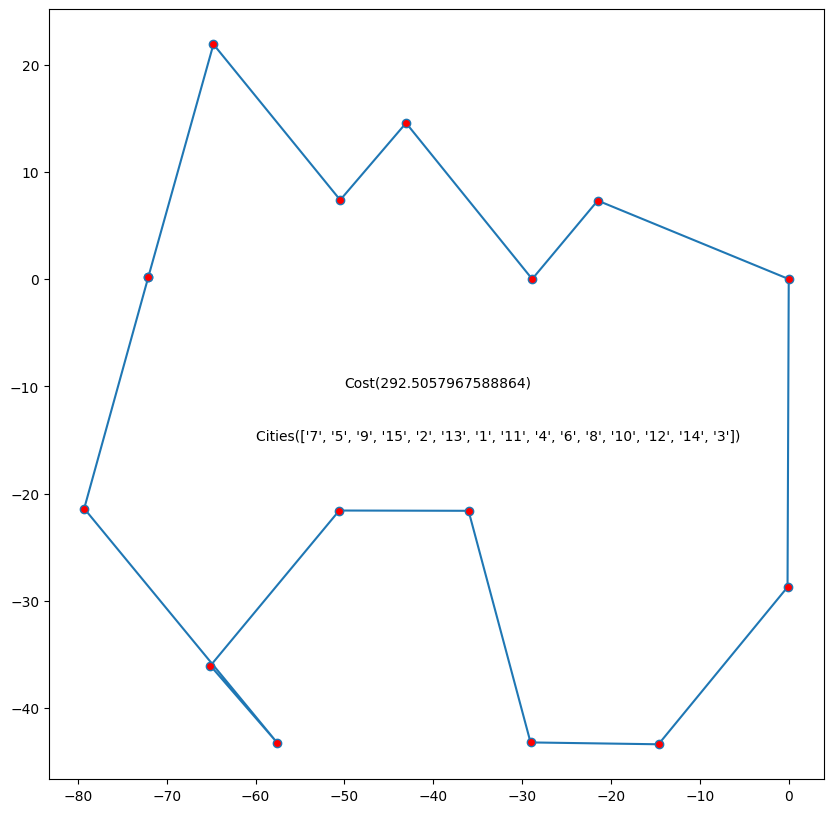

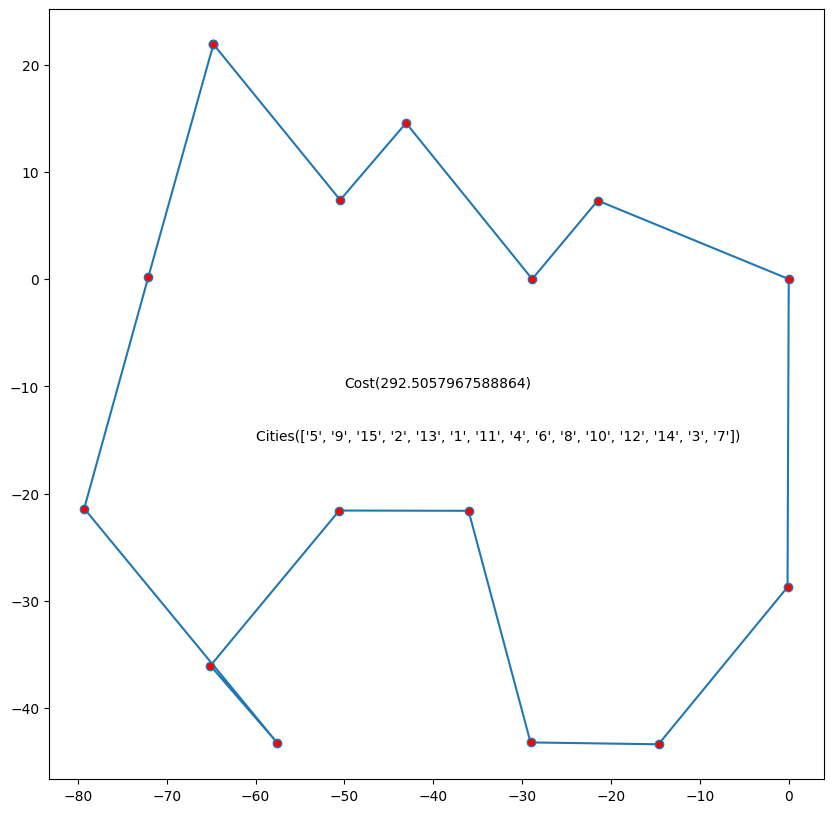

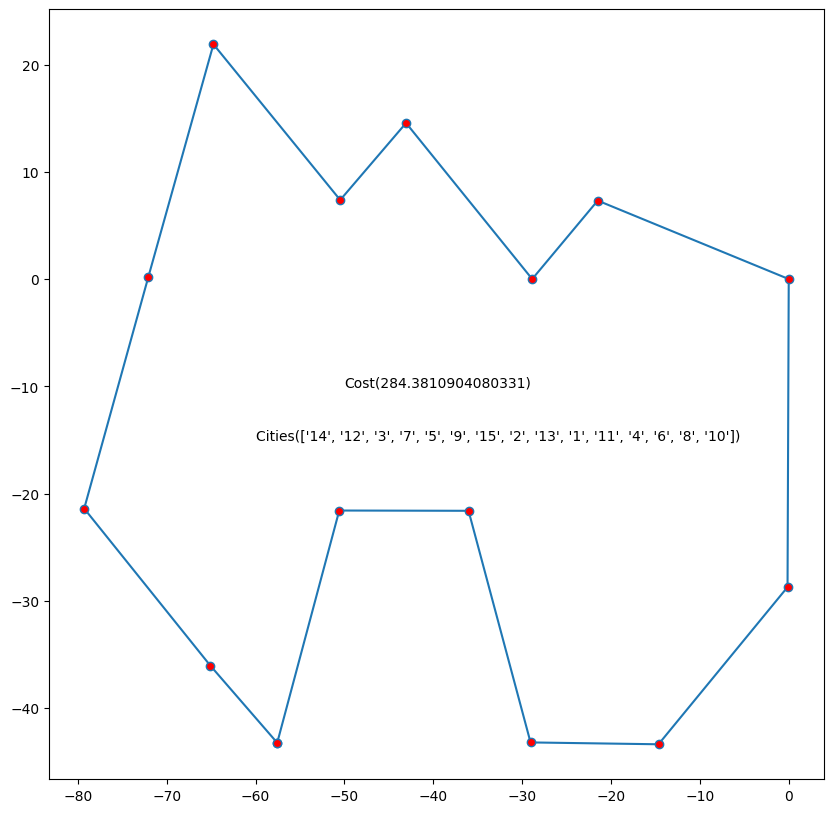

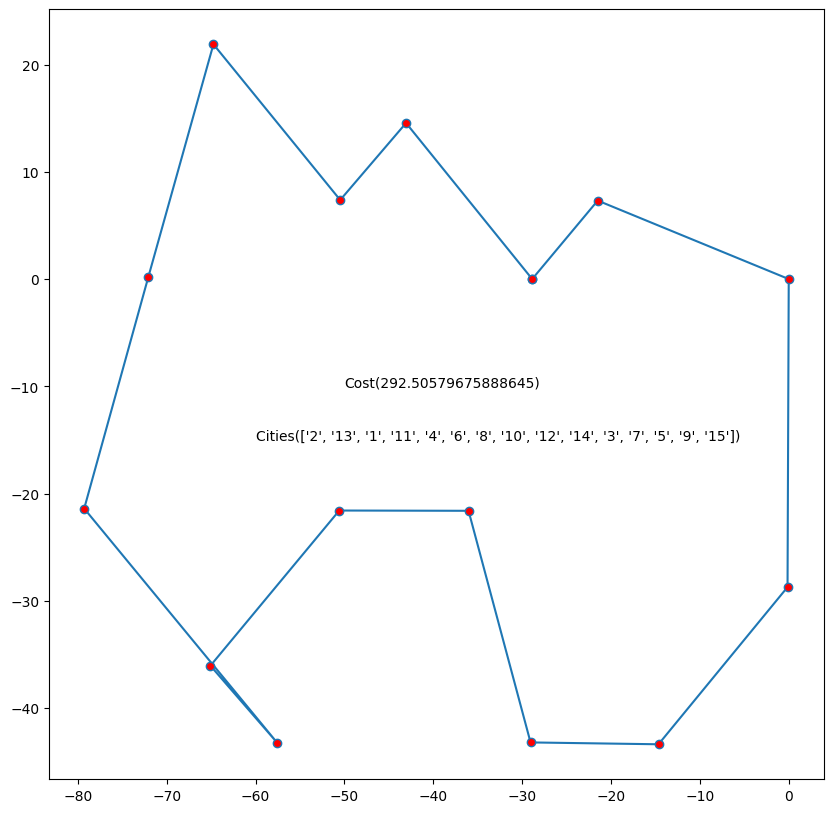

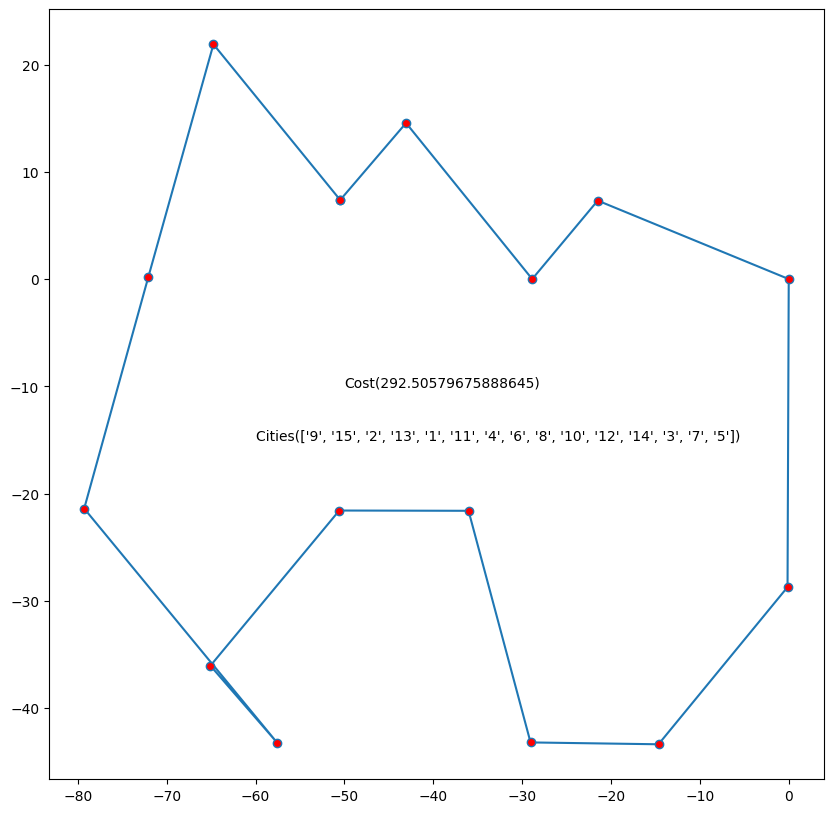

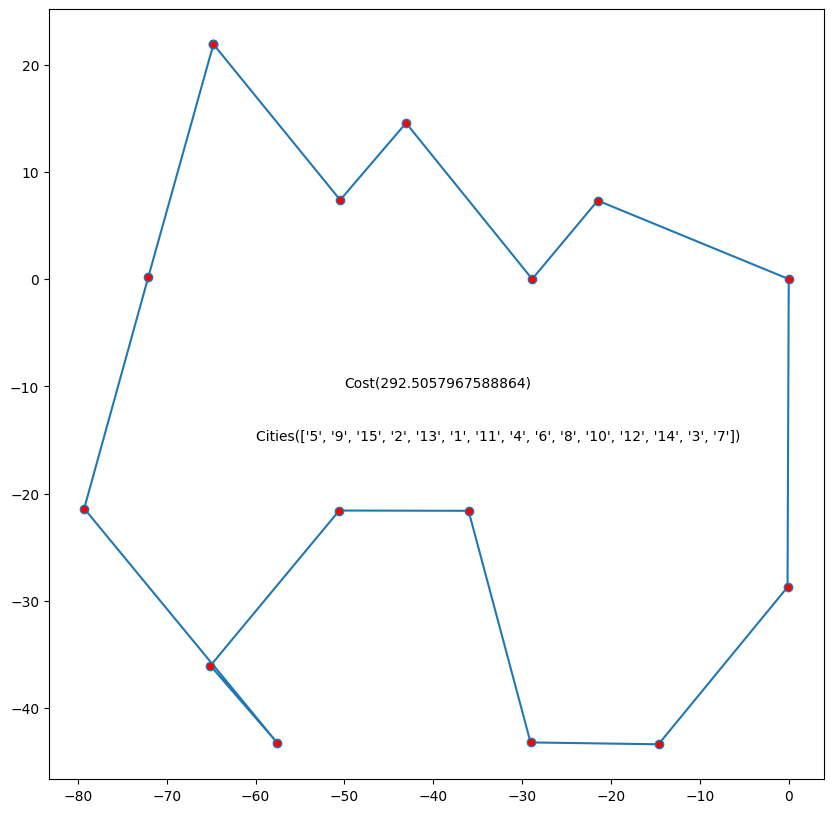

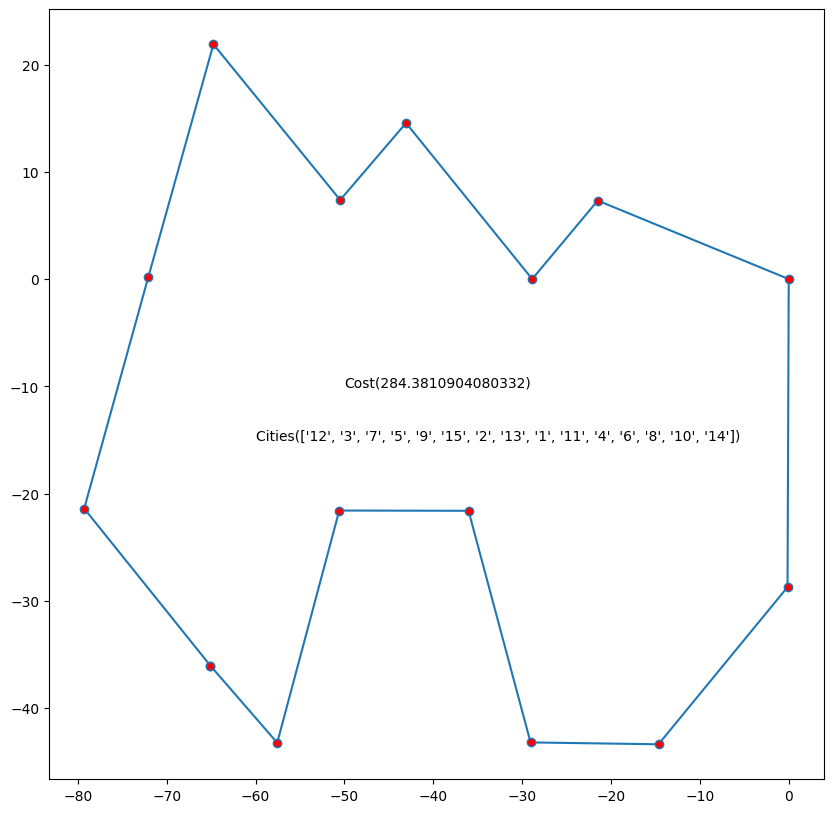

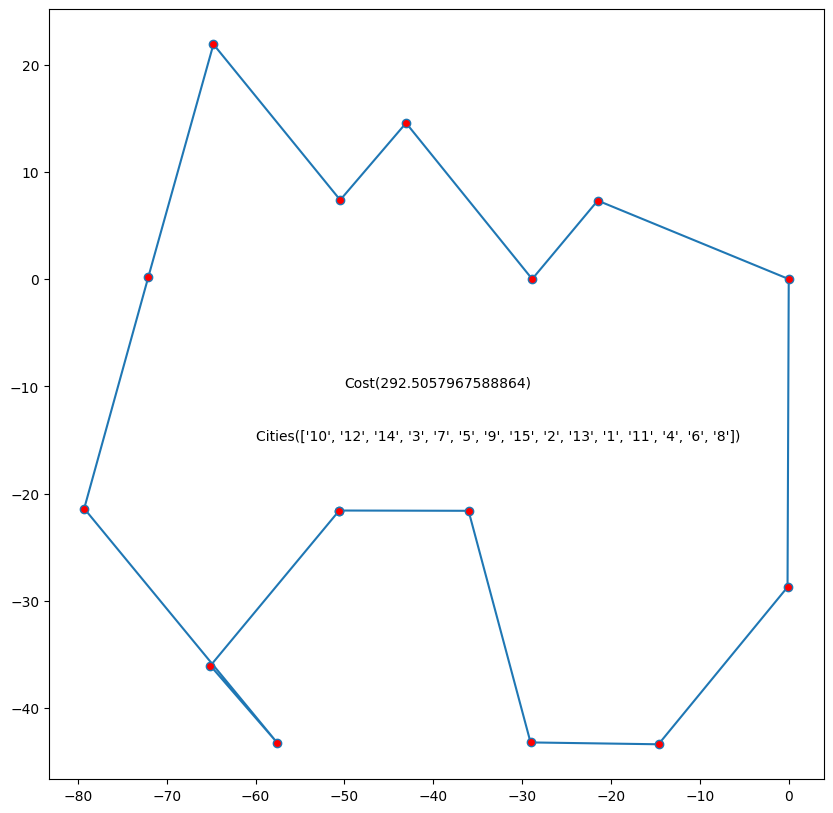

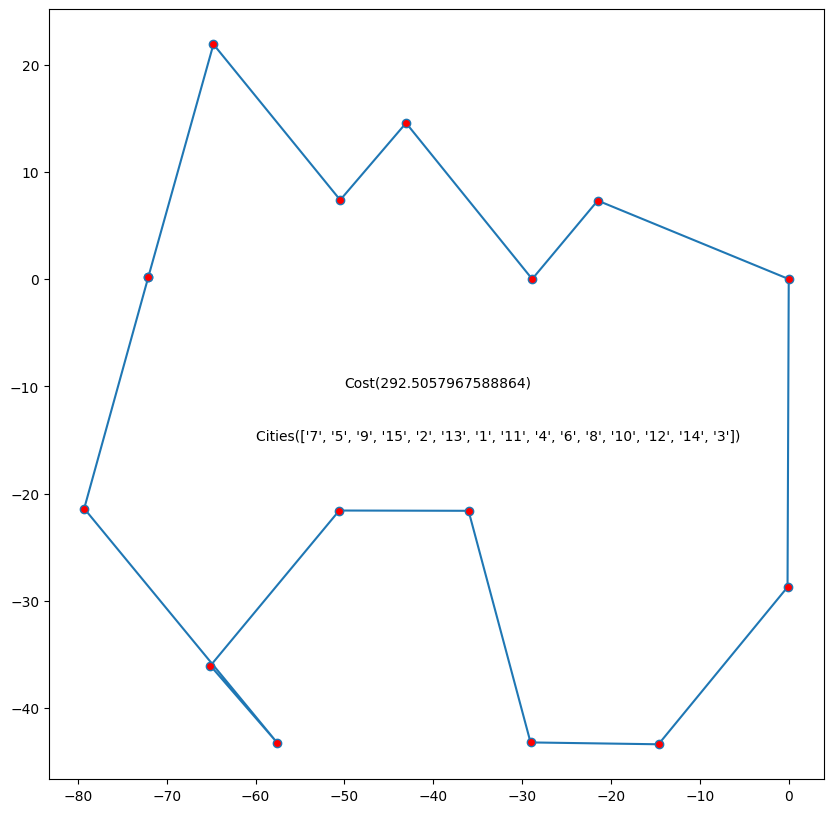

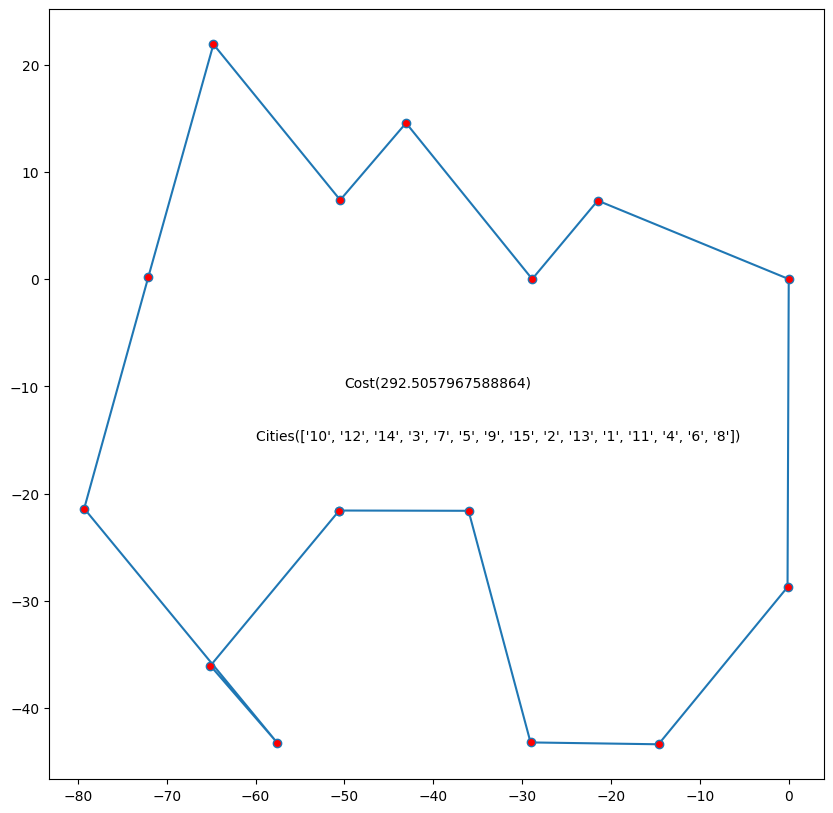

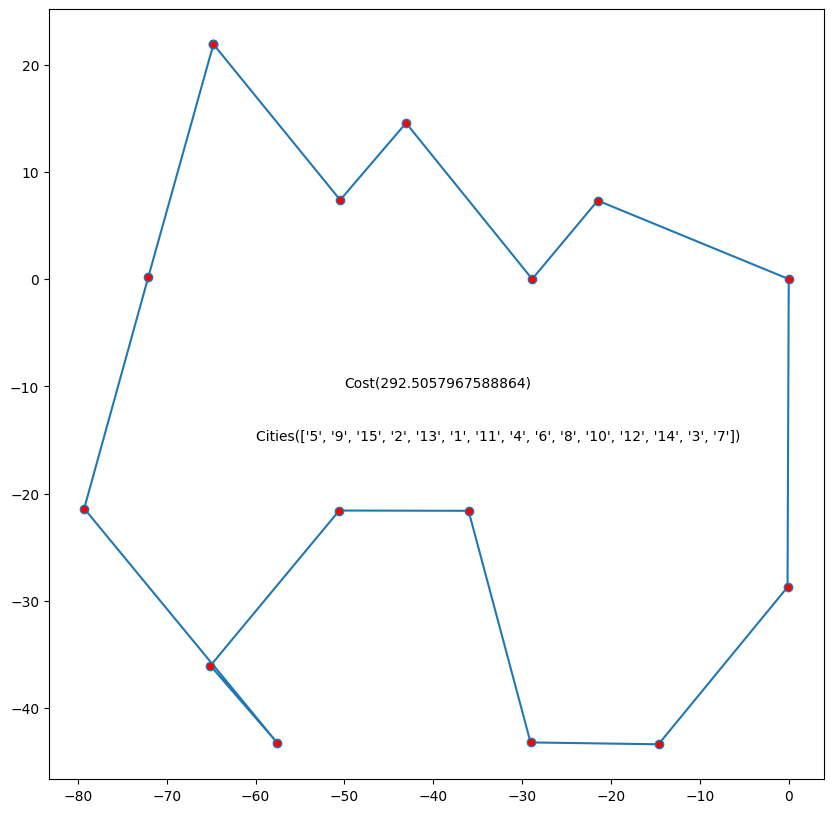

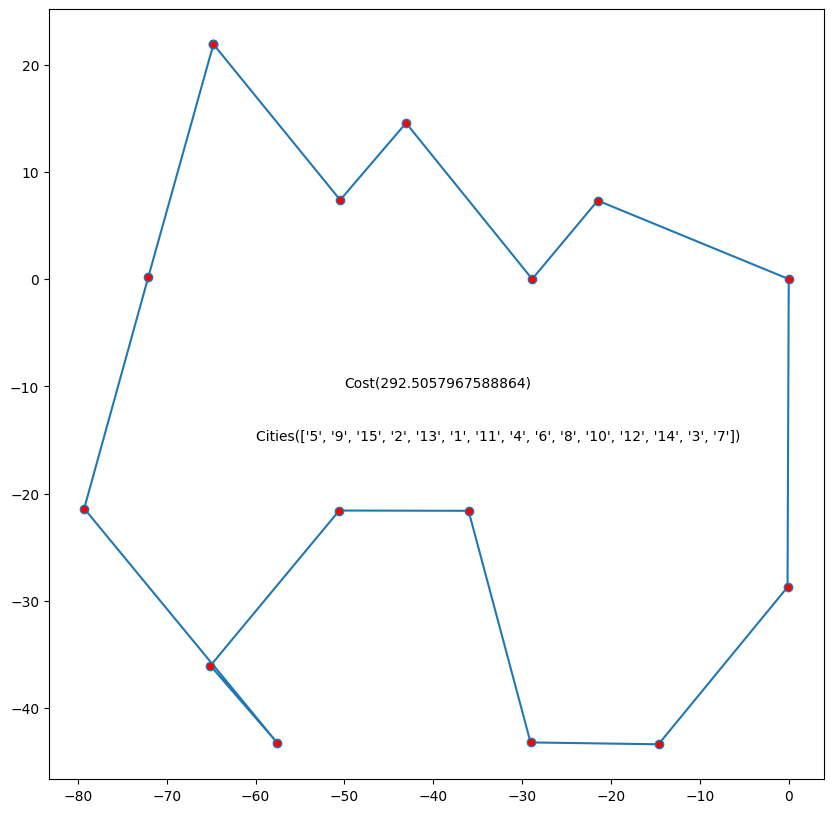

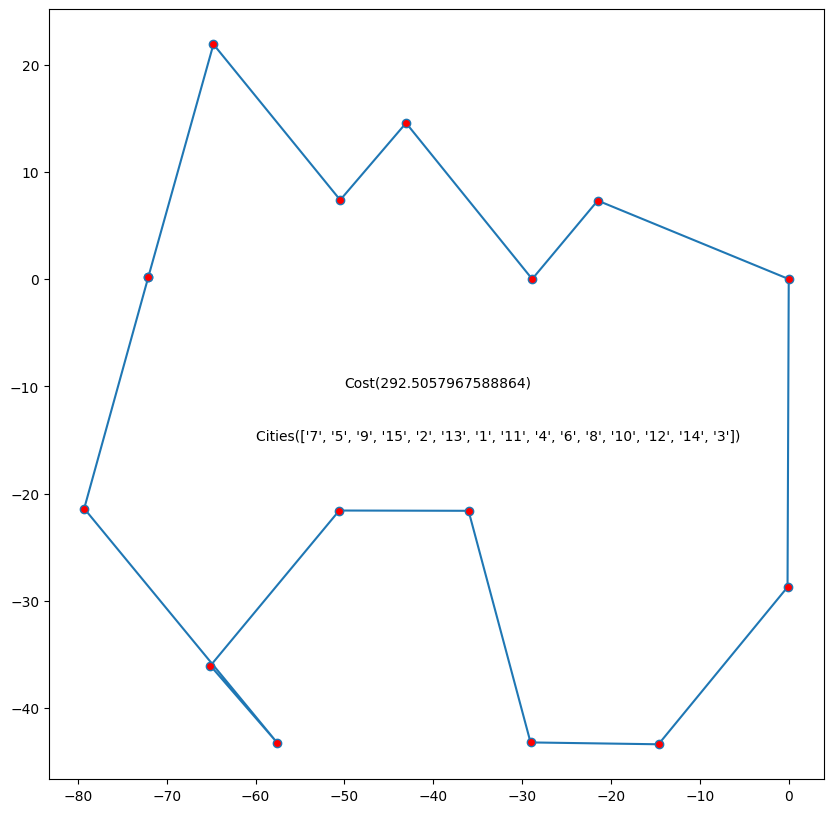

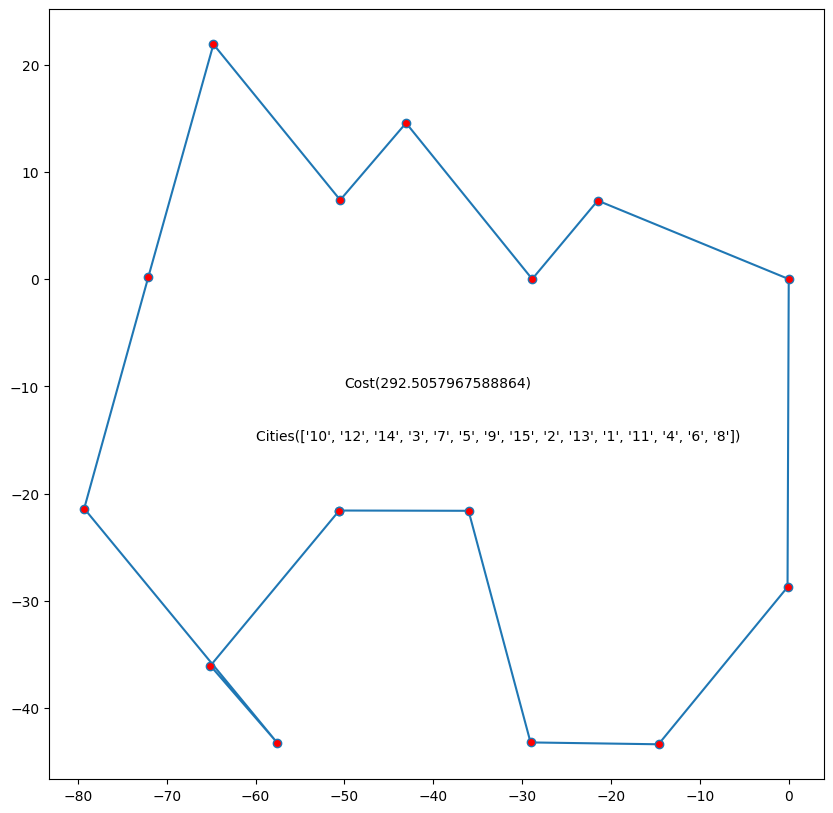

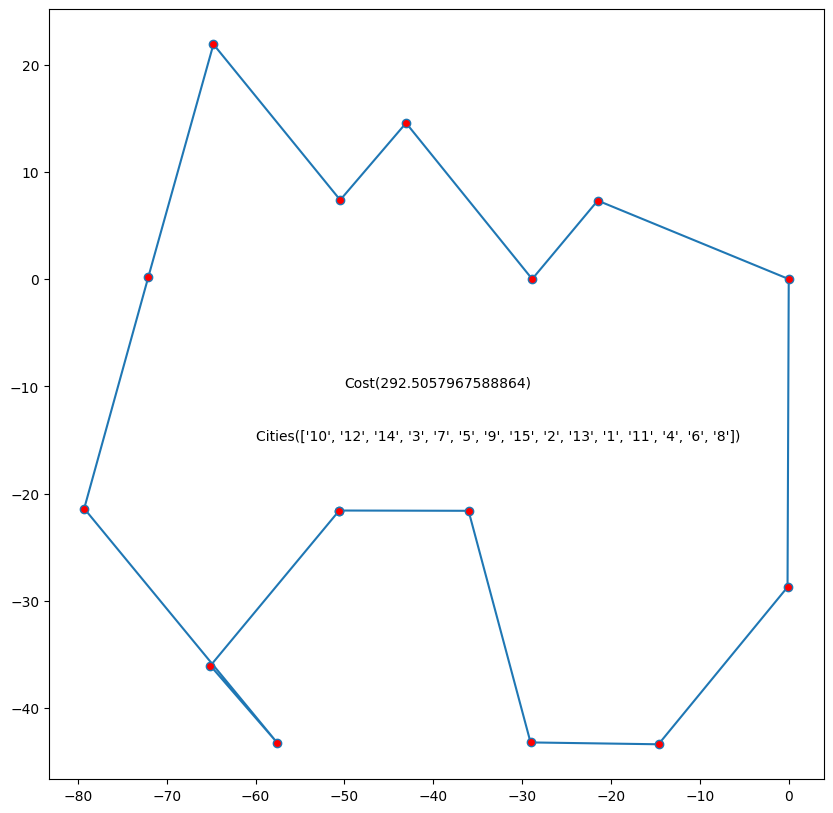

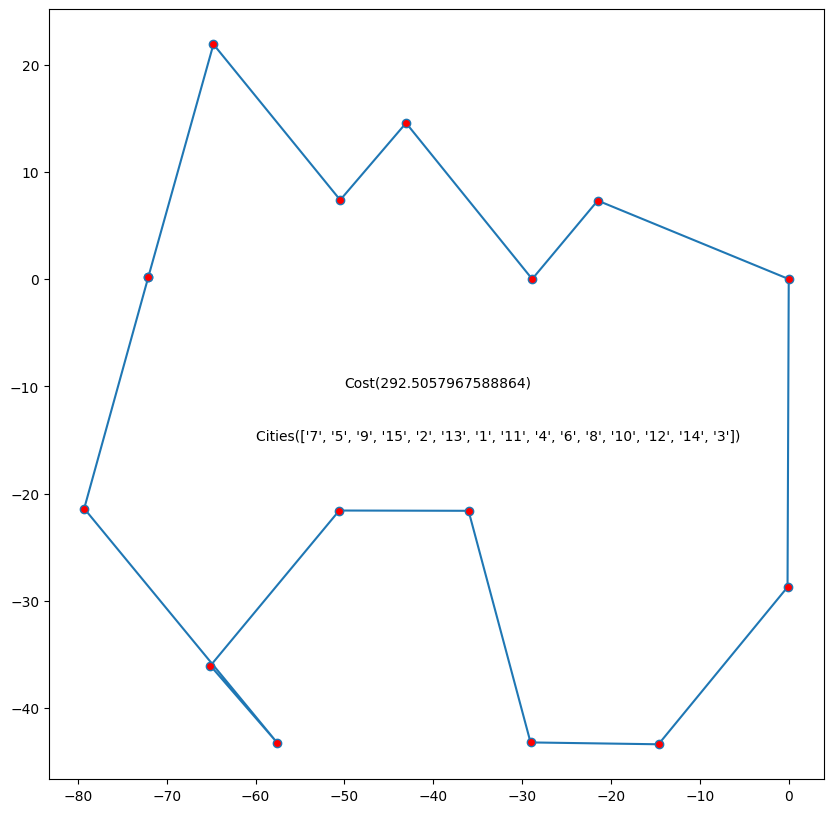

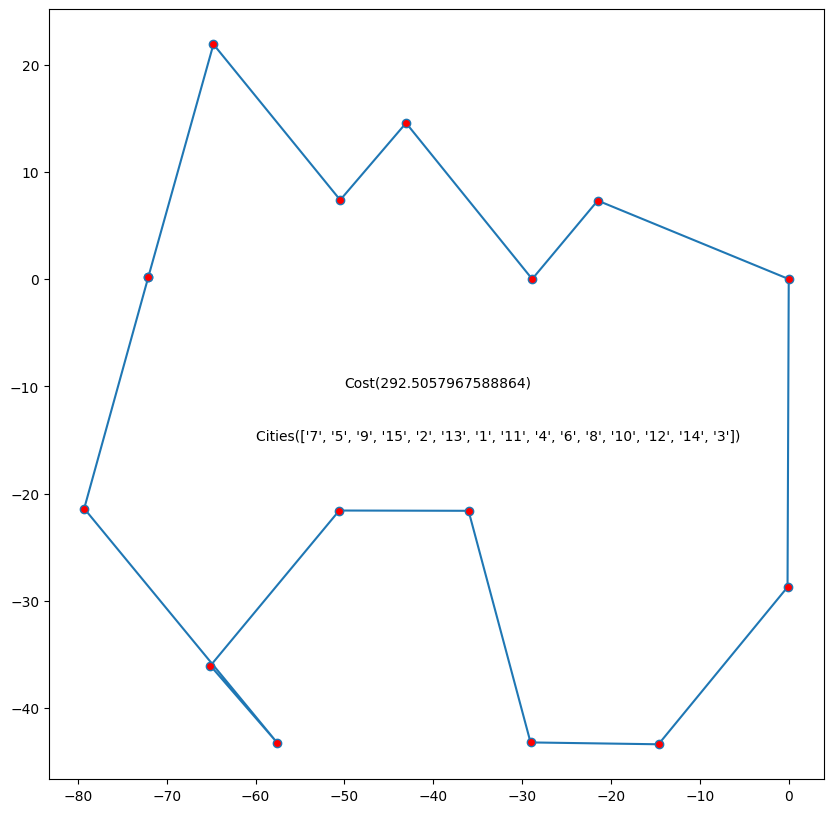

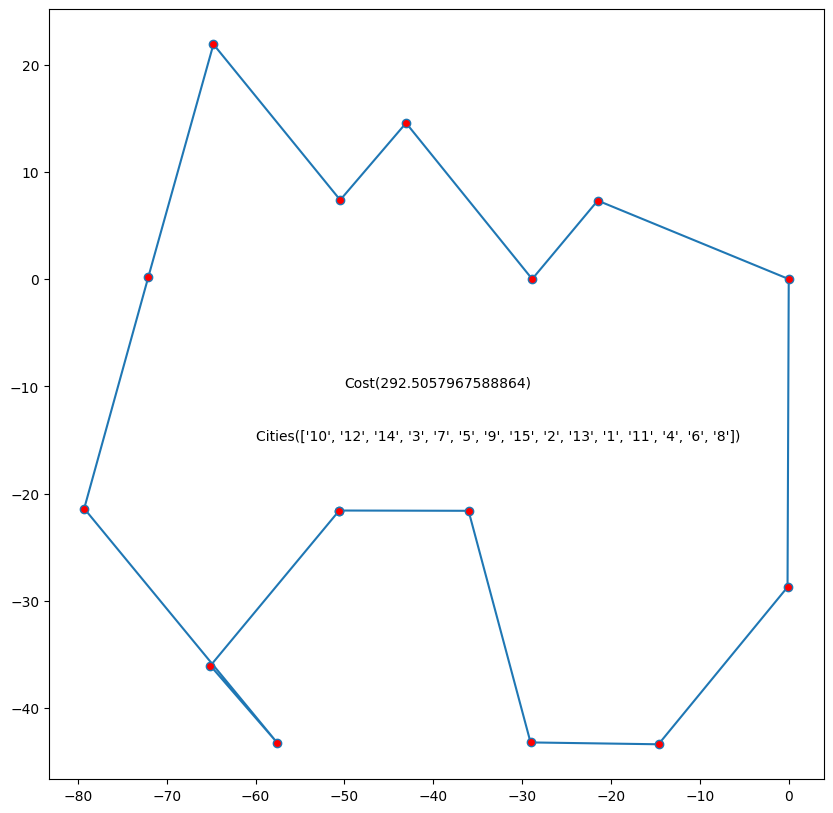

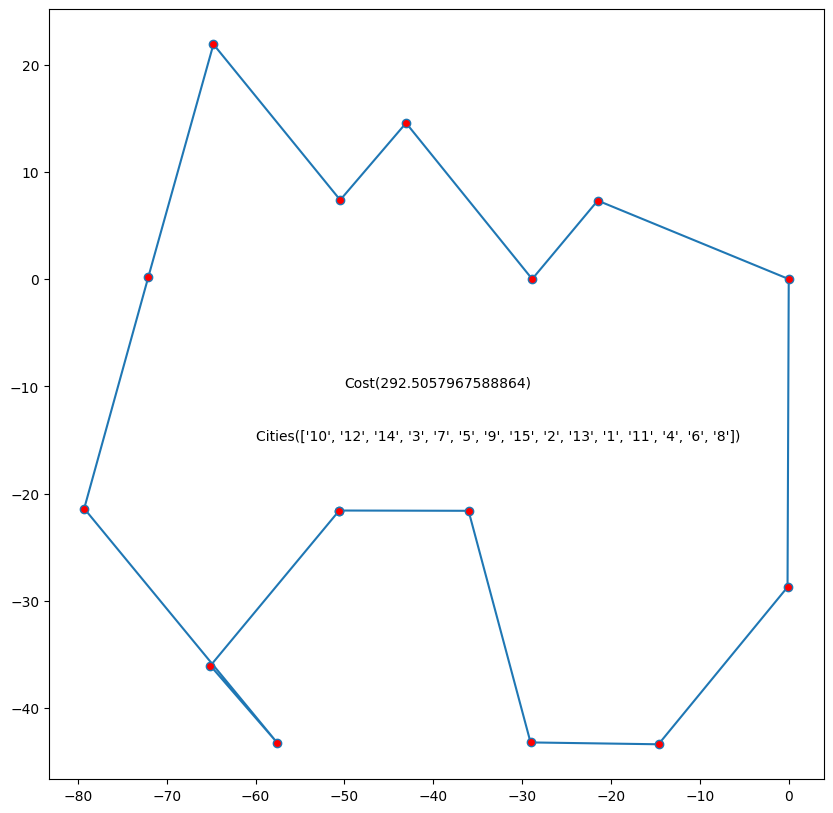

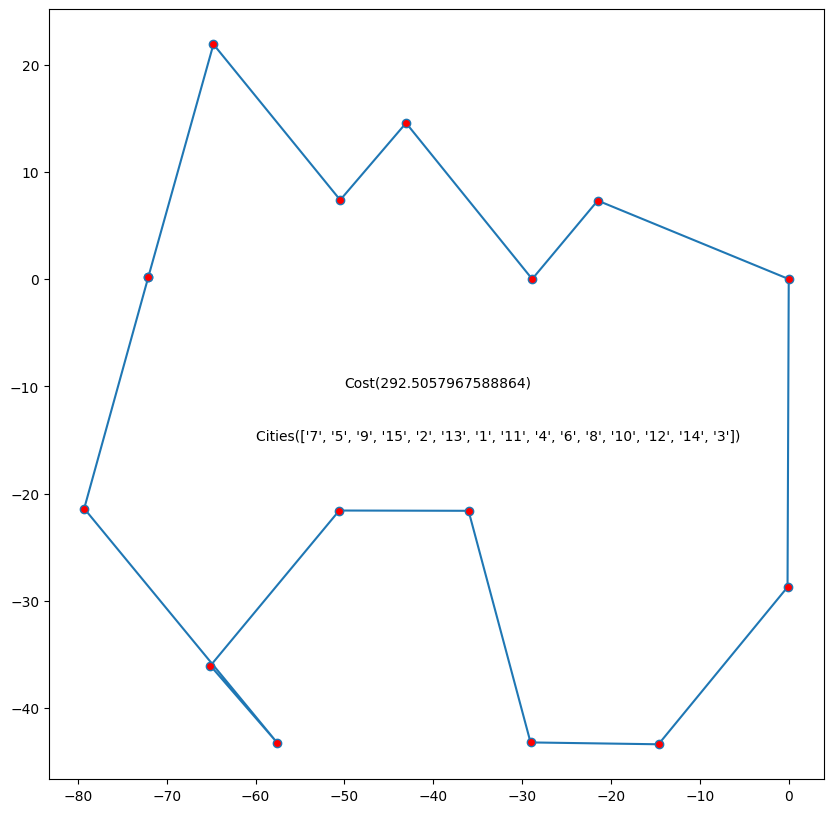

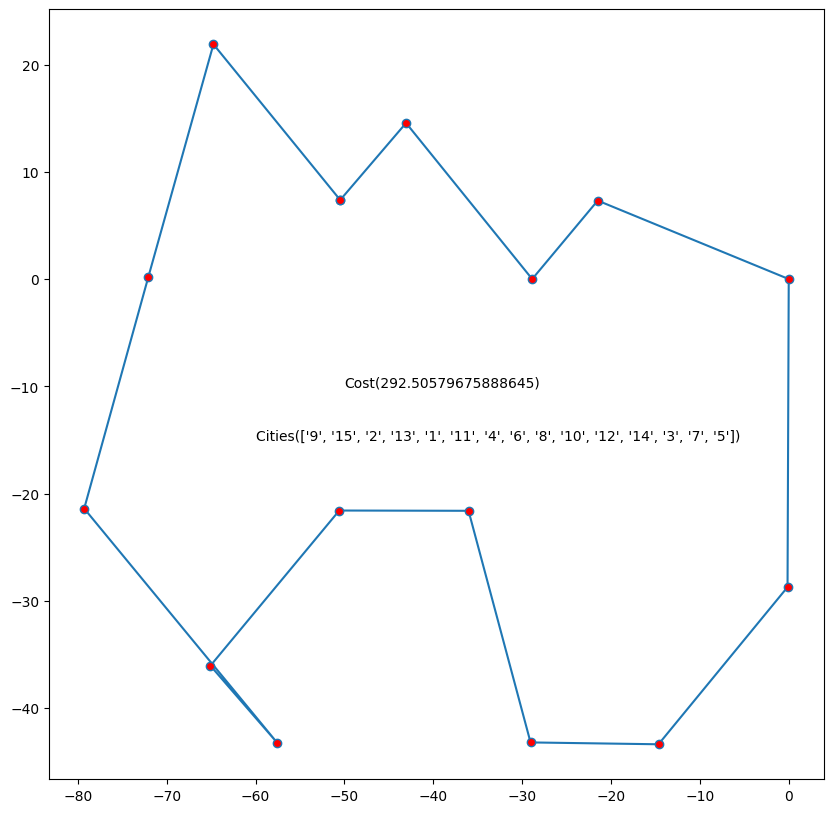

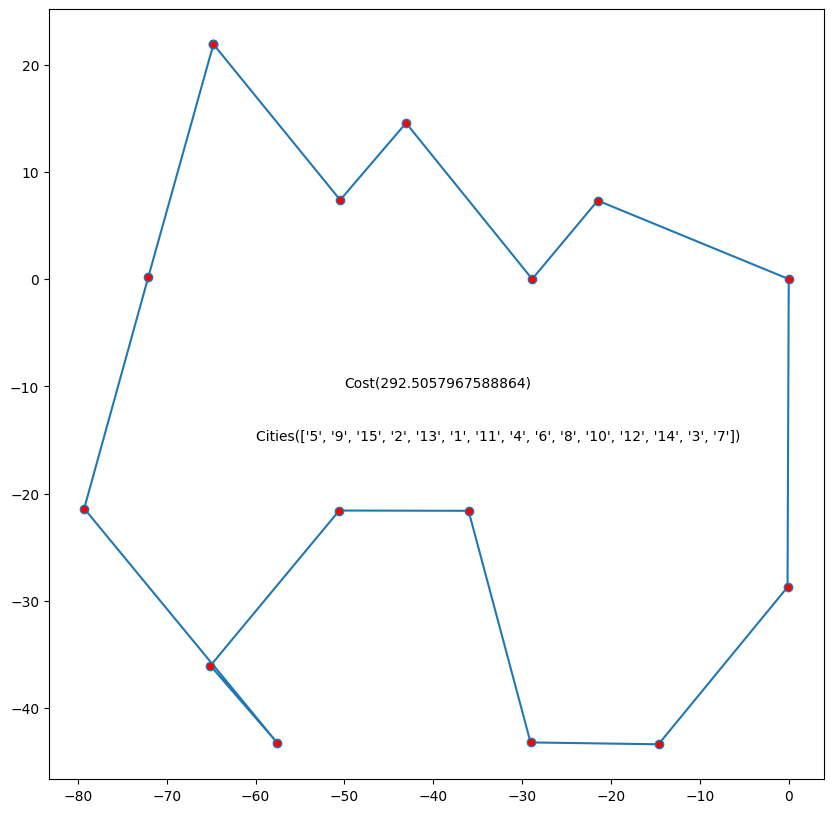

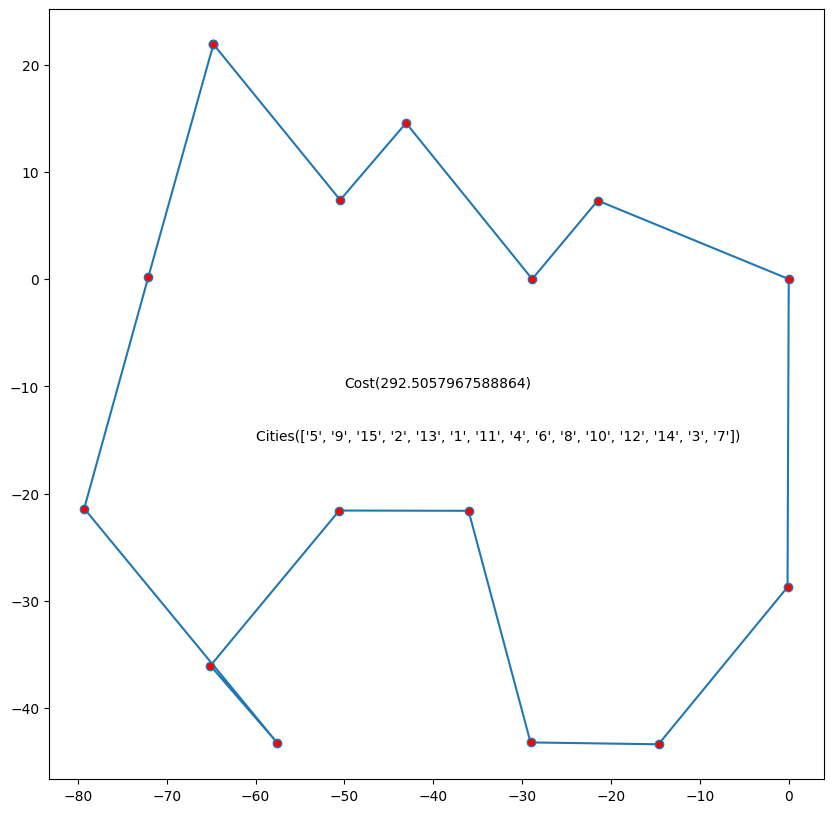

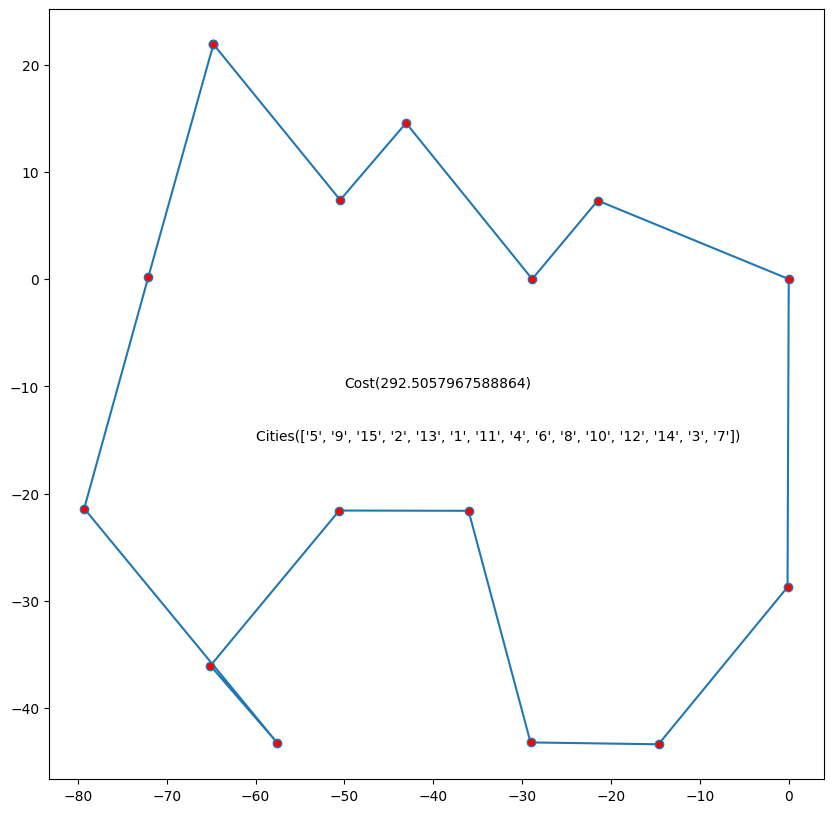

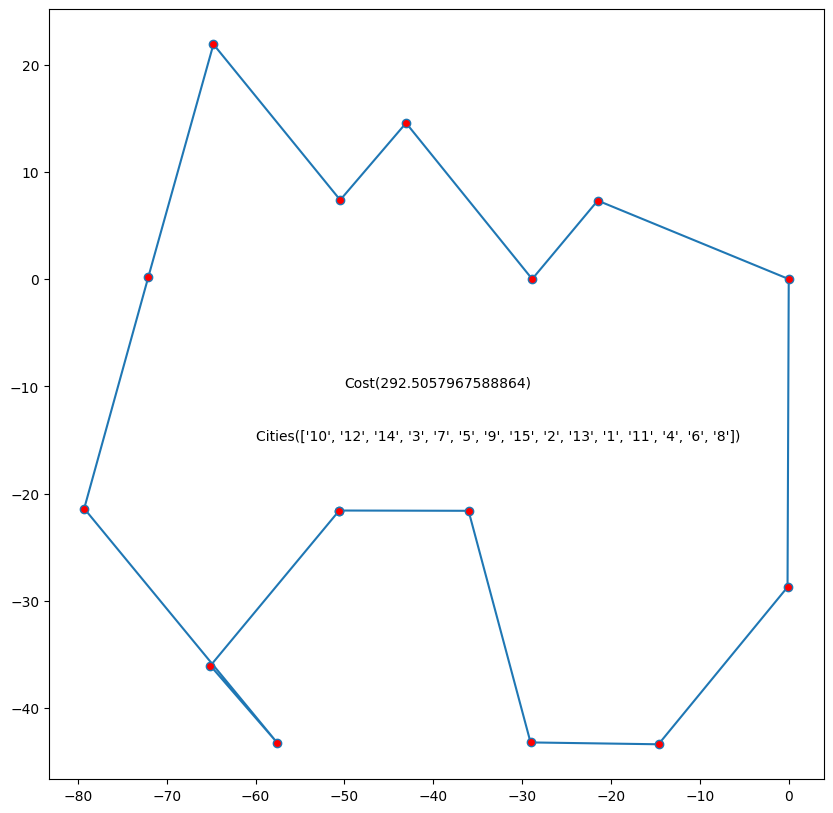

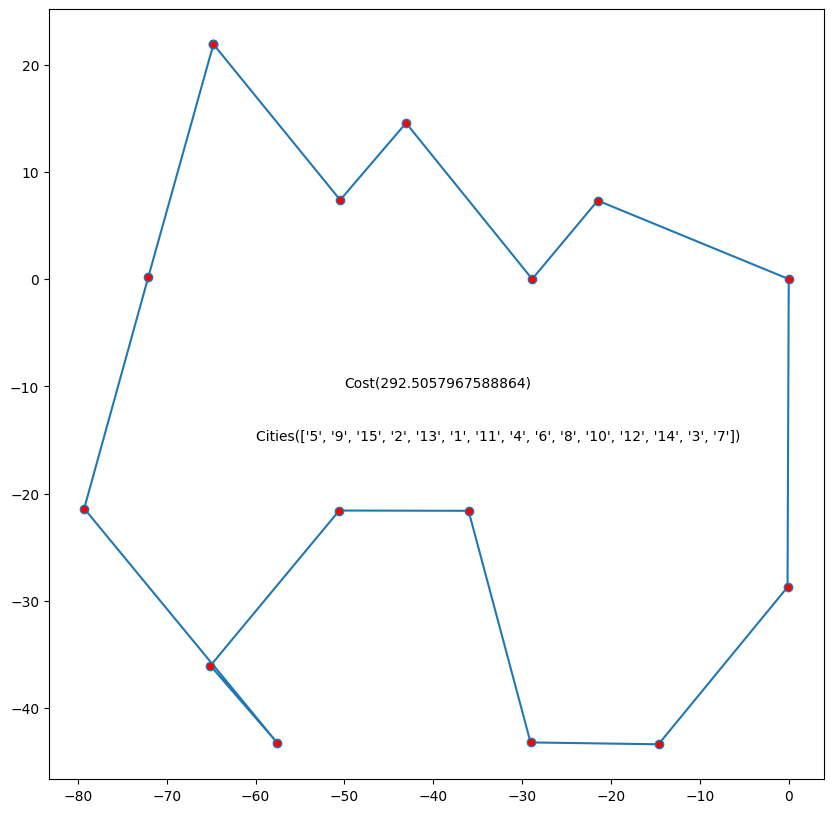

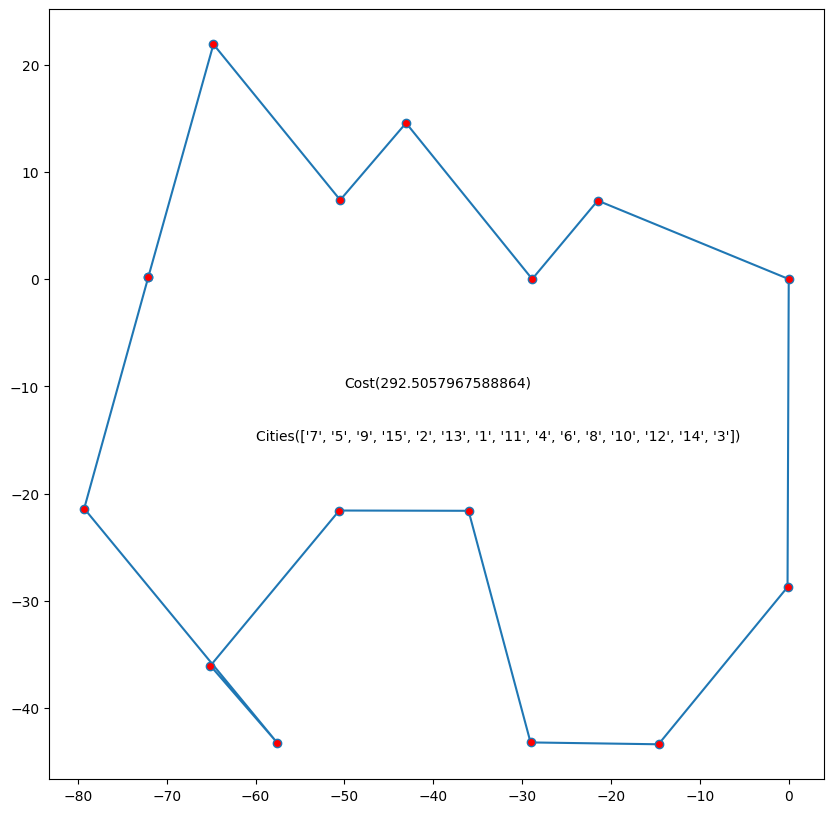

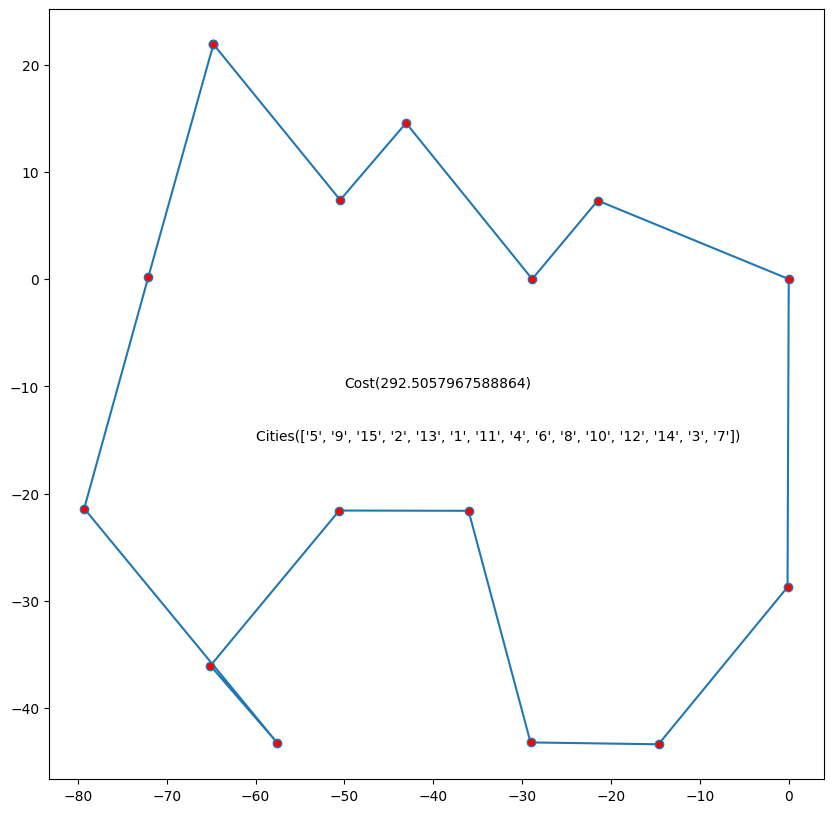

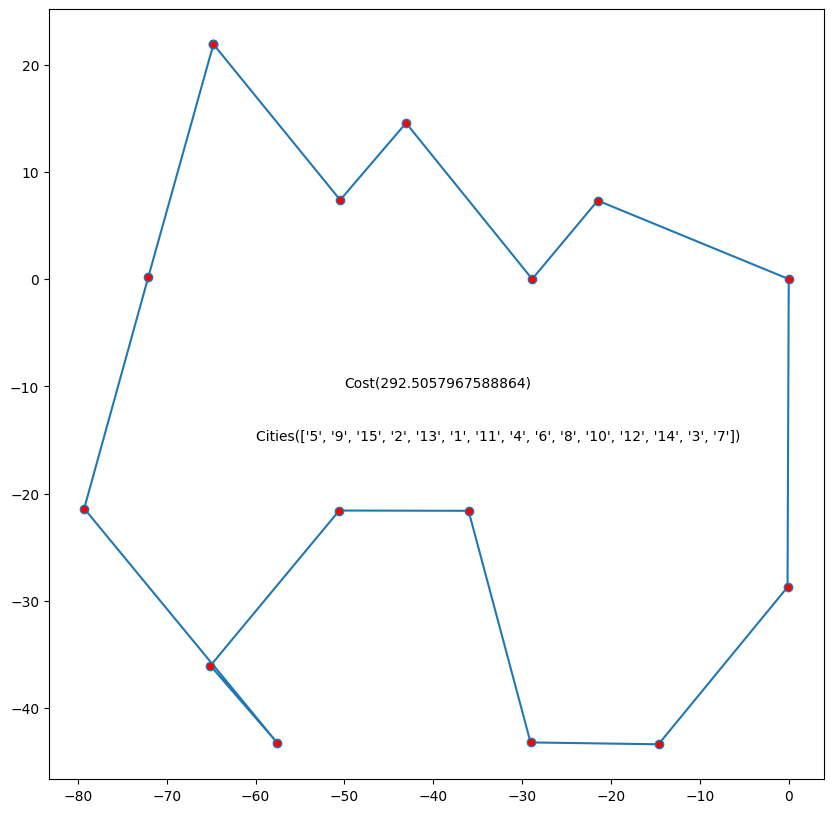

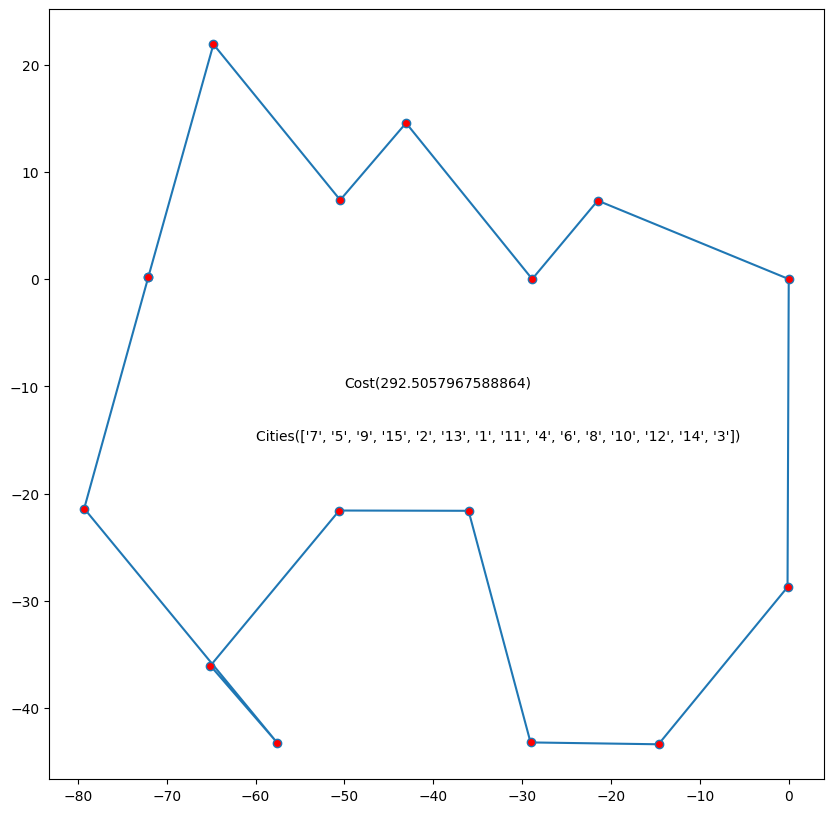

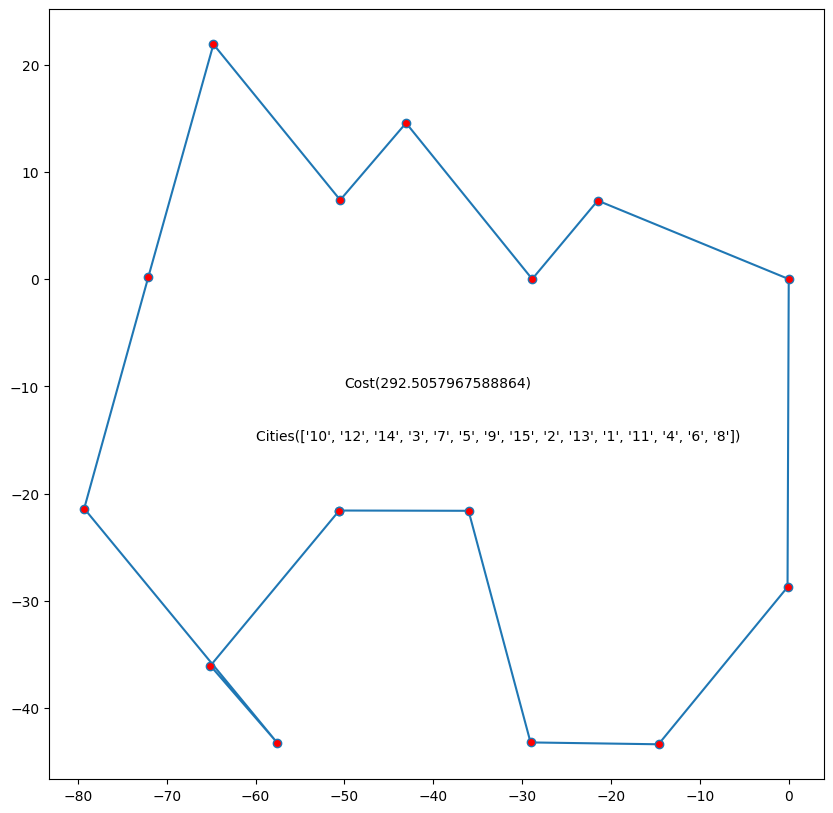

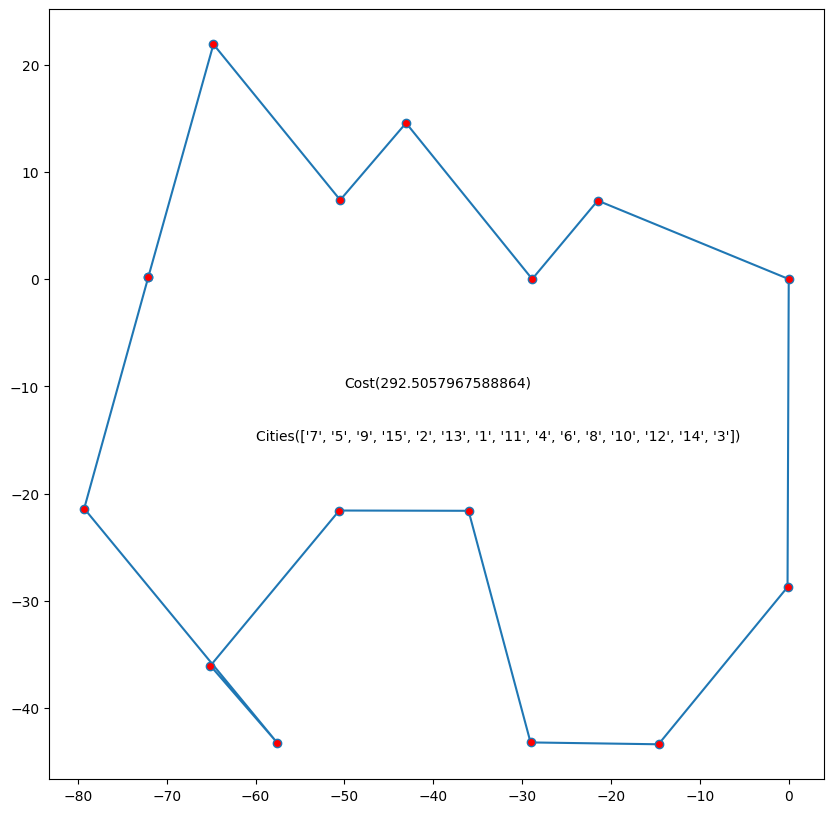

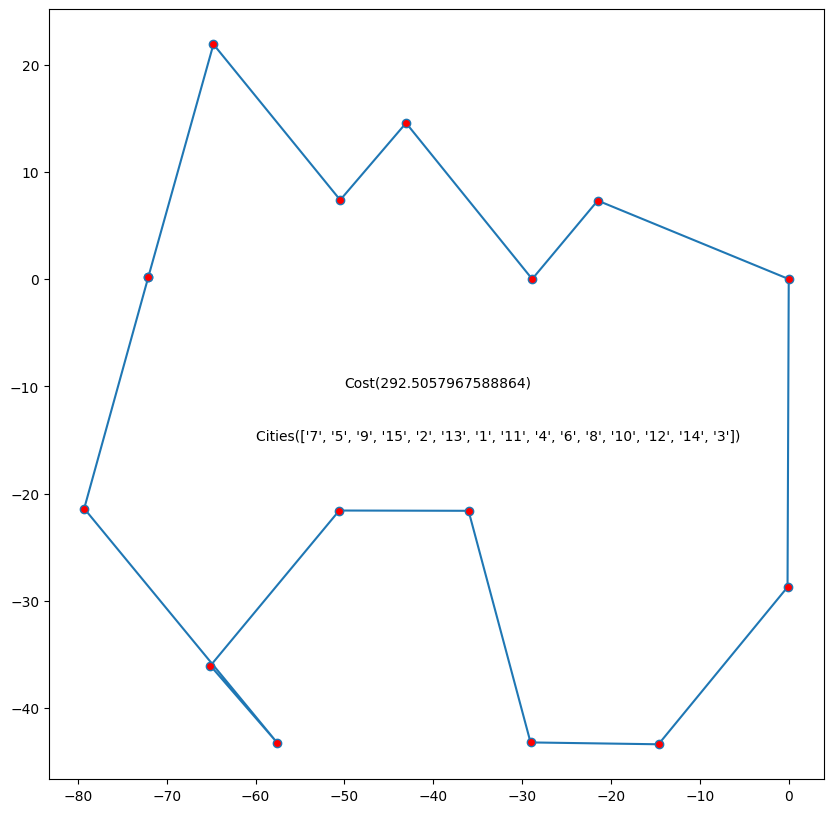

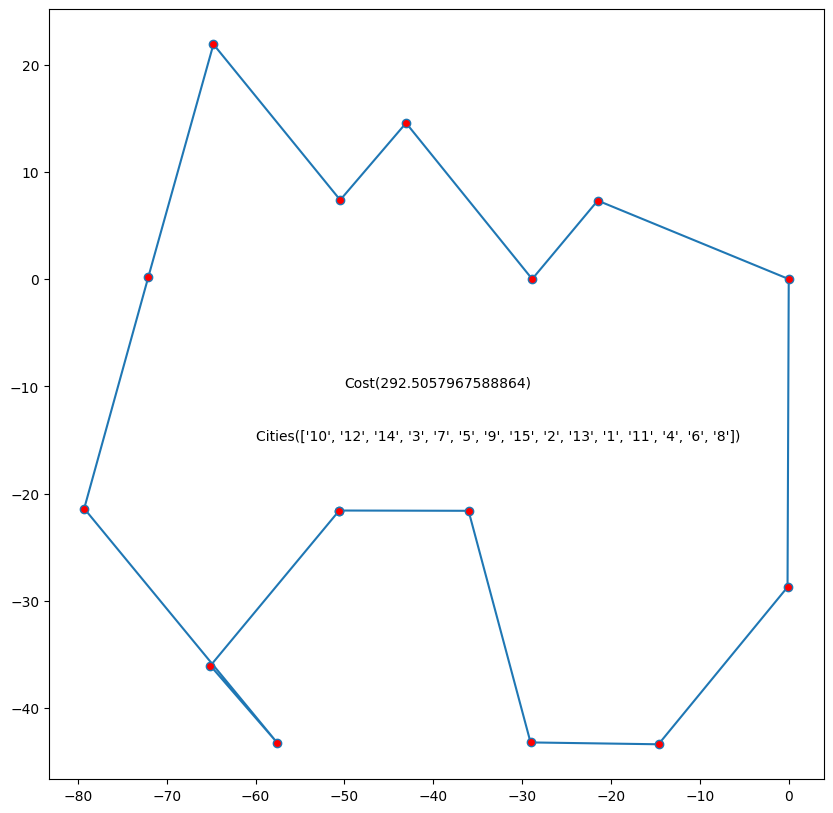

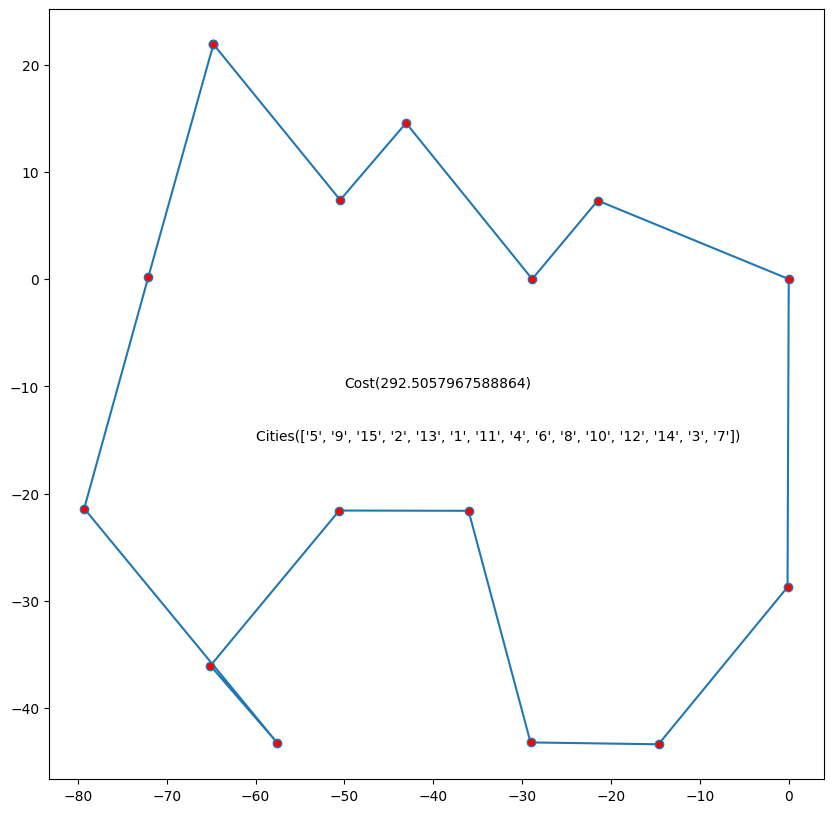

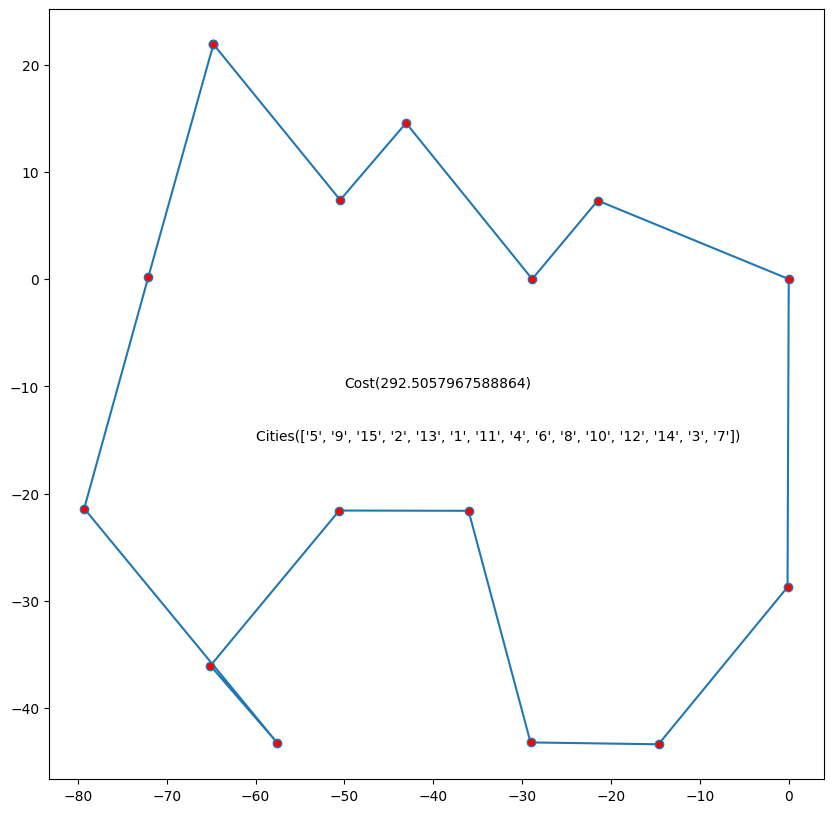

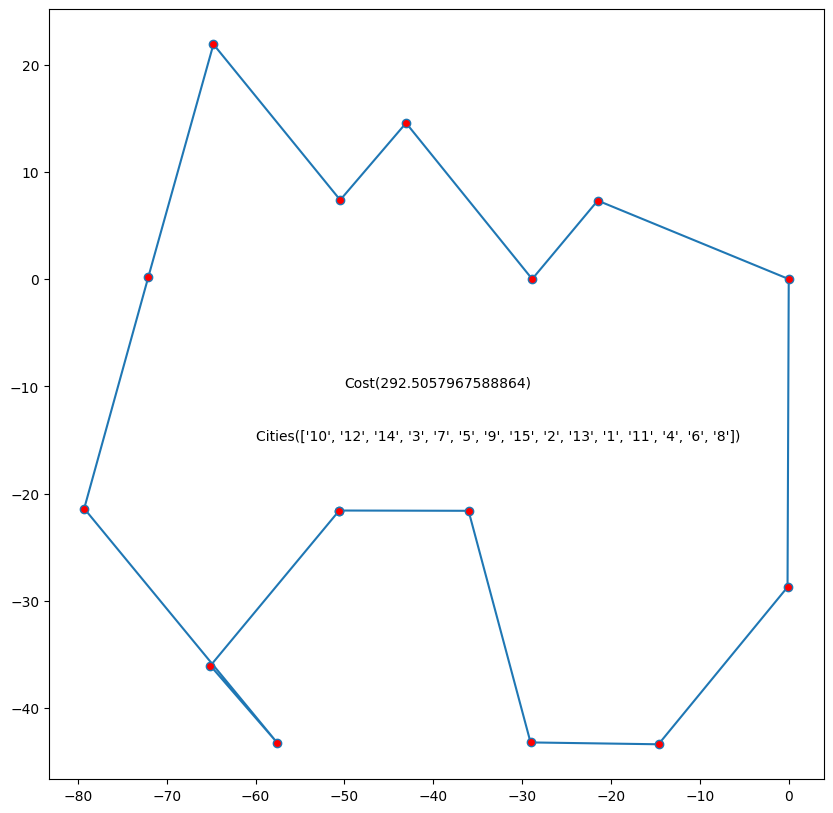

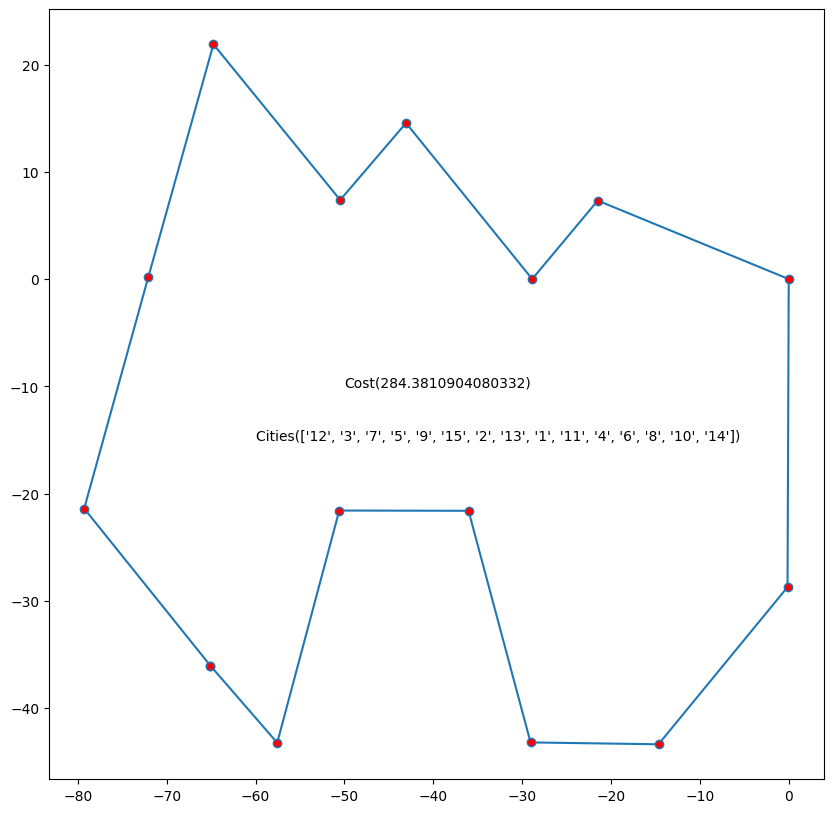

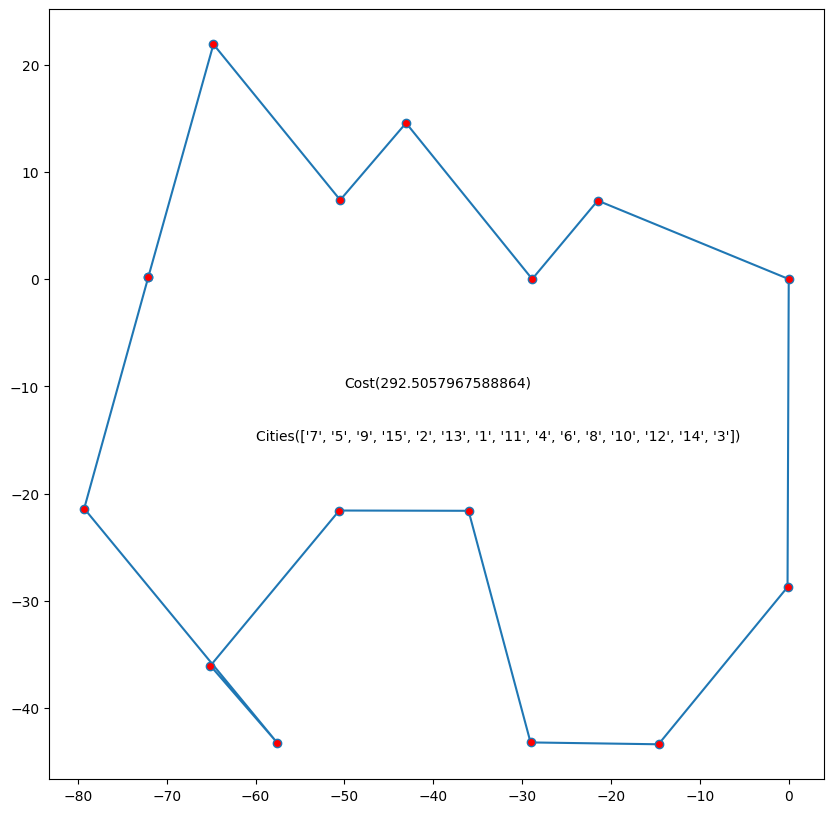

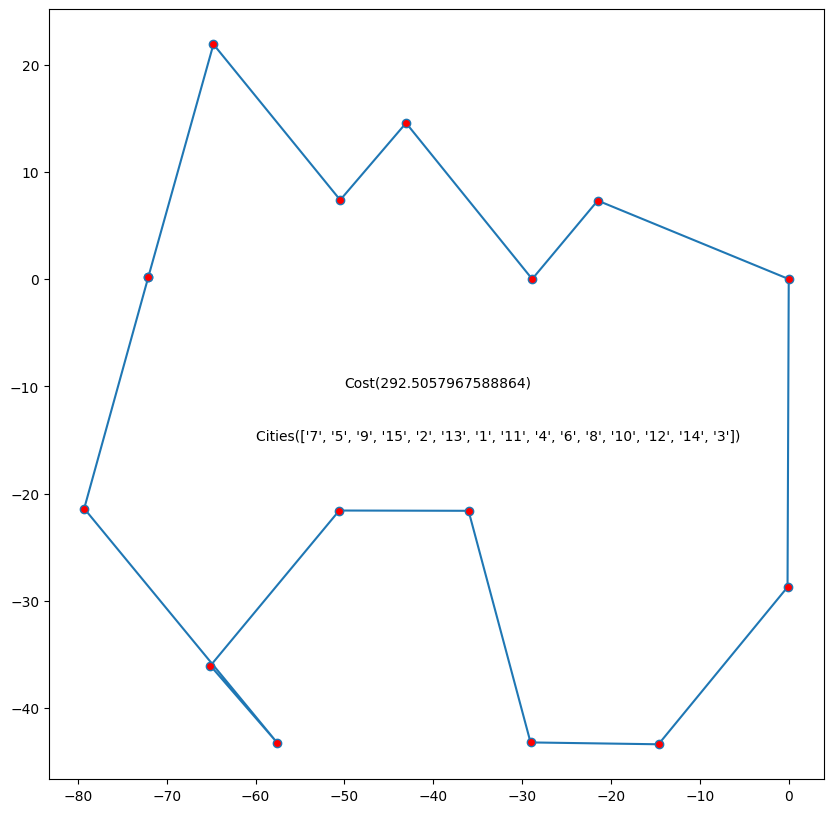

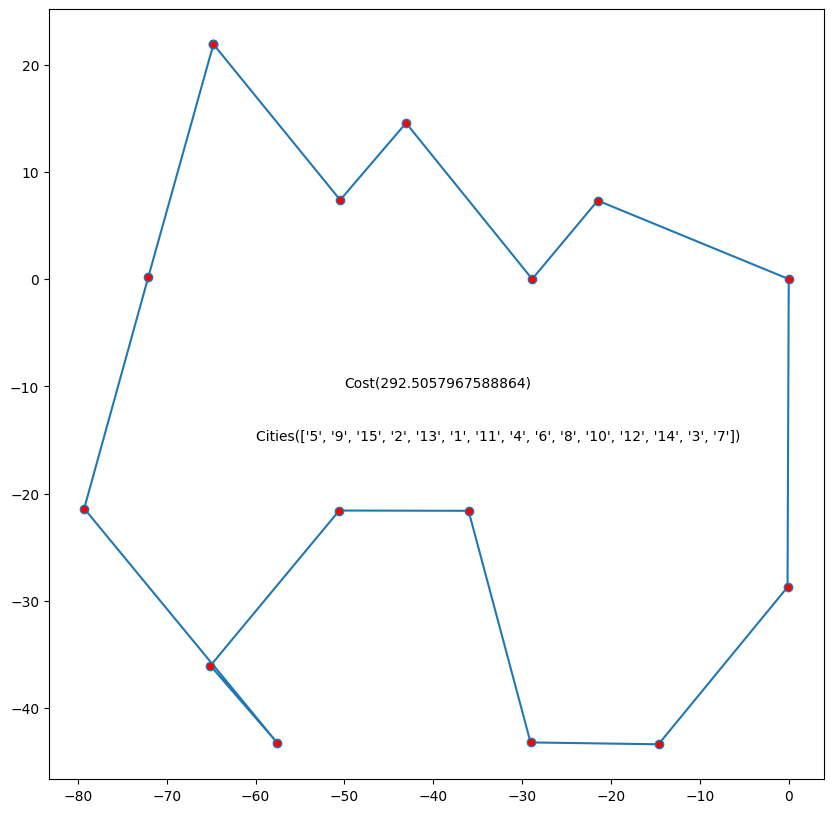

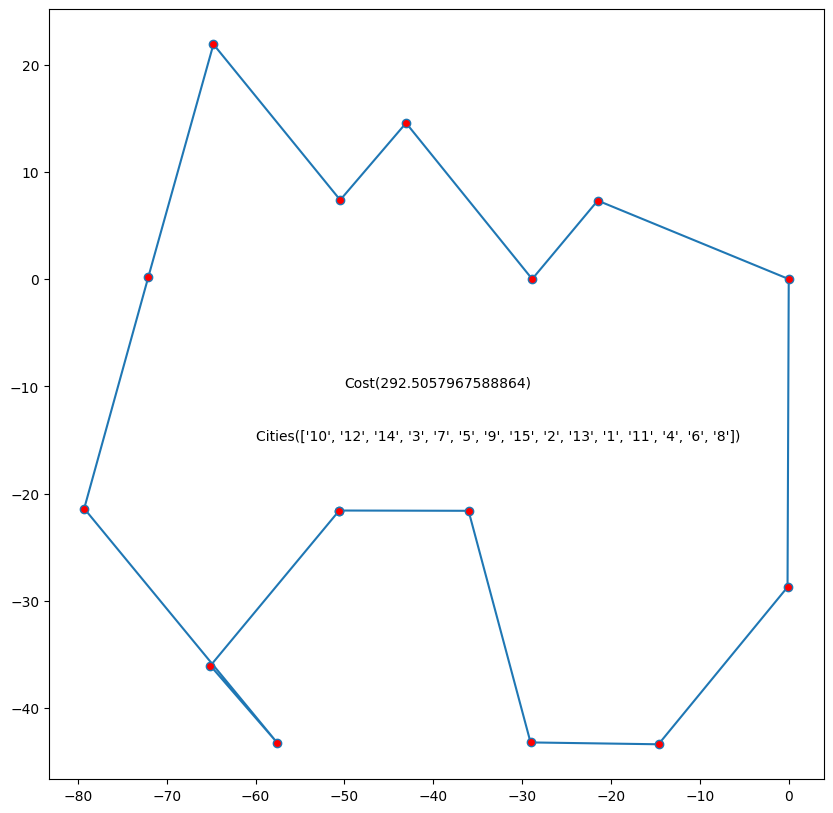

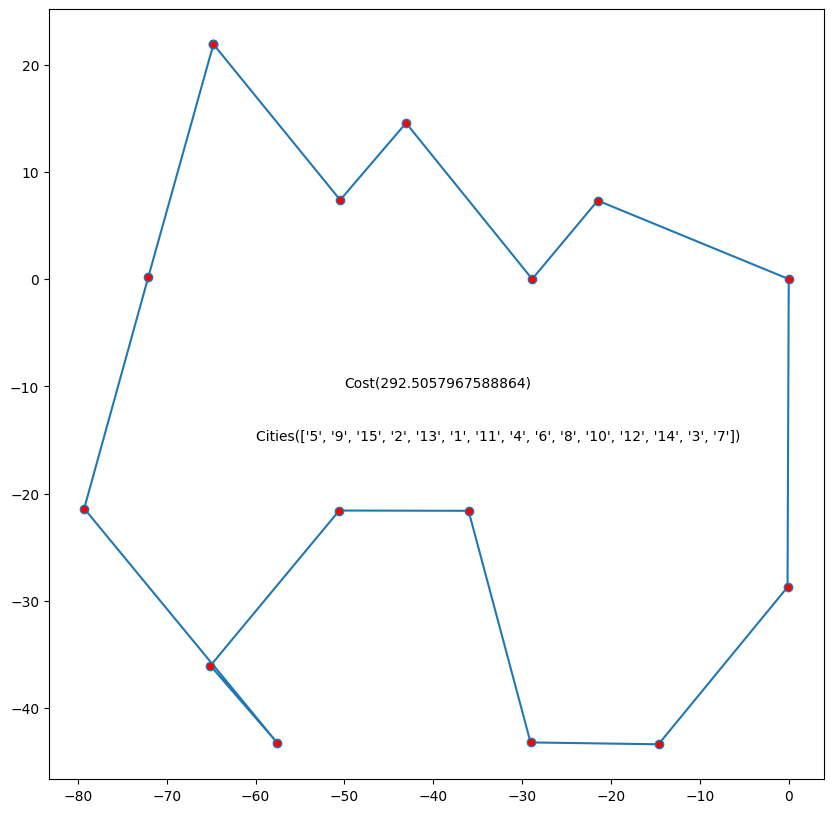

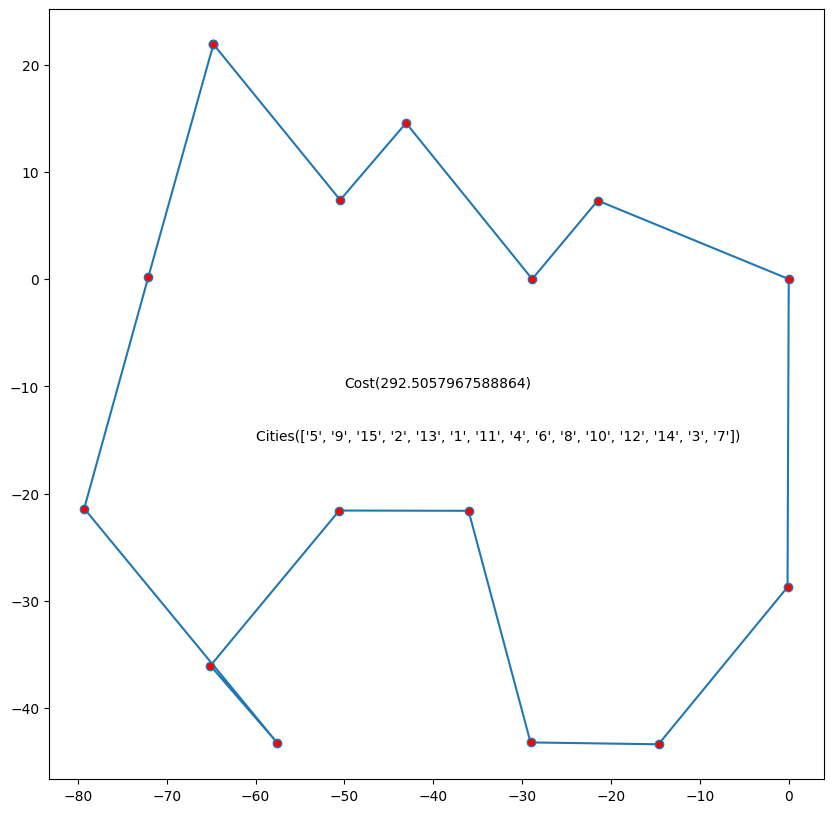

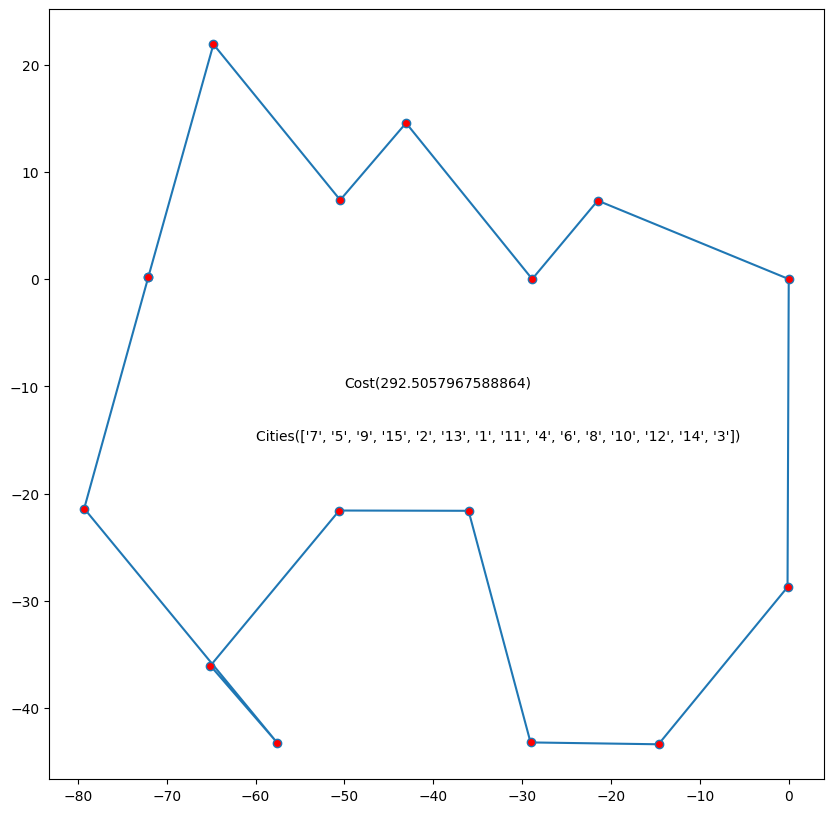

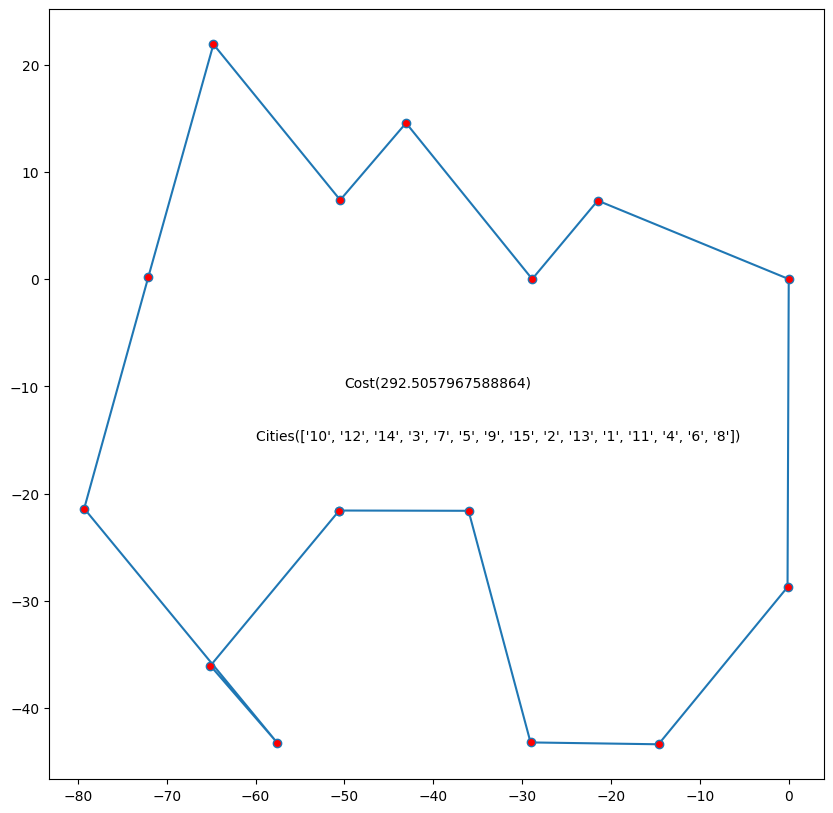

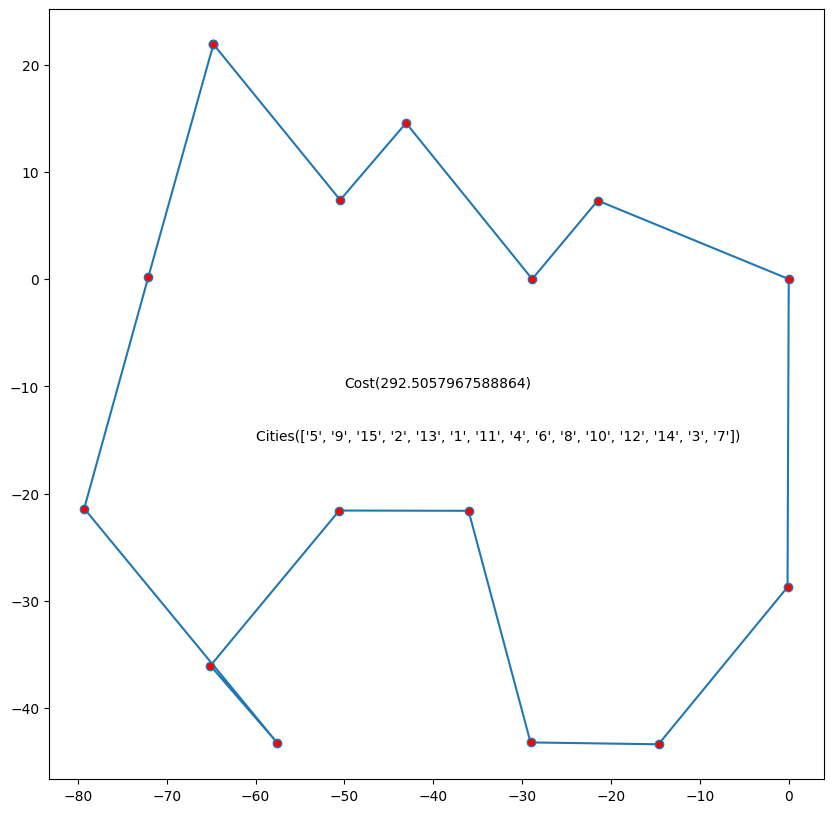

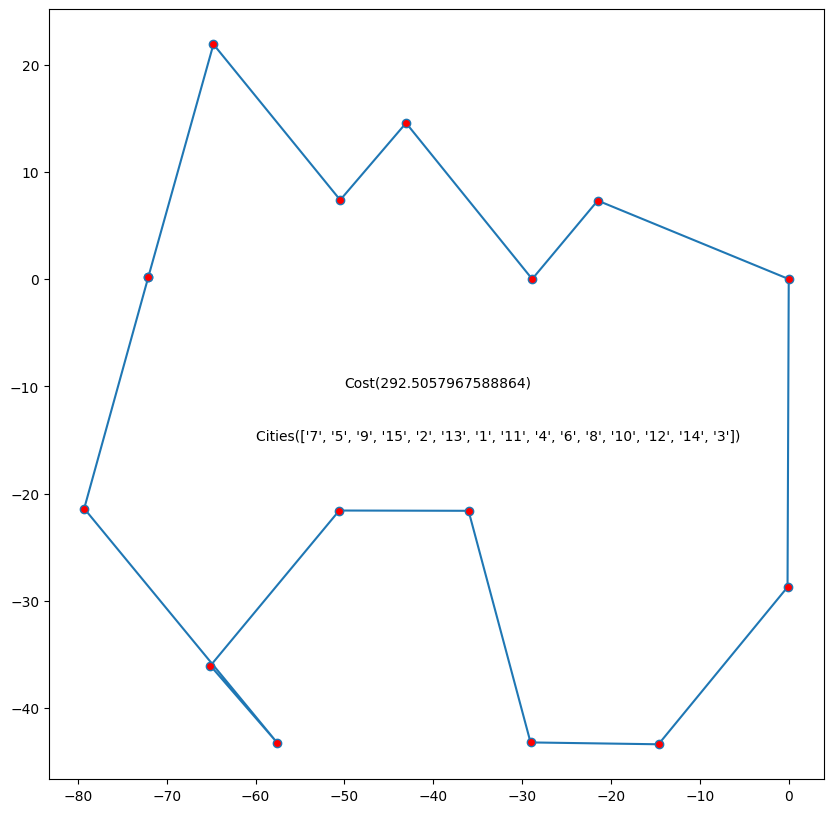

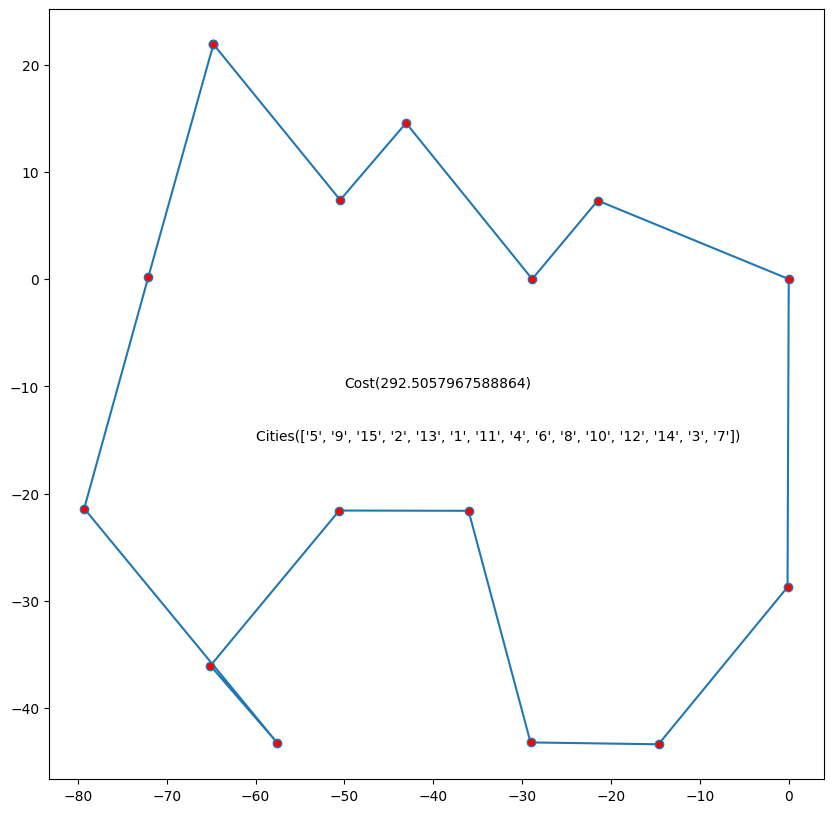

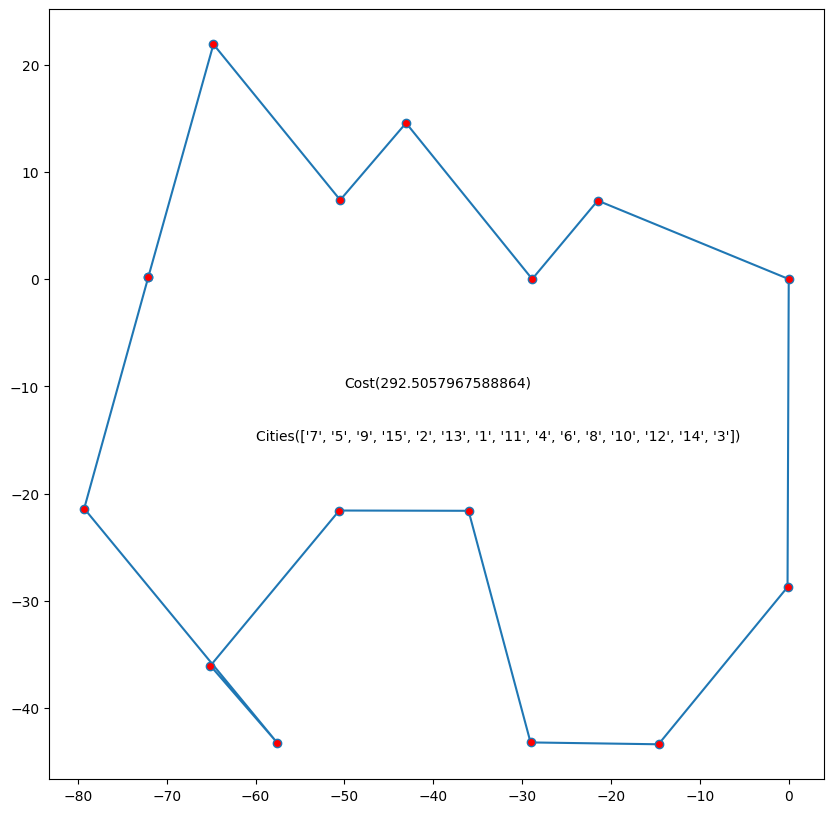

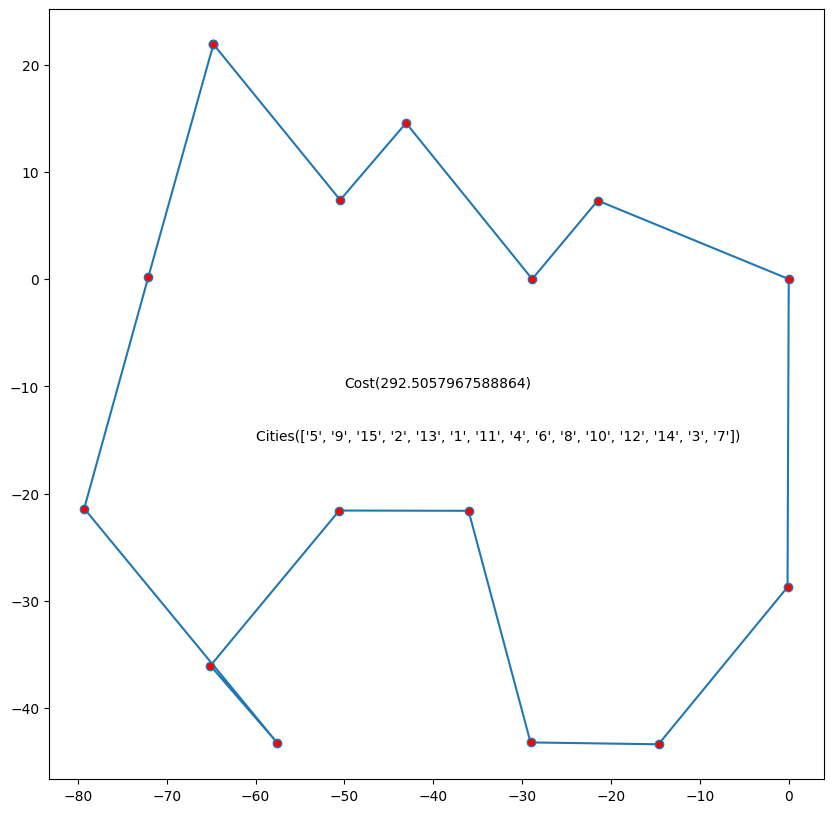

In [134]:
# ploting all pathes generated by best ants of each ant generation
for bestAnt in hist: 
    # print(i)
    antColony.plotPath(bestAnt.visitedCites,bestAnt.cost)  

In [139]:
# generating video of the pathes of the best ant of each ant generation
vid = cv2.VideoWriter('Anthistory16.avi', cv2.VideoWriter_fourcc(*'XVID'), 1, (640, 480))
for bestAnt in hist:
    vid.write(cv2.resize(antColony.imgGen(bestAnt.visitedCites,bestAnt.cost),(640,480)))
vid.release()  